<div align='center'>
    <h2>The Cosmic Pioneers</h2>
    <h5>Tugas Khusus DSA</h5>
</div>

<h3>Dataset yang digunakan</h3>
<h5>Dataset Utama (Opsi Dataset 1)</h5>
<a href='https://data.jakarta.go.id/dataset?q=banjir'>https://data.jakarta.go.id/dataset?q=banjir</a>

<p>Link Dataset Utama<br>
    <a href='https://data.jakarta.go.id/dataset/rekap-banjir-bulan-januari-2016'>Dataset Banjir Jakarta 2014</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-rekapitulasi-kejadian-banjir-bulan-januari-2015'>Dataset Banjir Jakarta 2015</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/rekap-banjir-tahun-2016'>Dataset Banjir Jakarta 2016</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-kejadian-bencana-banjir-tahun-2017-di-provinsi-dki-jakarta'>Dataset Banjir Jakarta 2017</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2018'>Dataset Banjir Jakarta 2018</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2019'>Dataset Banjir Jakarta 2019</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020'>Dataset Banjir Jakarta 2020</a>
</p>

<h5>Dataset Pendukung</h5>
<a href='https://data.jakarta.go.id/dataset?q=cuaca'>https://data.jakarta.go.id/dataset?q=cuaca</a>

<p>Link Dataset Pendukung<br>
    <a href='https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2017'>Dataset Prakiraan Cuaca Jakarta 2017</a>
    <br>
    <a href='https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018'>Dataset Prakiraan Cuaca Jakarta 2018</a>
</p>

<p>Oleh :</p>
<ul>
    <li>Muhammad Rafly Arjasubrata</li>
    <li>Muhammad Abiya Makruf</li>
    <li>Irvan Hartawan</li>
</ul>



<h3 align='center'><b>Import library & load dataset</h3>

<h3>Import library yang diperlukan</h3>

In [6626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Mengubah notasi scientific yang dikeluarkan oleh pandas menjadi 3 angka dibelakang koma
pd.set_option('display.float_format', '{:.3f}'.format)

<h3>Daftar bulan dan tahun yang tersedia dalam dataset banjir & nama kolom yang akan dimodifikasi</h3>

In [6627]:
# List nama bulan yang akan ditinjau
listBulan = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']
# List tahun yang akan ditinjau
listTahun = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Dict nama kolom yang akan diganti
dictNamaColumn = {
    'jumlah_rw' : 'jumlah_terdampak_rw',
    'jumlah_rt' : 'jumlah_terdampak_rt',
    'jumlah_kk' : 'jumlah_terdampak_kk',
    'jumlah_jiwa' : 'jumlah_terdampak_jiwa',
    'jumlah_pengungsi_tertinggi' : 'jumlah_pengungsi'
}
# List nama kolom yang akan dihapus
listColumnDihapus = ['jumlah_nilai_kerugian', 'Unnamed: 18']

<h5>Alasan penghapusan dan penggantian nama column</h5>

In [6628]:
# Inisialisasi Dataframe dan tahun
dfDict = {}
dataTahun = [2014, 2015, 2016, 2017]

# Loop untuk setiap tahun yang akan ditinjau
for tahun in dataTahun :
    # Inisialisasi dataframe dalam dictionary
    dfDict[tahun] = pd.DataFrame()
    # Loop untuk setiap bulan yang ada di list
    for bulan in listBulan :
        try :
            # Load dataset ke dalam pandas dataframe
            dfBulan = pd.read_csv(f'./Data Banjir {tahun}/data-kejadian-bencana-banjir-bulan-{bulan}-{tahun}.csv')
            # Menambahkan kolom bulan dan tahun ke dalam dataframe banjir
            dfBulan['bulan'] = [bulan for i in range(len(dfBulan))]
            dfBulan['tahun'] = [tahun for i in range(len(dfBulan))]

            # Menyatukan dataframe yang sudah di load ke dalam dataframe utama
            dfDict[tahun] = pd.concat([dfDict[tahun], dfBulan], ignore_index=True)

        # Menangkap error jika dataset tertentu tidak ditemukan
        except FileNotFoundError:
            pass

In [6629]:
dfDict[2014].columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw', 'jumlah_rw',
       'jumlah_rt', 'jumlah_kk', 'jumlah_jiwa', 'ketinggian_air',
       'tanggal_kejadian', 'lama_genangan', 'jumlah_meninggal',
       'jumlah_hilang', 'jumlah_luka_berat', 'jumlah_luka_ringan',
       'jumlah_pengungsi', 'jumlah_tempat_pengungsian', 'nilai_kerugian',
       'bulan', 'tahun', 'jumlah_nilai_kerugian', 'Unnamed: 18'],
      dtype='object')

In [6630]:
dfDict[2015].columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw', 'jumlah_rw',
       'jumlah_rt', 'jumlah_kk', 'jumlah_jiwa', 'ketinggian_air',
       'tanggal_kejadian', 'lama_genangan', 'jumlah_meninggal',
       'jumlah_hilang', 'jumlah_luka_berat', 'jumlah_luka_ringan',
       'jumlah_pengungsi', 'jumlah_tempat_pengungsian', 'nilai_kerugian',
       'bulan', 'tahun'],
      dtype='object')

<p>Dapat dilihat bahwa pada dataframe 2014 terdapat column yang tidak valid bernama 'jumlah_nilai_kerugian', dan 'Unnamed: 18' dan nama column ini tidak muncul lagi di dataframe tahun 2015. Dua column ini muncul setelah column 'bulan' dan 'tahun' yang ditambahkan sendiri, yang berarti dua column tersebut hanya muncul di salah satu atau lebih dataset bulanan tetapi tidak semua dataset bulanan pada 2014 mempunyai 2 column tersebut</p>

In [6631]:
dfDict[2016].columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw',
       'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
       'jumlah_terdampak_jiwa', 'ketinggian_air', 'tanggal_kejadian',
       'lama_genangan', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian', 'nilai_kerugian', 'bulan', 'tahun'],
      dtype='object')

<p>Dapat dilihat bahwa terdapat pergantian nama column dari dataset 2014-2015 ke 2016-2020, pergantian nama column ini terjadi pada</p>

<ul>
    <li>jumlah_rw -> jumlah_terdampak_rw</li>
    <li>jumlah_rt -> jumlah_terdampak_rt</li>
    <li>jumlah_kk -> jumlah_terdampak_kk</li>
    <li>jumlah_jiwa -> jumlah_terdampak_jiwa</li>
    <li>jumlah_pengungsi_tertinggi -> jumlah_pengungsi</li>
</ul>

<h3><b>Load Dataset Banjir (dataset utama)</b></h3>

<h3>Load data csv banjir ke dalam pandas data frame</h3>

In [6632]:
# Inisialisasi Dataframe
df = pd.DataFrame()

# Loop untuk setiap tahun yang ada di list
for tahun in listTahun :
    # List untuk menyimpan bulan yang tidak ada datanya
    dataHilang = []

    # Loop untuk setiap bulan yang ada di list
    for bulan in listBulan :
        try :
            # Load dataset ke dalam pandas dataframe
            dfBulan = pd.read_csv(f'./Data Banjir {tahun}/data-kejadian-bencana-banjir-bulan-{bulan}-{tahun}.csv')
            # Menambahkan kolom bulan dan tahun ke dalam dataframe banjir
            dfBulan['bulan'] = [bulan for i in range(len(dfBulan))]
            dfBulan['tahun'] = [tahun for i in range(len(dfBulan))]

            # Mengganti nama column yang sesuai berdasarkan 'dictNamaColumn'
            for namaColumnAwal in dictNamaColumn.keys() :
                try :
                    # Mengganti nama column di dataframe
                    dfBulan.rename(columns={namaColumnAwal : dictNamaColumn[namaColumnAwal]}, inplace=True)
                # Menangap error jika nama column yang akan diganti tidak ada
                except KeyError :
                    pass
            
            # Menghapus column yang tidak valid berdasarkan 'listColumnDihapus'
            for namaColumnHapus in listColumnDihapus :
                try :
                    # Menghapus column yang tidak valid
                    dfBulan.drop(namaColumnHapus, axis=1, inplace=True)
                # Menangkap error jika nama column yang akan dihapus tidak ada
                except KeyError :
                    pass

            # Menyatukan dataframe yang sudah di load ke dalam dataframe utama
            df = pd.concat([df, dfBulan], ignore_index=True)

        # Menangkap error jika dataset tertentu tidak ditemukan
        except FileNotFoundError:
            # Memasukkan nama bulan yang tidak terdapat dalam dataset ke dalam list 'dataHilang'
            dataHilang.append(bulan)

    # Menampilkan data nama bulan yang tidak terdapat di dataset pada tahun tertentu (jika ada)
    if len(dataHilang) > 0 :
        print(f'Data tahun {tahun} bulan {", ".join(dataHilang)} tidak ada')

Data tahun 2014 bulan september, oktober tidak ada
Data tahun 2015 bulan juni, juli, agustus, september, oktober tidak ada
Data tahun 2016 bulan november, desember tidak ada
Data tahun 2018 bulan juni, agustus, september tidak ada
Data tahun 2019 bulan juni, juli, agustus, september, november tidak ada


<h3>Ukuran dataset banjir jakarta sebesar</h3>
<p>2413 baris data dan 20 kolom yang berbeda<p>

In [6633]:
# Mengoutputkan ukuran dataframe
df.shape

(2413, 20)

<h3>Nama kolom di dataset banjir sebagai berikut</h3>

In [6634]:
# Mengoutputkan nama column dalam dataframe
df.columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw',
       'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
       'jumlah_terdampak_jiwa', 'ketinggian_air', 'tanggal_kejadian',
       'lama_genangan', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'jumlah_luka_ringan', 'jumlah_pengungsi',
       'jumlah_tempat_pengungsian', 'nilai_kerugian', 'bulan', 'tahun'],
      dtype='object')

<h3>Tipe data pada setiap kolom</h3>

In [6635]:
# Mengoutputkan tipe data setiap column
df.dtypes.sort_values()

tahun                          int64
jumlah_tempat_pengungsian    float64
jumlah_pengungsi             float64
jumlah_terdampak_rw          float64
jumlah_terdampak_rt          float64
jumlah_luka_ringan           float64
jumlah_luka_berat            float64
jumlah_hilang                float64
jumlah_meninggal             float64
lama_genangan                float64
nilai_kerugian                object
kota_administrasi             object
ketinggian_air                object
jumlah_terdampak_jiwa         object
jumlah_terdampak_kk           object
rw                            object
kelurahan                     object
kecamatan                     object
bulan                         object
tanggal_kejadian              object
dtype: object

<h3><b>Load Dataset Cuaca (dataset Pendukung)</b></h3>

<h3>Daftar bulan dan tahun yang tersedia dalam dataset cuaca</h3>

In [6636]:
# List nama bulan yang akan ditinjau
listBulanCuaca = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']
# List tahun yang akan ditinjau
listTahunCuaca = [2017, 2018]

<h3>Load data csv cuaca ke dalam pandas data frame</h3>

In [6637]:
# Inisialisasi Dataframe utama untuk menampung data cuaca
dfCuaca = pd.DataFrame()

# Loop untuk setiap tahun yang ada di list
for tahun in listTahunCuaca :
    # List untuk menyimpan bulan yang tidak ada datanya
    dataHilang = []

    # Loop untuk setiap bulan yang ada di list
    for bulan in listBulanCuaca :
        try :
            # Load dataset ke dalam pandas dataframe
            dfBulan = pd.read_csv(f'./Data Cuaca {tahun}/data-prakiraan-cuaca-bulan-{bulan}-{tahun}.csv')
            # Menambahkan kolom bulan dan tahun ke dalam dataframe cuaca
            dfBulan['bulan'] = [bulan for i in range(len(dfBulan))]
            dfBulan['tahun'] = [tahun for i in range(len(dfBulan))]

            # Menyatukan dataframe yang sudah di load ke dalam dataframe utama
            dfCuaca = pd.concat([dfCuaca, dfBulan], ignore_index=True)
        
        # Menangkap error jika dataset tertentu tidak ditemukan
        except FileNotFoundError :
            # Memasukkan nama bulan yang tidak terdapat dalam dataset ke dalam list 'dataHilang'
            dataHilang.append(bulan)

    # Menampilkan data nama bulan yang tidak terdapat di dataset pada tahun tertentu (jika ada)
    if len(dataHilang) > 0 :
        print(f'Data tahun {tahun} bulan {", ".join(dataHilang)} tidak ada')

Data tahun 2017 bulan november, desember tidak ada


<h3>Ukuran dataset cuaca jakarta sebesar</h3>
<p>14676 baris data dan 8 kolom yang berbeda<p>

In [6638]:
# Mengoutputkan ukuran dataframe cuaca
dfCuaca.shape

(14676, 8)

<h3>Nama column di dataset cuaca sebagai berikut</h3>

In [6639]:
# Mengoutputkan nama column dalam dataframe cuaca
dfCuaca.columns

Index(['tanggal', 'wilayah', 'waktu', 'cuaca', 'kelembaban_persen',
       'suhu_derajat_celcius', 'bulan', 'tahun'],
      dtype='object')

<h3>Tipe data pada setiap column</h3>

In [6640]:
# Mengoutputkan tipe data setiap column
dfCuaca.dtypes.sort_values()

tahun                    int64
tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
bulan                   object
dtype: object

In [6641]:
dfCuaca.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,bulan,tahun
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31,januari,2017
1,2017-01-03,Jakarta Utara,Pagi,Berawan,65 - 95,22 - 31,januari,2017
2,2017-01-03,Jakarta Selatan,Pagi,Berawan,65 - 95,22 - 31,januari,2017
3,2017-01-03,Jakarta Barat,Pagi,Hujan Ringan,65 - 95,22 - 31,januari,2017
4,2017-01-03,Jakarta Timur,Pagi,Hujan Ringan,65 - 95,22 - 31,januari,2017


<h3 align='center'><b>Data Wrangling</b></h3>

<h3><b>Data Wrangling Dataset Banjir (dataset utama)</b></h3>

<h3>Hapus column yang tidak relevan</h3>

<h5>Hapus Column 'rw'</h5>

In [6642]:
# Melihat column 'rw' dan 'jumlah_terdampak_rw' untuk melihat korelasi antara dua column tersebut
df[df['rw'].notna()][['rw', 'jumlah_terdampak_rw']].head()

,rw,jumlah_terdampak_rw
125,"001, 002, 003, 004, 005, 006, 007, 010, 011, 0...",13.000
126,"001, 002, 003, 004, 005, 006, 007, 008",8.000
127,"001, 002",2.000
128,13,1.000
129,"001, 002, 003, 005, 008, 012",6.000


<p>Dapat dilihat bahwa column 'rw' adalah rw yang terdampak banjir, dan jumlah rw yang terdampak sesuai dengan column 'jumlah_terdampak_rw', maka column 'rw' <b>redundan</b> dan akan didrop</p>

In [6643]:
# Drop column 'rw' dari dataframe
df.drop('rw', axis=1, inplace=True)

<h5>Hapus column 'jumlah_hilang'</h5>

In [6644]:
# Melihat data dengan 'jumlah_hilang' lebih dari 0
df.loc[df['jumlah_hilang'] > 0]

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi,jumlah_tempat_pengungsian,nilai_kerugian,bulan,tahun
1134,Jakarta Selatan,PANCORAN,PANGADEGAN,2.000,6.000,600,2993,10 s/d 300 cm,"tgl. 05, 06, 07, 08, 09",0.000,0.000,1.000,0.000,3200.000,7.000,0.000,0,februari,2018


<p>Karena hanya terdapat 1 data dengan 'jumlah_hilang' yang lebih dari 0, maka column ini kurang berguna</p>

In [6645]:
# Drop column 'jumlah_hilang' dari dataframe
df.drop('jumlah_hilang', axis=1, inplace=True)

<h5>Hapus column 'jumlah_meninggal'</h5>

In [6646]:
# Melihat banyaknya data dengan 'jumlah_meninggal' lebih dari 0
df.loc[df['jumlah_meninggal'] > 0].shape

(3, 18)

<p>Karena hanya terdapat 3 data dengan 'jumlah_meninggal' lebih dari 0 maka column ini kurang berguna</p>

In [6647]:
# Drop column 'jumlah_meninggal' dari dataframe
df.drop('jumlah_meninggal', axis=1, inplace=True)

<h5>Hapus column 'tanggal_kejadian'</h5>

In [6648]:
# Melihat column 'tanggal_kejadian' dan 'lama_genangan' untuk melihat korelasi antara dua column tersebut
df.loc[df['lama_genangan'] > 0][['tanggal_kejadian', 'lama_genangan']].head()

,tanggal_kejadian,lama_genangan
0,"12,13,14,15,18,19, 20, 21, 22, 23, 24, 25, 26,...",18.000
1,"12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23...",20.000
2,"12, 13, 14, 19, 20, 21, 22, 23, 24, 28, 29, 30...",13.000
3,"14, 19, 20, 21, 22, 23, 29, 30, 31 ...",9.000
4,"12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26...",17.000


<p>Karena column 'lama_genangan' ini representasi dari total 'tanggal_kejadian', maka column 'tanggal_kejadian' menjadi redundan</p>

In [6649]:
# Drop column 'tanggal_kejadian' dari dataframe
df.drop('tanggal_kejadian', axis=1, inplace=True)

<h5>Hapus column 'nilai_kerugian'</h5>

In [6650]:
# Mencari nilai value yang berbeda dalam column 'nilai_kerugian'
df['nilai_kerugian'].unique()

array(['0', ' -   ', 0, nan], dtype=object)

<p>Dari seluruh data dalam dataframe, value nilai kerugian hanya terdiri dari '0', '-' atau Null, maka column ini menjadi tidak relevan</p>

In [6651]:
# Drop column 'nilai_kerugian' dari dataframe
df.drop('nilai_kerugian', axis=1, inplace=True)

<h3>Menghapus data yang memiliki value null</h3>

In [6652]:
# Melihat jumlah data yang memiliki value null / NaN pada setiap column
df.isna().sum().sort_values()

bulan                         0
tahun                         0
kota_administrasi            55
jumlah_luka_berat            55
jumlah_luka_ringan           55
jumlah_pengungsi             55
jumlah_terdampak_rw          56
jumlah_terdampak_rt          56
jumlah_terdampak_kk          56
jumlah_terdampak_jiwa        56
ketinggian_air               64
jumlah_tempat_pengungsian    65
lama_genangan                71
kecamatan                    72
kelurahan                    72
dtype: int64

<p>Angka diatas adalah jumlah data yang memiliki nilai Null/NaN pada column yang bersangkutan</p>

In [6653]:
# Drop data yang memiliki value null / NaN
df.dropna(inplace=True)

<h3>Menghapus data yang memiliki value duplikat</h3>

In [6654]:
# Mencari jumlah data yang duplikat dalam dataframe
df.duplicated().sum()

131

<p>Dapat dilihat, terdapat 131 data yang terindikasi duplikat</p>

In [6655]:
# Drop data yang terindikasi duplikat
df.drop_duplicates(inplace=True)

<h3>Membenarkan data invalid</h3>

<h5>Drop data invalid</h5>

In [6656]:
# Load dataset banjir februari 2017
dfFeb2017 = pd.read_csv('./Data Banjir 2017/data-kejadian-bencana-banjir-bulan-februari-2017.csv')
dfFeb2017.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Barat,CENGKARENG,CENGKARENG BARAT,2.000,0.000,0.000,0.000,80 cm,21 - 24\n(4 Hari),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Jakarta Barat,CENGKARENG,CENGKARENG TIMUR,2.000,0.000,0.000,0.000,30 - 40 cm,21 - 22\n(2 Hari),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Jakarta Barat,CENGKARENG,KAPUK,14.000,0.000,586.000,1388.000,80 - 90 cm,21 - 23\n(3 Hari),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,3.000,0.000,0.000,0.000,40 - 100 cm,21 - 22\n(2 Hari),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Jakarta Barat,CENGKARENG,RAWA BUAYA,10.000,0.000,0.000,0.000,100 cm,20 - 24\n(5 Hari),0.000,0.000,0.000,0.000,272.000,0.000,0.000,0.000,0.000


<p>Dalam dataset banjir pada bulan februari 2017, terdapat pergeseran data antara column dan value yang menyebabkan data tidak valid. Ini dapat ditinjau dalam column 'jumlah_terdampat_jiwa' dan 'ketinggian_air'</p>

In [6657]:
# Filter data yang bukan data pada februari 2017
df = df.loc[~((df['tahun'] == 2017) & (df['bulan'] == 'februari'))]

<h5>Menyesuaikan value pada 'kota_administrasi</h5>

In [6658]:
# Melihat value yang berbeda dalam column 'kota_administrasi'
df['kota_administrasi'].unique()

array(['Jakarta Timur', 'Jakarta Selatan', 'Jakarta Pusat',
       'Jakarta Barat', 'Jakarta Utara', 'Jakara Barat',
       'Kepulauan Seribu', 'Jakarta Urata'], dtype=object)

<p>Terlihat terdapat kesalahan penulisan dalam beberapa value dalam column 'kota_administrasi' seperti 'Jakara Barat' dan 'Jakarta Urata'</p>

In [6659]:
# Mengganti value yang terdapat kesalahan penulisan menjadi value yang benar
df['kota_administrasi'] = df['kota_administrasi'].replace('Jakara Barat', 'Jakarta Barat').replace('Jakarta Urata', 'Jakarta Utara')

<h5>Menyesuaikan value dan mengubah tipe data dalam column 'ketinggian_air'</h5>

In [6660]:
# Meninjau column 'ketinggian_air'
df['ketinggian_air']

0           20 - 300
1           30 - 350
2         100 - 150 
3          50 - 150 
4          50 - 400 
            ...     
2407     5 s/d 10 cm
2408    10 s/d 15 cm
2409     5 s/d 20 cm
2410           15 cm
2411            5 cm
Name: ketinggian_air, Length: 2132, dtype: object

<p>Dapat dilihat bahwa column 'ketinggian_air' berjenis object, dimana valuenya adalah range ketinggian banjir. Ini akan diubah menjadi rata-rata ketinggian air dengan rumus <br><i>(max - min)/2</i></p>

In [6661]:
# Inisialisasi list untuk menampung data rata-rata ketinggian
dataKetinggianAir = []

# Looping untuk setiap value dalam column 'ketinggian_air'
for ketinggianAir in df['ketinggian_air'] :
    # Variable untuk menyimpan value default untuk menampilkan data yang tidak sesuai formatnya (jika ada)
    defaultValue = ketinggianAir

    # Memformat string value dari 'ketinggian_air' agar dapat diparsing
    ketinggianAir = ketinggianAir.replace('cm', '').replace('CM', '').replace('s/d', ' ').replace('sm', '').replace('-', ' ')

    # Pengecekan apakah value dari ketinggian air sudah dalam bentuk digit atau belum
    if ketinggianAir.isdigit() :
        # Memasukkan data ketinggian yang terlebih dahulu dicasting ke integer
        dataKetinggianAir.append(int(ketinggianAir))
        continue
    
    # Split string dari value 'ketinggian_air' agar dapat diparsing
    ketinggianAir = ketinggianAir.split()

    try :
        if len(ketinggianAir) > 1 :
            # Mendapatkan nilai min dan max dari list ketinggian air
            minTinggi, maxTinggi = int(ketinggianAir[0]), int(ketinggianAir[-1])
            # Menghitung rerata ketinggian
            rerataTinggi = (maxTinggi - minTinggi) // 2

            # Memasukkan data rerata ketinggian
            dataKetinggianAir.append(rerataTinggi)

        elif len(ketinggianAir) > 0 :
            # Memasukkan data ketinggian yang terlebih dahulu dicasting ke integer
            dataKetinggianAir.append(int(ketinggianAir[0]))

    # Menangkap error jika ada value yang memiliki format yang berbeda
    except (ValueError, IndexError, AttributeError) :
        print(ketinggianAir, defaultValue)

# Mengassign value 'ketinggian_air' dengan rerata yang sudah dihitung
df['ketinggian_air'] = [i if i > 0 else 0 for i in dataKetinggianAir]


<h5>Menyesuaikan value dalam column 'jumlah_terdampak_jiwa'</h5>

In [6662]:
# Mencari value yang tidak sesuai dalam column 'jumlah_terdampak_jiwa'
df[df['jumlah_terdampak_jiwa'].astype(str).str.contains(',')]['jumlah_terdampak_jiwa'].unique()


array(['3,427'], dtype=object)

<p>Terdapat value '3,427' yang tidak valid jika dicasting ke integer atau float</p>

In [6663]:
# Mengganti ',' dengan string kosong ('')
df['jumlah_terdampak_jiwa'] = df['jumlah_terdampak_jiwa'].astype(str)
df['jumlah_terdampak_jiwa'] = df['jumlah_terdampak_jiwa'].str.replace(',', '')

<h5>Menyesuaikan value dalam column 'jumlah_terdampak_kk'</h5>

In [6664]:
# Mencari value yang tidak sesuai dalam column 'jumlah_terdampak_kk'
df[df['jumlah_terdampak_kk'].astype(str).str.contains(',')]['jumlah_terdampak_kk'].unique()

array(['1,508', '2,919'], dtype=object)

<p>Terdapat value '1,508' dan '2,919' yang tidak valid jika dicasting ke integer atau float</p>

In [6665]:
# Mengganti ',' dengan string kosong ('')
df['jumlah_terdampak_kk'] = df['jumlah_terdampak_kk'].astype(str)
df['jumlah_terdampak_kk'] = df['jumlah_terdampak_kk'].str.replace(',', '')

<h5>Menyesuaikan value 'jumlah_luka_ringan' dan 'jumlah_luka_berat'</h5>

In [6666]:
# Menghitung total jumlah korban dengan luka ringan dan luka berat
totalLukaRingan, totalLukaBerat = df['jumlah_luka_ringan'].sum(), df['jumlah_luka_berat'].sum() 
print(f'Jumlah luka ringan : {totalLukaRingan}, jumlah luka berat : {totalLukaBerat}')

Jumlah luka ringan : 112843.0, jumlah luka berat : 0.0


<p>Dapat dilihat bahwa dalam dataset, tidak ada korban luka berat, maka dua column diatas dapat disatukan menjadi column 'jumlah_luka'</p>

In [6667]:
# Menjumlahkan data luka ringan dan luka berat dan dimasukkan ke column baru bernama 'jumlah_luka'
df['jumlah_luka'] = df['jumlah_luka_ringan'] + df['jumlah_luka_berat']

# Drop column 'jumlah_luka_ringan' dan 'jumlah_luka_berat'
df.drop('jumlah_luka_ringan', axis=1, inplace=True)
df.drop('jumlah_luka_berat', axis=1, inplace=True)

<h5>Membenarkan penulisan pada column 'kecamatan'<h5>

In [6668]:
# Menampilkan contoh penulisan yang berbeda dalam satu kecamatan
df[df['kecamatan'].str.contains('jatinegara', case=False)]['kecamatan'].unique()

array(['Jatinegara', 'JATINEGARA', 'KEC. JATINEGARA', 'JATINEGARA '],
      dtype=object)

<p>Dapat dilihat diatas, terdapat beberapa jenis penulisan yang merepresentasikan 1 kecamatan yang sama, maka column 'kecamatan' harus disesuaikan valuenya</p>

In [6669]:
# Dictionary penulisan nama kecamatan
namaKecamatan = {
    'Jatinegara' : ['Jatinegara', 'JATINEGARA', 'KEC. JATINEGARA', 'JATINEGARA '],
    'Kramat Jati' : ['Kramat Jati', 'KRAMAT JATI', 'KEC. KRAMAT JATI', 'KEC.KRAMAT JATI'],
    'Cipayung' : ['Cipayung', 'CIPAYUNG'],
    'Ciracas' : ['Ciracas', 'KEC. CIRACAS', 'CIRACAS'],
    'Pasar Rebo' : ['Pasar Rebo', 'PASAR REBO', 'KEC. PASAR REBO'],
    'Makasar' : ['Makasar', 'MAKASAR', 'KEC. MAKASAR', 'MAKASSAR'],
    'Matraman' : ['Matraman', 'MATRAMAN', 'KEC. MATRAMAN'],
    'Cakung' : ['Cakung', 'KEC. CAKUNG', 'CAKUNG'],
    'Duren Sawit' : ['Duren Sawit', 'DUREN SAWIT'],
    'Pulo Gadung' : ['Pulogadung', 'PULOGADUNG', 'PULO GADUNG', 'Pulogadung'],
    'Pasar Minggu' : ['Pasar Minggu', 'KEC, PASAR MINGGU', 'PASAR MINGGU', 'KEC. PASAR MINGGU'],
    'Cilandak' : ['Cilandak', 'KEC. CILANDAK', 'CILANDAK', 'KEC.CILANDAK'],
    'Pesanggrahan' : ['Pesanggrahan', 'PESANGGRAHAN', 'KEC. PESANGGRAHAN', 'Pesanggarahan'],
    'Tebet' : ['Tebet', 'TEBET', 'KEC. TEBET'],
    'Mampang Prapatan' : ['Mampang Prapatan', 'MAMPANG PRAPATAN', 'KEC. MAMPANG PRAPATAN', 'KEC. MAMPANG', 'MAMPANG'],
    'Kebayoran Lama' : ['Kebayoran Lama', 'KEC. KEBAYORAN LAMA', 'KEC.KEBAYORAN LAMA', 'KEBAYORAN LAMA'],
    'Kebayoran Baru' : ['Kebayoran Baru', 'KEBAYORAN BARU', 'KEC.KEBAYORAN BARU', 'KEC. KEBAYORAN BARU'],
    'Pancoran' : ['Pancoran', 'KEC. PANCORAN', 'PANCORAN'],
    'Jagakarsa' : ['Jagakarsa', 'KEC. JAGAKARSA', 'JAGAKARSA', 'Jagakarta'],
    'Setiabudi' : ['Setiabudi', 'SETIABUDI', 'SETIA BUDI'],
    'Tanah Abang' : ['Tanah Abang', 'TANAH ABANG'],
    'Kemayoran' : ['Kemayoran', 'KEMAYORAN'],
    'Johor Baru' : ['Johar Baru', 'JOHAR BARU'],
    'Cengkareng' : ['Cengkareng', 'CENGKARENG', 'KEC. CENGKARENG', 'KEC. CENGKARENG '],
    'Kembangan' : ['Kembangan', 'KEC. KEMBANGAN', 'KEMBANGAN', 'KEC.KEMBANGAN', 'KEC. KEMBANGAN '],
    'Kebon Jeruk' : ['Kebon Jeruk', 'KEBON JERUK', 'KEC. KEBON JERUK', 'Kedoya Selatan'],
    'Grogol Petamburan' : ['Grogol Petamburan', 'GROGOL PETAMBURAN', 'KEC. GROGOL PETAMBURAN'],
    'Kalideres' : ['Kalideres', 'KALIDERES', 'KEC. KALIDERES', 'Kali Deres', 'KALI DERES', 'KEC. KALI DERES', 'Kali Deres '],
    'Tambora' : ['Tambora', 'KEC. TAMBORA', 'TAMBORA'],
    'Palmerah' : ['Palmerah', 'KEC. PALMERAH', 'PALMERAH'],
    'Tamansari' : ['Tamansari', 'Taman Sari', 'TAMAN SARI'],
    'Penjaringan' : ['Penjaringan', 'PENJARINGAN', 'KEC. PENJARINGAN'],
    'Pademangan' : ['Pademangan', 'PADEMANGAN', 'KEC. PADEMANGAN'],
    'Kelapa Gading' : ['Kelapa Gading', 'KELAPA GADING', 'KEC. KELAPA GADING'],
    'Tanjung Priok' : ['Tanjung Priok', 'TANJUNG PRIOK', 'KEC. TANJUNG PRIOK'],
    'Koja' : ['Koja', 'KOJA', 'KEC. KOJA'],
    'Cilincing' : ['Cilincing', 'CILINCING', 'KEC. CILINCING', 'CILIINCING'],
    'Cempaka Putih' : ['Cempaka Putih', 'CEMPAKA PUTIH'],
    'Gambir' : ['Gambir', 'GAMBIR'],
    'Menteng' : ['Menteng', 'MENTENG'],
    'Sawah Besar' : ['Sawah Besar', 'KEC. SAWAH BESAR', 'SAWAH BESAR'],
    'Kedoya Selatan' : ['Kedoya Selatan'],
    'Kepulauan Seribu Selatan' : ['KEPULAUAN SERIBU SELATAN'],
    'Kepulauan Seribu Utara' : ['KEPULAUAN SERIBU UTARA'],
    'Senen' : ['KEC. SENEN', 'SENEN']
}

# Inisialisasi list untuk menampung data kecamatan baru
listNamaKecamatan = []

# Looping untuk mencari nama kecamatan baru berdasarkan nama kecamatan lama
for kecamatan in df['kecamatan'] :
    for k, v in namaKecamatan.items() :
        if kecamatan in v :
            listNamaKecamatan.append(k)
            break

# Assign nama kecamatan baru ke column 'kecamatan'
df['kecamatan'] = listNamaKecamatan

In [6670]:
df.loc[df['kecamatan'] == 'Kembangan']['kota_administrasi'].unique()

array(['Jakarta Barat', 'Jakarta Selatan', 'Jakarta Utara'], dtype=object)

<p>Dapat dilihat bahwa kecamatan kembangan muncul di tiga kota administrasi yang berbeda, maka column kota_administrasi harus disesuaikan berdasarkan kecamatan yang tepat</p>

In [6671]:
df.reset_index(inplace=True)

mappingKecamatanKota = {
    'Kembangan' : 'Jakarta Barat',
    'Penjaringan' : 'Jakarta Utara',
    'Grogol Petamburan' : 'Jakarta Barat',
    'Kebon Jeruk' : 'Jakarta Barat',
    'Kalideres' : 'Jakarta Barat',
    'Cengkareng' : 'Jakarta Barat'
}

listNamaKota = []

for i in range(len(df)) :
    revisi = False
    for k, v in mappingKecamatanKota.items() :
        if df.loc[i]['kecamatan'] == k :
            listNamaKota.append(v)
            revisi = True
            break
    
    if not revisi :
        listNamaKota.append(df.loc[i]['kota_administrasi'])

df['kota_administrasi'] = listNamaKota

<h5>Membenarkan penulisan pada column 'kelurahan'<h5>

In [6672]:
# Menampilkan contoh penulisan yang berbeda dalam satu kelurahan
df[df['kelurahan'].str.contains('cawang', case=False)]['kelurahan'].unique()

array(['Cawang', 'CAWANG', 'KEL. CAWANG', 'CAWANG ', 'KEL.CAWANG'],
      dtype=object)

<p>Dapat dilihat diatas, terdapat beberapa jenis penulisan yang merepresentasikan 1 kelurahan yang sama, maka column 'kelurahan' harus disesuaikan valuenya</p>

In [6673]:
# Mengganti format penulisan kelurahan menjadi format yang benar
df['kelurahan'] = [i.lower().replace('kel. ', '').replace('kel.', '').replace('kel ', '').title() for i in df['kelurahan']]

In [6674]:
# Dictionary untuk format penulisan yang tidak tercover (edge-case)
namaKelurahan = {
    'Cawang' : ['Cawang', 'Cawang '],
    'Kampung Rambutan' : ['Kampung Rambutan', 'Kp. Rambutan'],
    'Palmeriam' : ['Pal Meriam', 'Palmeriam', 'Palmeriem'],
    'Jatinegara' : ['Jatinegara', 'Jatinegara '],
    'Penggilingan' : ['Penggilingan', 'Pengilingan', ' Penggilingan '],
    'Kebayoran Lama Selatan' : ['Kebayoran Lama Selatan', 'Kebayoran Lama Selatan ', '0'],
    'Pengadegan' : ['Pengadegan', 'Pengadengan', 'Pangadegan', 'Pengedegan'],
    'Bendungan Hilir' : ['Bendungan Hilir', 'Bendugan Hilir'],
    'Kelapa Dua' : ['Kelapa Dua', 'Kelapa Dua '],
    'Wijaya Kesuma' :['Wijaya Kesuma', 'Wijaya Kesuma '],
    'Jatipulo' : ['Jatipulo', 'Jati Pulo'],
    'Jati Padang' : ['Jati Padang', 'Jatipadang'],
    'Pejagalan' : ['Pejagalan', 'Penjagalan'],
    'Pademangan Barat' : ['Pademangan Barat', 'Pademangan Barat '],
    'Tanjung Priok' : ['Tanjung Priok', 'Tanjung Priuk'],
    'Papanggo' : ['Papanggo', 'Papango'],
    'Rawa Badak Selatan' : ['Rawa Badak Selatan', 'Rawabadak Selatan'],
    'Rawa Badak Utara' : ['Rawa Badak Utara', 'Rawabadak Utara'],
    'Sukapura' : ['Sukapura', 'Suka Pura'],
    'Kalibaru' : ['Kalibaru', 'Kali Baru'],
    'Pulau Harapan' : ['Pulau Harapan', 'Pulau Harapan '],
    'Bangka' : ['Bangka', ' Bangka'],
    'Rawajati' : ['Rawajati', 'Rawa Jati'],
    'Sukabumi Selatan' : ['Sukabumi Selatan', 'Sukabumi Selatan '],
    'Wijaya Kesuma' : ['Wijaya Kesuma', 'Wijaya Kesuma '],
    'Kamal Muara' : ['Kamal Muara', 'Kamal Muara '],
    'Kali Deres' : ['Kalideres', 'Kali deres']
}

# List untuk menampung format penulisan yang baru
listNamaKelurahan = []

# Looping untuk mencari dan mengganti format penulisan
for kelurahan in df['kelurahan'] :
    # Variable untuk mengindikasikan apakah nama kelurahan tertentu diganti atau tidak
    revisi = False

    # Pengecekan nama kelurahan dengan data di dictionary
    for k, v in namaKelurahan.items() :
        # Pengecekan apakah kelurahan berada di value tertentu
        if kelurahan in v :
            # Memasukkan format nama kelurahan yang benar ke dalam list
            listNamaKelurahan.append(k)
            # Mengindikasikan terdapat pergantian format nama kelurahan
            revisi = True
            break
    
    # Memasukkan nama asli jika tidak ada pergantian format nama kelurahan
    if not revisi :
        listNamaKelurahan.append(kelurahan)

# Mengganti nama kelurahan dengan data nama yang terdapat di list kelurahan
df['kelurahan'] = listNamaKelurahan


<h3>Mengubah tipe data dalam column</h3>

In [6675]:
# Mengubah tipe data dengan 'jumlah_terdampak_kk' .to_numeric() karena terdapat value ''
df['jumlah_terdampak_kk'] = pd.to_numeric(df['jumlah_terdampak_kk'], errors='coerce')
# Menghilangkan value Null yang disebabkan oleh ''
df.dropna(inplace=True)

# Mengubah tipe data column ke float terlebih dahulu karena terdapat '.0'
namaColumnKeFloat = ['jumlah_terdampak_jiwa']
df[namaColumnKeFloat] = df[namaColumnKeFloat].astype(float)

# Mengubah tipe data column ke integer
namaColumnKeInteger = ['jumlah_terdampak_rw','jumlah_terdampak_rt', 'jumlah_terdampak_jiwa', 'jumlah_terdampak_kk',
                       'lama_genangan', 'jumlah_pengungsi', 'jumlah_tempat_pengungsian', 'jumlah_luka']
df[namaColumnKeInteger] = df[namaColumnKeInteger].astype(int)


<h3>Dataset utama setelah dilakukan data wrangling</h3>

In [6676]:
# Mengoutputkan ukuran dari dataframe
df.shape

(2131, 15)

<p>2131 baris data dan 15 kolom yang berbeda<p>

In [6677]:
# Mengoutputkan tipe data setiap column dari dataframe
df.dtypes

index                         int64
kota_administrasi            object
kecamatan                    object
kelurahan                    object
jumlah_terdampak_rw           int64
jumlah_terdampak_rt           int64
jumlah_terdampak_kk           int64
jumlah_terdampak_jiwa         int64
ketinggian_air                int64
lama_genangan                 int64
jumlah_pengungsi              int64
jumlah_tempat_pengungsian     int64
bulan                        object
tahun                         int64
jumlah_luka                   int64
dtype: object

<h3><b>Membuat dataset banjir 2017 - 2018 untuk perbandingan dengan dataset cuaca</b></h3>

<p>Berikut column dan tipe datanya setelah dilakukan wrangling</p>

In [6678]:
# Membuat dataset banjir dari tahun 2017 - 2018
dfBanjir = df.loc[(df['tahun'] == 2017) | (df['tahun'] == 2018)]

<h3>Ukuran dataset banjir jakarta 2017 - 2018 sebesar</h3>
<p>452baris data dan 20 kolom yang berbeda<p>

In [6679]:
# Mengoutputkan ukuran dataframe banjir 2017 - 2018
dfBanjir.shape

(332, 15)

<h3><b>Data wrangling dataset cuaca (dataset pendukung)</b></h3>

<h3>Menyesuaikan value pada column 'waktu'</h3>

In [6680]:
# Melihat jenis value yang berbeda dalam column 'waktu'
dfCuaca['waktu'].unique()

array(['Pagi', 'Siang', 'Malam', 'Dini Hari', 'pagi', 'siang', 'malam',
       'dini hari'], dtype=object)

<p>Dapat dilihat dari value column waktu dalam dataset cuaca, terdapat makna yang sama dengan penulisan yang berbeda contoh : <i>'Pagi' dan 'pagi'</i></p>

In [6681]:
# Mengganti value dalam column waktu dengan format 'Capitalize Each Word'
dfCuaca['waktu'] = [i.title() for i in dfCuaca['waktu']]

<h3>Menyesuaikan value pada column 'cuaca'</h3>

In [6682]:
# Melihat jenis value berbeda dalam column 'cuaca'
dfCuaca['cuaca'].unique()

array(['Hujan Ringan', 'Berawan', 'Hujan Petir', 'Hujan Sedang',
       'Berawan Tebal', 'Hujan Lokal', 'Cerah Berawan', 'Berawan Tebal ',
       'Berawan tebal', 'Berawan Sedang', 'Udara Kabur', 'Cerah',
       'Berawan ', 'Cerah Berawan ', 'Cerah ', 'Hujan', 'Hujan Ringan ',
       'Berawan Teba', 'Hujan RIngan', ' Berawan', 'Hujan Lokal ',
       'Hujan Loka', 'Hujang Sedang', 'Cerah berawan', 'Berawa',
       'Hujan Ringanl', 'Hujan Sedang ', 'Hujan Petir ', 'Cerah  ',
       'Cerah Berawah', 'Beawan', 'Cerang Berawan', 'Cerah Berawn'],
      dtype=object)

<p>Dapat dilihat dari value column cuaca, terdapat makna yang sama dengan penulisan yang berbeda dan juga terdapat value dengan kesalahan penulisan</p>

In [6683]:
# Menghilangkan spasi yang tidak perlu dan mengganti format ke 'Capitalize Each Word'
dfCuaca['cuaca'] = [i.strip().title() for i in dfCuaca['cuaca']]

# Daftar value cuaca yang memiliki format penulisan berbeda
namaCuaca = {
    'Cerah' : ['Cerah'],
    'Cerah Berawan' : ['Cerah Berawan', 'Cerah Berawah', 'Cerang Berawan', 'Cerah Berawn'],
    'Berawan' : ['Berawan', 'Berawa', 'Beawan', 'Berawan Sedang'],
    'Berawan Tebal' : ['Berawan Tebal', 'Udara Kabur', 'Berawan Teba'],
    'Hujan Lokal' : ['Hujan Lokal'],
    'Hujan Ringan' : ['Hujan Ringan', 'Hujan Ringanl'],
    'Hujan Sedang' : ['Hujan Sedang', 'Hujan', 'Hujan Loka', 'Hujang Sedang'],
    'Hujan Petir' : ['Hujan Petir']
}

# Inisialisasi list untuk menampung data cuaca yang benar
dataCuaca = []

# Loop untuk mapping value cuaca yang benar
for cuaca in dfCuaca['cuaca'] :
    for k, v in namaCuaca.items() :
        if cuaca in v :
            dataCuaca.append(k)

# Mengganti value column cuaca dengan value yang benar
dfCuaca['cuaca'] = dataCuaca

<h3>Mengganti value pada column 'kelembaban persen'</h3>

In [6684]:
# Melihat contoh value yang berbeda dalam colimn 'kelembaban_persen'
dfCuaca['kelembaban_persen'].unique()[:10]

array(['65 - 95', '60 - 95', '60 - 95 ', '70 - 95', '75 - 100 ',
       '65 - 97', '65 - 95 ', '80 - 95 ', '85 - 100 ', '60 - 100 '],
      dtype=object)

<p>Dapat dilihat dari value column 'kelembaban_persen' diatas, bahwa value merupakan range kelembaban. Ini akan diganti dengan rata-rata dari range kelembaban setiap data dengan menggunakan rumus (max-min)/2</p>

In [6685]:
# Menghilangkan spasi yang tidak perlu kemudian mengganti '-' dengan spasi kemudian displit berdasarkan ' '
dataKelembapanAwal = [i.strip().replace('-', ' ').split() for i in dfCuaca['kelembaban_persen']]

# Inisialisasi list untuk menampung nilai rata-rata kelembaban
dataKelembapan = []

# Looping untuk memformat data kelembaban menjadi rata-rata
for kelembaban in dataKelembapanAwal :
    # Jika value kelembaban merupakan range angka
    if len(kelembaban) > 1 :
        # Menghitung rata-rata dari range kelembaban
        rataRata = (int(kelembaban[1]) - int(kelembaban[0])) // 2
        # Memasukkan hasil rata-rata ke dalam list 'dataKelembaban'
        dataKelembapan.append(rataRata)

    # Jika value kelembaban bukan merupakan range kelembaban
    else :
        # Memasukkan value ke dalam list 'dataKelembaban'
        dataKelembapan.append(int(kelembaban[0]))

# Mengganti value column cuaca dengan value yang benar
dfCuaca['kelembaban_persen'] = dataKelembapan


<h3>Mengganti value pada column 'suhu_derajat_celcius'</h3>

In [6686]:
# Melihat contoh value yang berbeda dalam colimn 'suhu_derajat_celcius'
dfCuaca['suhu_derajat_celcius'].unique()[:10]

array(['22 - 31', '21 - 34', '21 - 33', '22 - 32', '23 - 33', '24 - 32',
       '22 - 33 ', '24 - 34 ', '22 - 30', '22 - 32  '], dtype=object)

<p>Dapat dilihat dari value column 'suhu_derajat_celcius' diatas, bahwa value merupakan range suhu. Ini akan diganti dengan rata-rata dari range suhu setiap data dengan menggunakan rumus (max-min)/2</p>

In [6687]:
# Menghilangkan spasi yang tidak perlu kemudian mengganti '-' dengan spasi kemudian displit berdasarkan ' '
dataSuhuAwal = [i.strip().replace('-', ' ').split() for i in dfCuaca['suhu_derajat_celcius']]

# Inisialisasi list untuk menampung nilai rata-rata suhu
dataSuhu = []

# Looping untuk memformat data suhu menjadi rata-rata
for suhu in dataSuhuAwal :
    # Jika value suhu merupakan range angka
    if len(suhu) > 1 :
        # Menghitung rata-rata dari range kelembaban
        rataRata = (int(suhu[0]) + int(suhu[1])) // 2
        # Memasukkan hasil rata-rata ke dalam list 'dataSuhu'
        dataSuhu.append(rataRata)

    # Jika value kelembaban bukan merupakan range suhu
    else :
        # Memasukkan value ke dalam list 'dataSuhu'
        dataSuhu.append(int(suhu[0]))

# Mengganti value column suhu dengan value yang benar
dfCuaca['suhu_derajat_celcius'] = dataSuhu

<h3>Mengkategorikan cuaca menjadi tiga</h3>

In [6688]:
# Melihat jenis value berbeda dalam column 'cuaca'
dfCuaca['cuaca'].unique()

array(['Hujan Ringan', 'Berawan', 'Hujan Petir', 'Hujan Sedang',
       'Berawan Tebal', 'Hujan Lokal', 'Cerah Berawan', 'Cerah'],
      dtype=object)

<p>Dari beberapa kategori cuaca diatas, kategori tersebut dapat dikaslifikasikan kembali menjadi 3 kategori agar mensimplifikasi visualisasi dan eksplorasi data</p>

In [6689]:
# Dictionary kategori cuaca baru dengan key sebagai kategori cuaca baru dan value sebagai list yang kategorinya digantikan
kategoriCuaca = {
    'Cerah' : ['Cerah', 'Cerah Berawan'],
    'Berawan' : ['Berawan', 'Berawan Tebal'],
    'Hujan' : ['Hujan Lokal', 'Hujan Petir', 'Hujan Ringan', 'Hujan Sedang']
}

# Inisialisasi list untuk menampung data cuaca baru
dataKategoriCuaca = []

# Looping untuk mengganti data cuaca dengan data cuaca baru
for cuaca in dfCuaca['cuaca'] :
    for k, v in kategoriCuaca.items() :
        if cuaca in v :
            dataKategoriCuaca.append(k)

# Mengganti column 'cuaca' dengan data cuaca baru
dfCuaca['cuaca'] = dataKategoriCuaca

<h3>Dataset pendukung setelah dilakukan data wrangling</h3>

In [6690]:
# Mengoutputkan ukuran dari dataframe
dfCuaca.shape

(14676, 8)

In [6691]:
# Mengoutputkan tipe data dari setiap column di dataframe
dfCuaca.dtypes

tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen        int64
suhu_derajat_celcius     int64
bulan                   object
tahun                    int64
dtype: object

<h3 align='center'><b>Exploring Data</b></h3>

<h3>Persebaran data 'ketinggian_air'</h3>

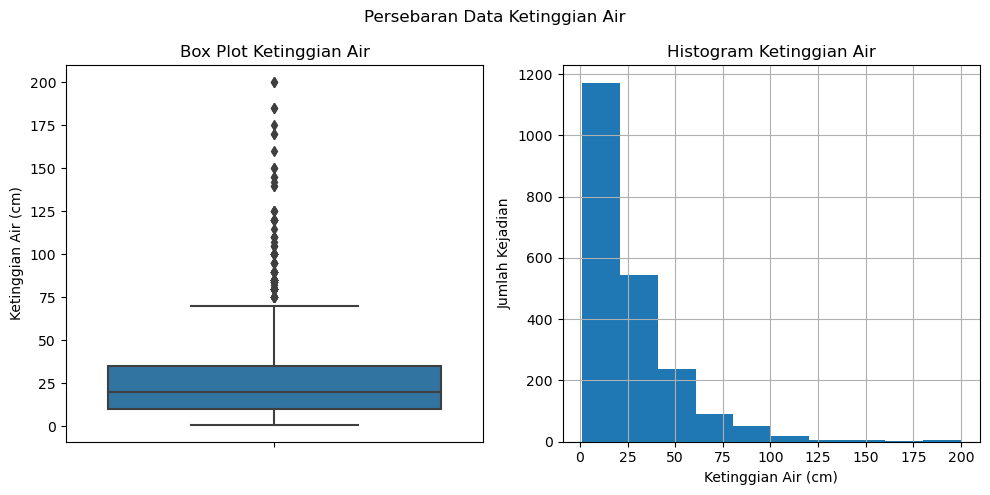

In [6692]:
# Membuat plot dengan ukuran jumlah 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Subplot (0,0)
# Boxplot untuk data 'ketinggian air'
sns.boxplot(y=df.loc[df['ketinggian_air'] > 0]['ketinggian_air'], ax=axes[0])
# Keterangan untuk boxplot
axes[0].set_title('Box Plot Ketinggian Air')
axes[0].set_ylabel('Ketinggian Air (cm)')

    # Subplot(0,1)
# Histogram untuk data 'ketinggian air'
df.loc[df['ketinggian_air'] > 0]['ketinggian_air'].hist(ax=axes[1])
# Keterangan untuk histogram
axes[1].set_title('Histogram Ketinggian Air')
axes[1].set_xlabel('Ketinggian Air (cm)')
axes[1].set_ylabel('Jumlah Kejadian')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data Ketinggian Air')
plt.tight_layout()

# Cetak plot
plt.show()

In [6693]:
# Output summary dari data numerik 'ketinggian_air'
df.loc[df['ketinggian_air'] > 0]['ketinggian_air'].describe()

count   2129.000
mean      27.642
std       25.078
min        1.000
25%       10.000
50%       20.000
75%       35.000
max      200.000
Name: ketinggian_air, dtype: float64

<p>Dapat dilihat dari boxplot dan histogram data 'ketinggian_air' diatas, rata-rata ketinggian banjir adalah 28cm dengan ketinggian air terparah sebesar 200cm. Terlihat bahwa outlier pada data terletak pada value lebih besar dari 100</p>

<h3>Persebaran data 'lama_genangan'</h3>

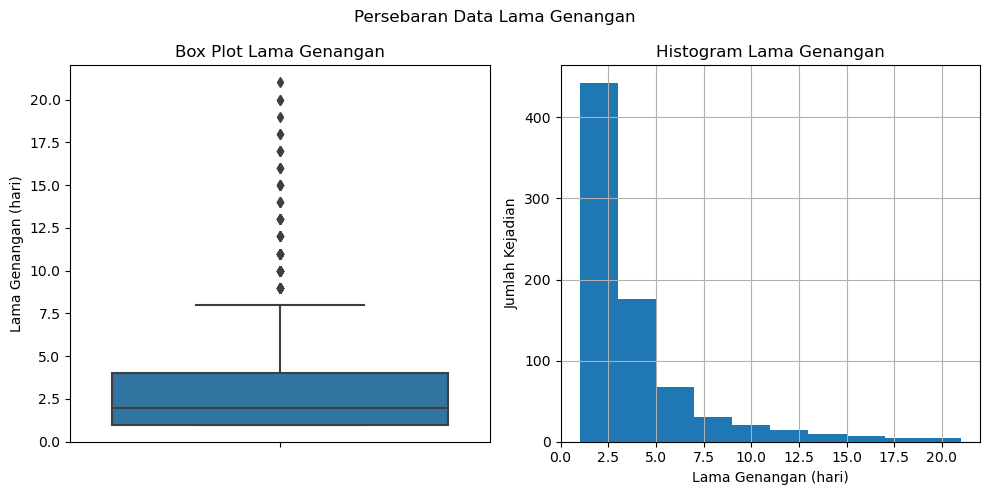

In [6694]:
# Membuat plot dengan ukuran jumlah 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Subplot (0,0)
# Boxplot untuk data 'lama_genangan'
sns.boxplot(y=df.loc[df['lama_genangan'] > 0]['lama_genangan'], ax=axes[0])
# Keterangan pada boxplot
axes[0].set_title('Box Plot Lama Genangan')
axes[0].set_ylabel('Lama Genangan (hari)')

    # Subplot(0,1)
# Histogram untuk data 'lama_genangan'
df.loc[df['lama_genangan'] > 0]['lama_genangan'].hist(ax=axes[1])
# Keterangan pada histogram
axes[1].set_title('Histogram Lama Genangan')
axes[1].set_xlabel('Lama Genangan (hari)')
axes[1].set_ylabel('Jumlah Kejadian')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data Lama Genangan')
plt.tight_layout()

# Cetak plot
plt.show()


In [6695]:
# Output summary dari data numerik 'lama_genangan'
df.loc[df['lama_genangan'] > 0]['lama_genangan'].describe().T

count   778.000
mean      3.321
std       3.272
min       1.000
25%       1.000
50%       2.000
75%       4.000
max      21.000
Name: lama_genangan, dtype: float64

<p>Dapat dilihat dari boxplot dan histogram data 'lama_genangan' diatas, rata-rata lama banjir adalah 3 hari dengan banjir terlama selama 21 hari. Terlihat bahwa outlier pada data terletak pada value lebih besar dari 10</p>

<h3>Data jumlah kejadian banjir per tahun</h3>

Text(0, 0.5, 'Tahun')

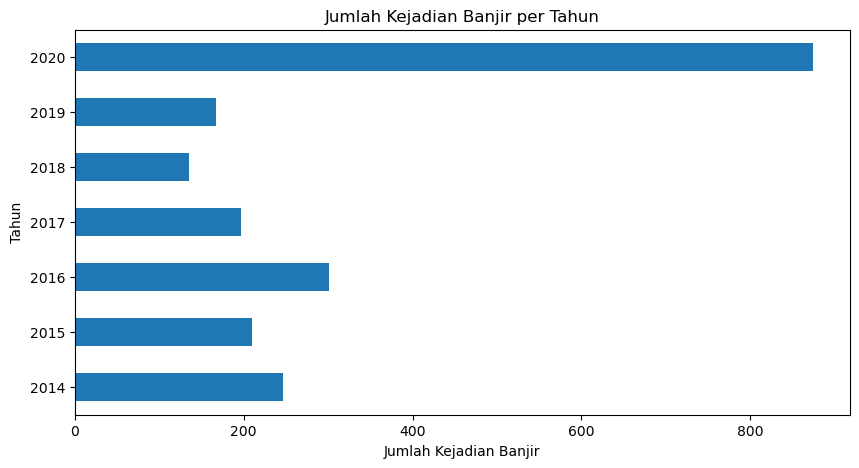

In [6696]:
# Plotting barchart untuk jumlah kejadian banjir per tahun
df['tahun'].value_counts().sort_index().plot(kind='barh', figsize=(10,5))

# Memberikan keterangan pada barchart
plt.title('Jumlah Kejadian Banjir per Tahun')
plt.xlabel('Jumlah Kejadian Banjir')
plt.ylabel('Tahun')

<p>Dapat dilihat dari barchart diatas, bahwa kejadian banjir meningkat secara signifikan pada 2020 dengan jumlah 874 kejadian. Selanjutnya pada tahun 2016, jumlah kejadian banjir pun meningkat dibanding tahun-tahun lainnya (selain tahun 2020)</p>

In [6697]:
df['tahun'].value_counts().sort_index()

2014    247
2015    210
2016    301
2017    197
2018    135
2019    167
2020    874
Name: tahun, dtype: int64

<h3>Persebaran data 'jumlah_terdampak_jiwa'</h3>

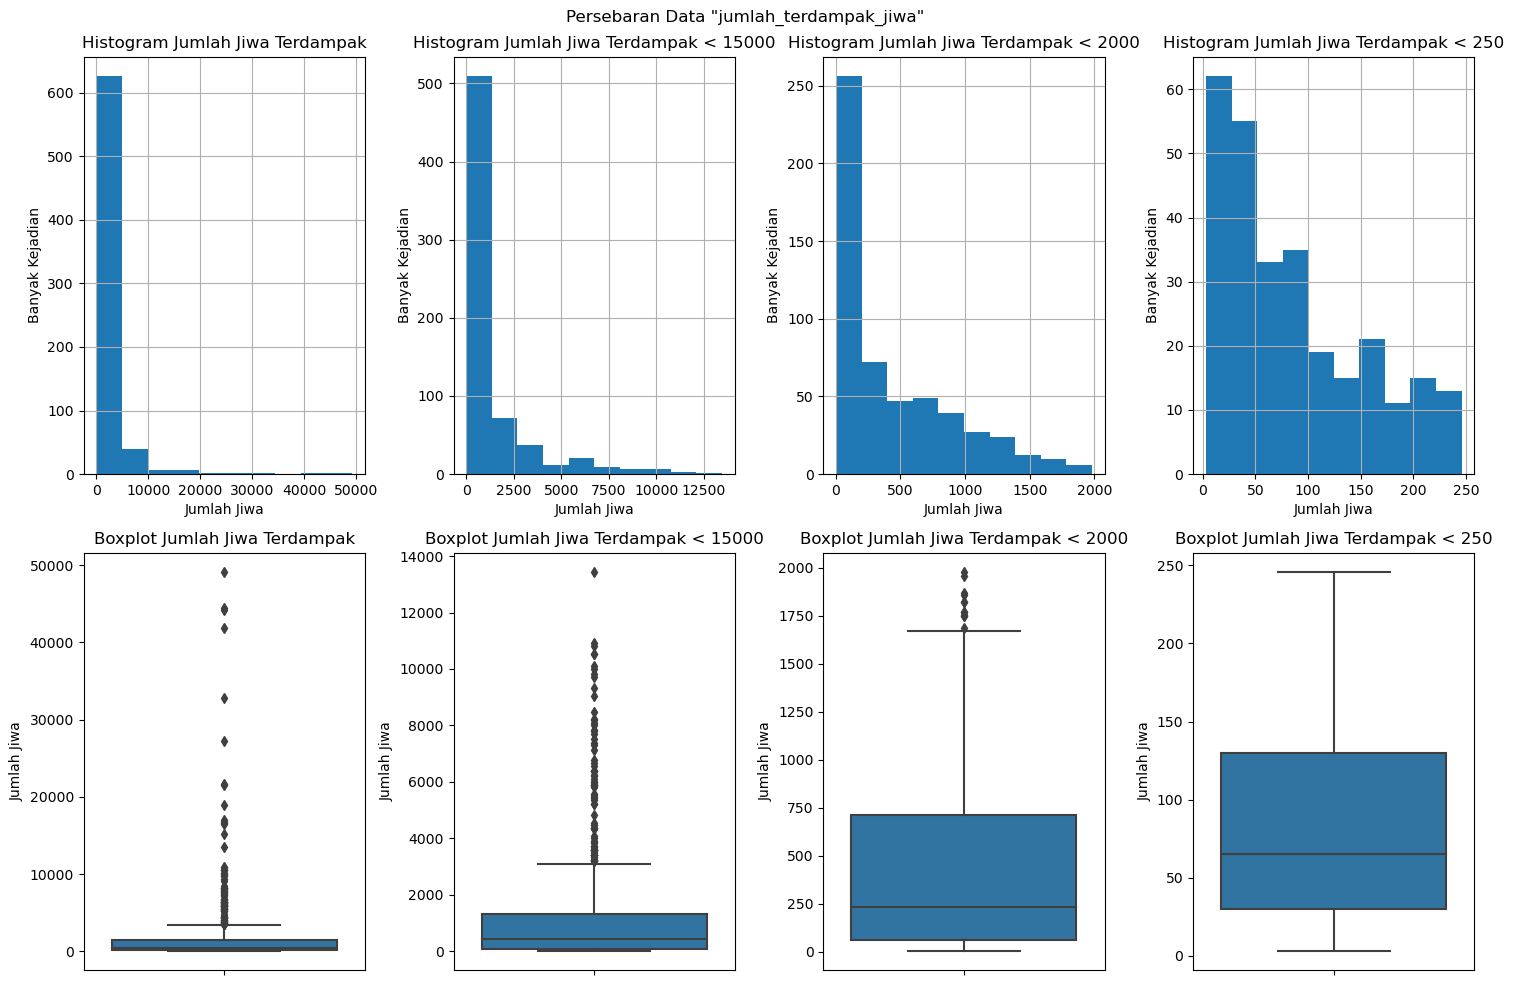

In [6698]:
# Membuat plot dengan ukuran jumlah 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat histogram data 'jumlah_terdampak_jiwa' yang lebih dari 0
df.loc[df['jumlah_terdampak_jiwa'] > 0]['jumlah_terdampak_jiwa'].hist(ax=axes[0, 0])
# Keterangan untuk histogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah Jiwa Terdampak')
axes[0, 0].set_xlabel('Jumlah Jiwa')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat hisgoram data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 15000
df.loc[(df['jumlah_terdampak_jiwa'] < 15000) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'].hist(ax=axes[0, 1])
# Keterangan untuk histogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah Jiwa Terdampak < 15000')
axes[0, 1].set_xlabel('Jumlah Jiwa')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [0, 2]
# Membuat histogram data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 2000
df.loc[(df['jumlah_terdampak_jiwa'] < 2000) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'].hist(ax=axes[0, 2])
# Keterangan untuk histogram [0, 2]
axes[0, 2].set_title('Histogram Jumlah Jiwa Terdampak < 2000')
axes[0, 2].set_xlabel('Jumlah Jiwa')
axes[0, 2].set_ylabel('Banyak Kejadian')

    # Plot [0, 3]
# Membuat histogram data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 250
df.loc[(df['jumlah_terdampak_jiwa'] < 250) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'].hist(ax=axes[0, 3])
# Keterangan untuk histogram [0, 3]
axes[0, 3].set_title('Histogram Jumlah Jiwa Terdampak < 250')
axes[0, 3].set_xlabel('Jumlah Jiwa')
axes[0, 3].set_ylabel('Banyak Kejadian')


# === Boxplot ===
    # Plot [1, 0]
# Membuat boxplot data 'jumlah_terdampak_jiwa' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_terdampak_jiwa'] > 0]['jumlah_terdampak_jiwa'], ax=axes[1, 0])
# Keterangan untuk boxplot [1, 0]
axes[1, 0].set_title('Boxplot Jumlah Jiwa Terdampak')
axes[1, 0].set_ylabel('Jumlah Jiwa')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 10000
sns.boxplot(y=df.loc[(df['jumlah_terdampak_jiwa'] < 15000) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'], ax=axes[1,1])
# Keterangan untuk boxplot [1, 1]
axes[1, 1].set_title('Boxplot Jumlah Jiwa Terdampak < 15000')
axes[1, 1].set_ylabel('Jumlah Jiwa')

    # Plot [1, 2]
# Membuat boxplot data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 2000
sns.boxplot(y=df.loc[(df['jumlah_terdampak_jiwa'] < 2000) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'], ax=axes[1,2])
# Keterangan untuk boxplot [1, 2]
axes[1, 2].set_title('Boxplot Jumlah Jiwa Terdampak < 2000')
axes[1, 2].set_ylabel('Jumlah Jiwa')

    # Plot [1, 3]
# Membuat boxplot data 'jumlah_terdampak_jiwa' yang lebih dari 0 dan kurang dari 250
sns.boxplot(y=df.loc[(df['jumlah_terdampak_jiwa'] < 250) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'], ax=axes[1,3])
# Keterangan untuk boxplot [1, 3]
axes[1, 3].set_title('Boxplot Jumlah Jiwa Terdampak < 250')
axes[1, 3].set_ylabel('Jumlah Jiwa')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "jumlah_terdampak_jiwa"')
plt.tight_layout()

# Cetak plot
plt.show() 

In [6699]:
# Output summary dari data numerik 'jumlah_terdampak_jiwa' untuk jumlah jiwa kurang dari 2000
df.loc[(df['jumlah_terdampak_jiwa'] < 2000) & (df['jumlah_terdampak_jiwa'] > 0)]['jumlah_terdampak_jiwa'].describe()

count    542.000
mean     435.958
std      465.793
min        3.000
25%       61.250
50%      230.500
75%      710.000
max     1980.000
Name: jumlah_terdampak_jiwa, dtype: float64

<p>Dapat dilihat dari boxplot dan histogram data 'jumlah_terdampak_jiwa' diatas, mayoritas data terletak antara value 1 - 2000 dengan rata-rata jiwa terdampak sebanyak 541 jiwa. Terlihat pada data keseluruhan bahwa outlier pada data terletak pada value lebih besar dari 12000</p>

<h3>Persebaran data 'jumlah_terdampak_kk'</h3>

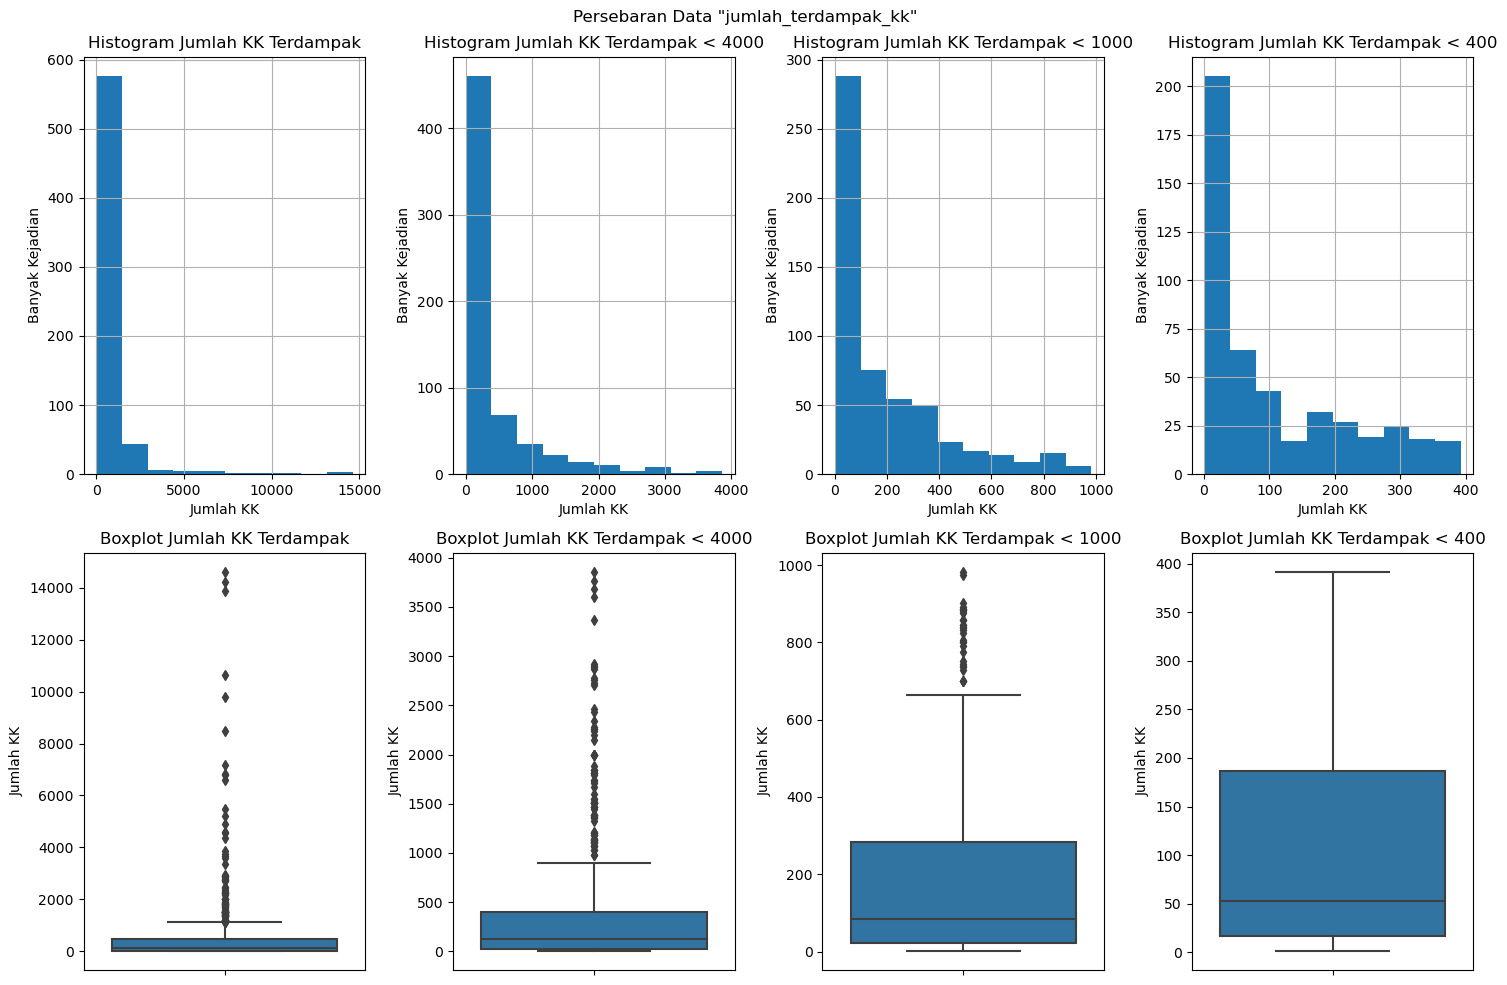

In [6700]:
# Membuat plot dengan ukuran jumlah 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat hisogram data 'jumlah_terdampak_kk' yang lebih dari 0
df.loc[df['jumlah_terdampak_kk'] > 0]['jumlah_terdampak_kk'].hist(ax=axes[0, 0])
# Keterangan untuk hisogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah KK Terdampak')
axes[0, 0].set_xlabel('Jumlah KK')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat hisogram data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 4000
df.loc[(df['jumlah_terdampak_kk'] < 4000) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'].hist(ax=axes[0, 1])
# Keterangan untuk hisogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah KK Terdampak < 4000')
axes[0, 1].set_xlabel('Jumlah KK')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [0, 2]
# Membuat hisogram data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 1000
df.loc[(df['jumlah_terdampak_kk'] < 1000) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'].hist(ax=axes[0, 2])
# Keterangan untuk hisogram [0, 2]
axes[0, 2].set_title('Histogram Jumlah KK Terdampak < 1000')
axes[0, 2].set_xlabel('Jumlah KK')
axes[0, 2].set_ylabel('Banyak Kejadian')

    # Plot [0, 3]
# Membuat hisogram data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 400
df.loc[(df['jumlah_terdampak_kk'] < 400) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'].hist(ax=axes[0, 3])
# Keterangan untuk hisogram [0, 3]
axes[0, 3].set_title('Histogram Jumlah KK Terdampak < 400')
axes[0, 3].set_xlabel('Jumlah KK')
axes[0, 3].set_ylabel('Banyak Kejadian')

# === Boxplot ===
    # Plot [1, 0]
# Membuat boxplot data 'jumlah_terdampak_kk' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_terdampak_kk'] > 0]['jumlah_terdampak_kk'], ax=axes[1, 0])
# Keterangan untuk boxplot [1, 0]
axes[1, 0].set_title('Boxplot Jumlah KK Terdampak')
axes[1, 0].set_ylabel('Jumlah KK')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 4000
sns.boxplot(y=df.loc[(df['jumlah_terdampak_kk'] < 4000) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'], ax=axes[1,1])
# Keterangan untuk boxplot [1, 1]
axes[1, 1].set_title('Boxplot Jumlah KK Terdampak < 4000')
axes[1, 1].set_ylabel('Jumlah KK')

    # Plot [1, 2]
# Membuat boxplot data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 1000
sns.boxplot(y=df.loc[(df['jumlah_terdampak_kk'] < 1000) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'], ax=axes[1,2])
# Keterangan untuk boxplot [1, 2]
axes[1, 2].set_title('Boxplot Jumlah KK Terdampak < 1000')
axes[1, 2].set_ylabel('Jumlah KK')
    
    # Plot [1, 3]
# Membuat boxplot data 'jumlah_terdampak_kk' yang lebih dari 0 dan kurang dari 400
sns.boxplot(y=df.loc[(df['jumlah_terdampak_kk'] < 400) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'], ax=axes[1,3])
# Keterangan untuk boxplot [1, 3]
axes[1, 3].set_title('Boxplot Jumlah KK Terdampak < 400')
axes[1, 3].set_ylabel('Jumlah KK')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "jumlah_terdampak_kk"')
plt.tight_layout()

# Cetak plot
plt.show()

In [6701]:
# Output summary dari data numerik 'jumlah_terdampak_kk' untuk jumlah jiwa kurang dari 1000
df.loc[(df['jumlah_terdampak_kk'] < 1000) & (df['jumlah_terdampak_kk'] > 0)]['jumlah_terdampak_kk'].describe()

count   550.000
mean    186.500
std     224.245
min       1.000
25%      21.000
50%      85.500
75%     284.500
max     983.000
Name: jumlah_terdampak_kk, dtype: float64

<p>Berdasarkan hasil dari boxplot dan histogram 'jumlah_terdampak_kk' diatas, mayoritas data terletak pada 50 - 1000 kk yang terdampak dalam sebuah kejadian banjir dengan rata rata sebanyak 259 kk terdampak. Pada data diatas juga terlihat nilai outlier berada pada value yang lebih besar dari 4000</p>

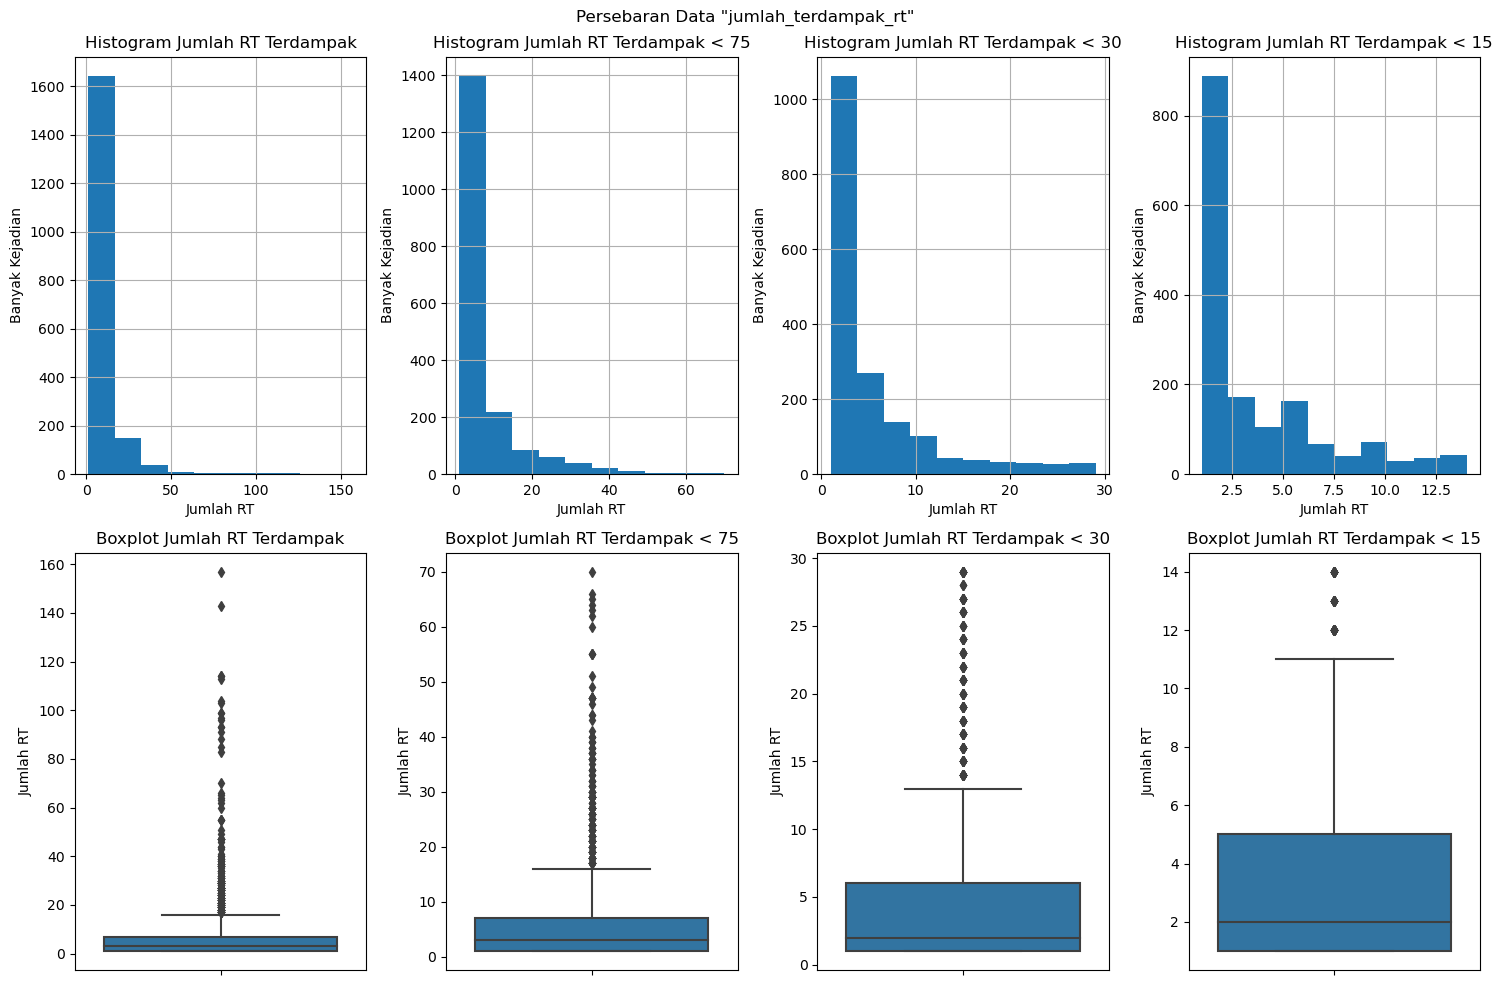

In [6702]:
# Membuat plot dengan ukuran jumlah 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat histogram data 'jumlah_terdampak_rt' yang lebih dari 0
df.loc[df['jumlah_terdampak_rt'] > 0]['jumlah_terdampak_rt'].hist(ax=axes[0, 0])
# Keterangan untuk histogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah RT Terdampak')
axes[0, 0].set_xlabel('Jumlah RT')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat histogram data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 75
df.loc[(df['jumlah_terdampak_rt'] < 75) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'].hist(ax=axes[0, 1])
# Keterangan untuk histogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah RT Terdampak < 75')
axes[0, 1].set_xlabel('Jumlah RT')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [0, 2]
# Membuat histogram data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 30
df.loc[(df['jumlah_terdampak_rt'] < 30) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'].hist(ax=axes[0, 2])
# Keterangan untuk histogram [0, 2]
axes[0, 2].set_title('Histogram Jumlah RT Terdampak < 30')
axes[0, 2].set_xlabel('Jumlah RT')
axes[0, 2].set_ylabel('Banyak Kejadian')

    # Plot [0, 3]
# Membuat histogram data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 15
df.loc[(df['jumlah_terdampak_rt'] < 15) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'].hist(ax=axes[0, 3])
# Keterangan untuk histogram [0, 3]
axes[0, 3].set_title('Histogram Jumlah RT Terdampak < 15')
axes[0, 3].set_xlabel('Jumlah RT')
axes[0, 3].set_ylabel('Banyak Kejadian')

# === Boxplot ===
    # Plot [1, 0]
# Membuat boxplot data 'jumlah_terdampak_rt' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_terdampak_rt'] > 0]['jumlah_terdampak_rt'], ax=axes[1, 0])
# Keterangan untuk histogram [1, 0]
axes[1, 0].set_title('Boxplot Jumlah RT Terdampak')
axes[1, 0].set_ylabel('Jumlah RT')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 75
sns.boxplot(y=df.loc[(df['jumlah_terdampak_rt'] < 75) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'], ax=axes[1,1])
# Keterangan untuk histogram [1, 1]
axes[1, 1].set_title('Boxplot Jumlah RT Terdampak < 75')
axes[1, 1].set_ylabel('Jumlah RT')

    # Plot [1, 2]
# Membuat boxplot data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 30
sns.boxplot(y=df.loc[(df['jumlah_terdampak_rt'] < 30) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'], ax=axes[1,2])
# Keterangan untuk histogram [1, 2]
axes[1, 2].set_title('Boxplot Jumlah RT Terdampak < 30')
axes[1, 2].set_ylabel('Jumlah RT')

    # Plot [1, 3]
# Membuat boxplot data 'jumlah_terdampak_rt' yang lebih dari 0 dan kurang dari 15
sns.boxplot(y=df.loc[(df['jumlah_terdampak_rt'] < 15) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'], ax=axes[1,3])
# Keterangan untuk histogram [1, 3]
axes[1, 3].set_title('Boxplot Jumlah RT Terdampak < 15')
axes[1, 3].set_ylabel('Jumlah RT')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "jumlah_terdampak_rt"')
plt.tight_layout()

# Cetak Plot
plt.show()

In [6703]:
# Output summary dari data numerik 'jumlah_terdampak_rt' untuk jumlah jiwa kurang dari 75
df.loc[(df['jumlah_terdampak_rt'] < 75) & (df['jumlah_terdampak_rt'] > 0)]['jumlah_terdampak_rt'].describe()

count   1838.000
mean       6.427
std        9.264
min        1.000
25%        1.000
50%        3.000
75%        7.000
max       70.000
Name: jumlah_terdampak_rt, dtype: float64

<p>Berdasarkan hasil dari boxplot dan histogram 'jumlah_terdampak_rt' diatas, mayoritas data terletak pada 3 - 20 rt yang terdampak dalam sebuah kejadian banjir dengan rata rata sebanyak 6 rt yang terdampak. Pada data diatas juga terlihat nilai outlier berada pada value yang lebih besar dari 75</p>

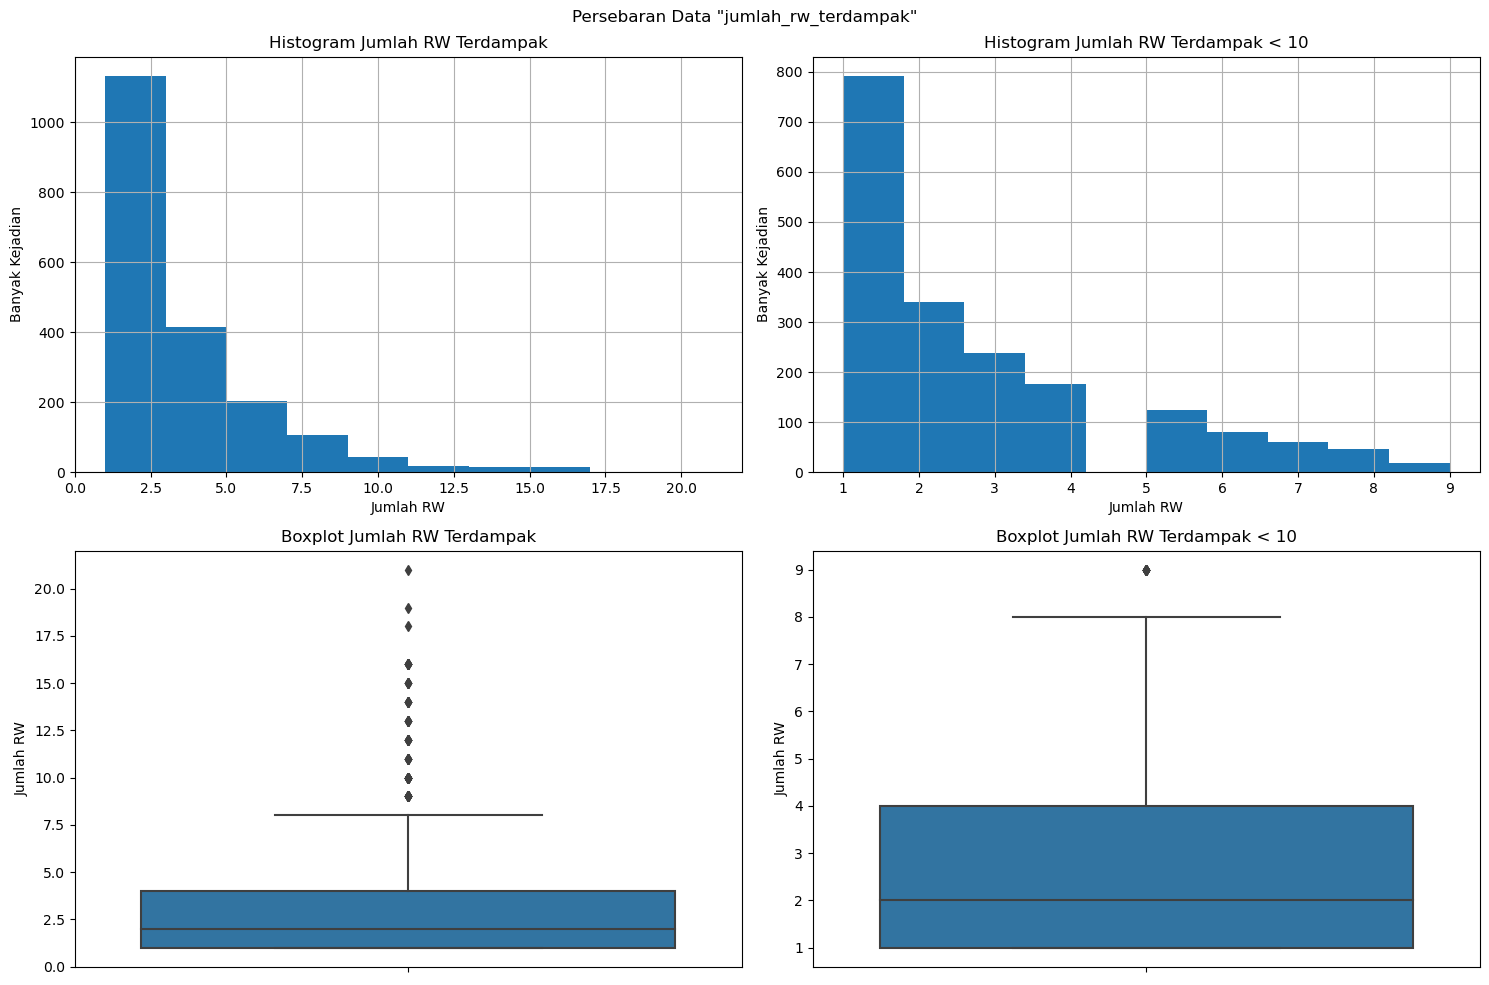

In [6704]:
# Membuat plot dengan ukuran jumlah 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat histogram data 'jumlah_terdampak_rw' yang lebih besar dari 0
df.loc[df['jumlah_terdampak_rw'] > 0]['jumlah_terdampak_rw'].hist(ax=axes[0, 0])
# Keterangan untuk histogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah RW Terdampak')
axes[0, 0].set_xlabel('Jumlah RW')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat histogram data 'jumlah_terdampak_rw' yang lebih besar dari 0 dan lebih kecil dari 10
df.loc[(df['jumlah_terdampak_rw'] < 10) & (df['jumlah_terdampak_rw'] > 0)]['jumlah_terdampak_rw'].hist(ax=axes[0, 1])
# Keterangan untuk histogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah RW Terdampak < 10')
axes[0, 1].set_xlabel('Jumlah RW')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [1, 0]
# Membuat boxplot data 'jumlah_terdampak_rw' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_terdampak_rw'] > 0]['jumlah_terdampak_rw'], ax=axes[1, 0])
# Keterangan untuk Boxplot [1, 0]
axes[1, 0].set_title('Boxplot Jumlah RW Terdampak')
axes[1, 0].set_ylabel('Jumlah RW')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_terdampak_rw' yang lebih dari 0 dan kurang dari 10
sns.boxplot(y=df.loc[(df['jumlah_terdampak_rw'] < 10) & (df['jumlah_terdampak_rw'] > 0)]['jumlah_terdampak_rw'], ax=axes[1,1])
# Keterangan untuk Boxplot [1, 1]
axes[1, 1].set_title('Boxplot Jumlah RW Terdampak < 10')
axes[1, 1].set_ylabel('Jumlah RW')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "jumlah_rw_terdampak"')
plt.tight_layout()

# Cetak plot
plt.show()

In [6705]:
# Output summary dari data numerik 'jumlah_terdampak_rt'
df.loc[df['jumlah_terdampak_rw'] > 0]['jumlah_terdampak_rw'].describe()

count   1951.000
mean       3.022
std        2.777
min        1.000
25%        1.000
50%        2.000
75%        4.000
max       21.000
Name: jumlah_terdampak_rw, dtype: float64

<p>Dari boxplot dan histogram 'jumlah_terdampak_rw' diatas, data jumlah rw yang terdampak terletak pada 2 - 8 rw. Dengan rata rata 3 rw terdampak dalam suatu kejadian banjir. Nilai outlier pun terletak pada value lebih dari 15</p>

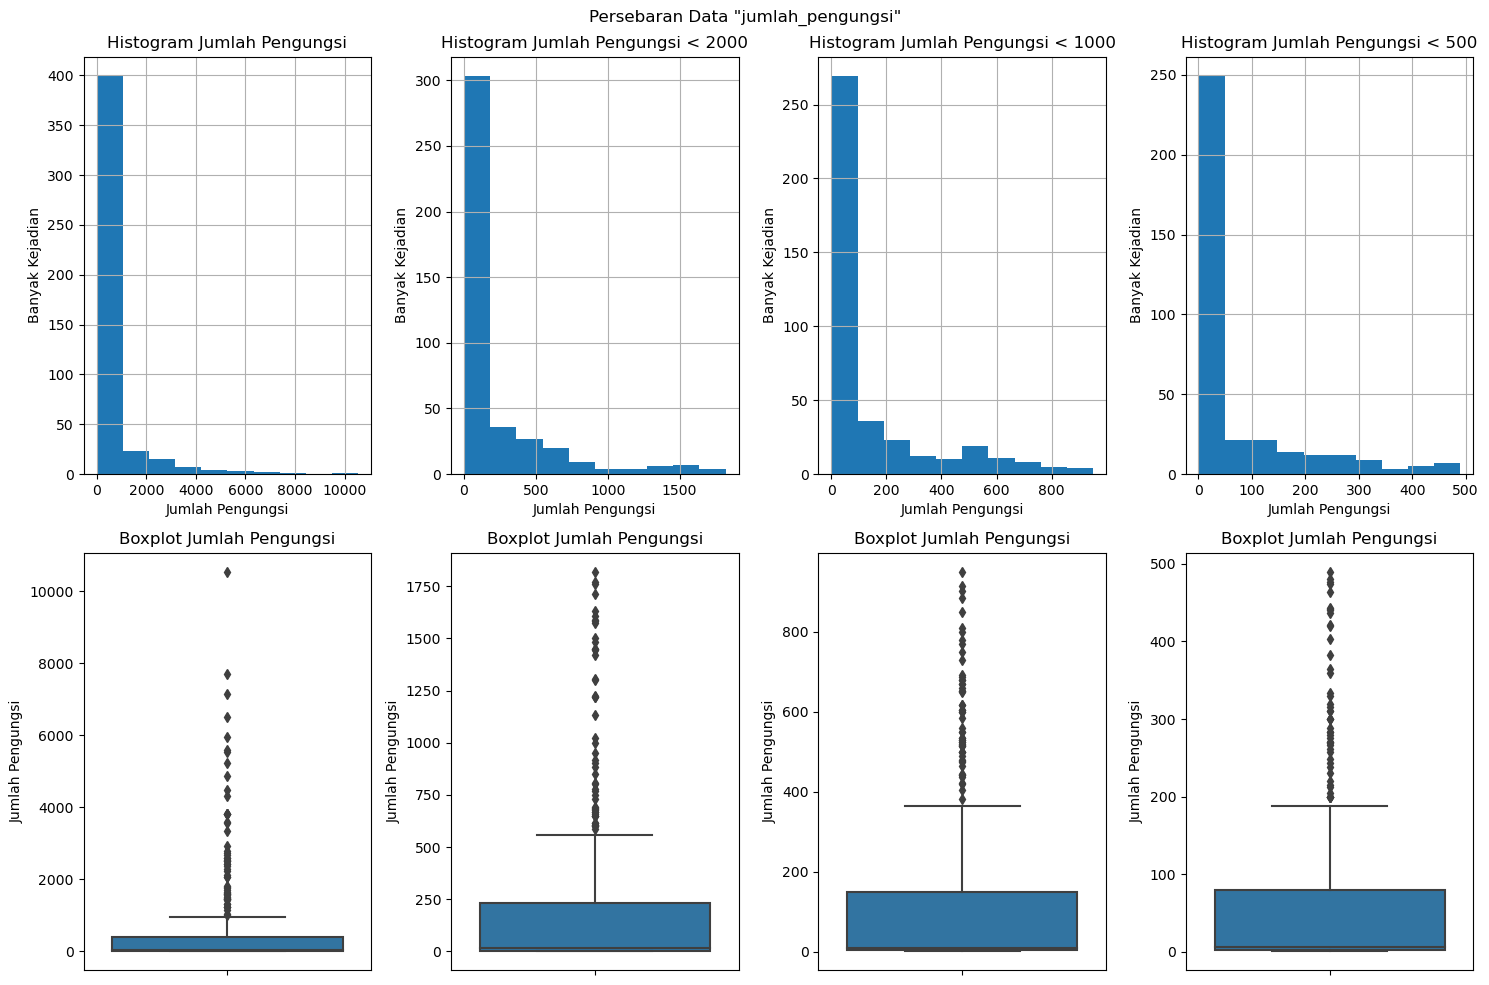

In [6706]:
# Membuat plot dengan ukuran jumlah 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat histogram data 'jumlah_pengungsi' yang lebih dari 0
df.loc[df['jumlah_pengungsi'] > 0]['jumlah_pengungsi'].hist(ax=axes[0, 0])
# Keterangan untuk histogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah Pengungsi')
axes[0, 0].set_xlabel('Jumlah Pengungsi')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat histogram data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 2000
df.loc[(df['jumlah_pengungsi'] < 2000) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'].hist(ax=axes[0, 1])
# Keterangan untuk histogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah Pengungsi < 2000')
axes[0, 1].set_xlabel('Jumlah Pengungsi')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [0, 2]
# Membuat histogram data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 1000
df.loc[(df['jumlah_pengungsi'] < 1000) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'].hist(ax=axes[0, 2])
# Keterangan untuk histogram [0, 2]
axes[0, 2].set_title('Histogram Jumlah Pengungsi < 1000')
axes[0, 2].set_xlabel('Jumlah Pengungsi')
axes[0, 2].set_ylabel('Banyak Kejadian')

    # Plot [0, 3]
# Membuat histogram data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 500
df.loc[(df['jumlah_pengungsi'] < 500) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'].hist(ax=axes[0, 3])
# Keterangan untuk histogram [0, 3]
axes[0, 3].set_title('Histogram Jumlah Pengungsi < 500')
axes[0, 3].set_xlabel('Jumlah Pengungsi')
axes[0, 3].set_ylabel('Banyak Kejadian')

# === Boxplot ===
    # Plot [1, 0]
# Membuat boxplot data 'jumlah_pengungsi' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_pengungsi'] > 0]['jumlah_pengungsi'], ax=axes[1, 0])
# Keterangan untuk boxplot [1, 0]
axes[1, 0].set_title('Boxplot Jumlah Pengungsi')
axes[1, 0].set_ylabel('Jumlah Pengungsi')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 2000
sns.boxplot(y=df.loc[(df['jumlah_pengungsi'] < 2000) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'], ax=axes[1,1])
# Keterangan untuk boxplot [1, 1]
axes[1, 1].set_title('Boxplot Jumlah Pengungsi')
axes[1, 1].set_ylabel('Jumlah Pengungsi')

    # Plot [1, 2]
# Membuat boxplot data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 1000
sns.boxplot(y=df.loc[(df['jumlah_pengungsi'] < 1000) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'], ax=axes[1,2])
# Keterangan untuk boxplot [1, 2]
axes[1, 2].set_title('Boxplot Jumlah Pengungsi')
axes[1, 2].set_ylabel('Jumlah Pengungsi')


    # Plot [1, 3]
# Membuat boxplot data 'jumlah_pengungsi' yang lebih dari 0 dan kurang dari 500
sns.boxplot(y=df.loc[(df['jumlah_pengungsi'] < 500) & (df['jumlah_pengungsi'] > 0)]['jumlah_pengungsi'], ax=axes[1,3])
# Keterangan untuk boxplot [1, 3]
axes[1, 3].set_title('Boxplot Jumlah Pengungsi')
axes[1, 3].set_ylabel('Jumlah Pengungsi')


# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "jumlah_pengungsi"')
plt.tight_layout()

# Cetak plot
plt.show()

In [6707]:
# Output summary dari data numerik 'jumlah_pengungsi'
df.loc[(df['jumlah_pengungsi'] > 0) & (df['jumlah_pengungsi'] < 1500)]['jumlah_pengungsi'].describe()

count    410.000
mean     166.590
std      293.869
min        1.000
25%        3.000
50%       10.000
75%      200.000
max     1483.000
Name: jumlah_pengungsi, dtype: float64

<p>Dapat dilihat dari boxplot dan histogram data 'jumlah_pengungsi', bahwa range data berada pada 0 - 1500 pengungsi. Dengan rata rata sebanyak 167 pengungsi pada setiap kejadian banjir. Data outlier memiliki value diatas 2000</p>

<p>

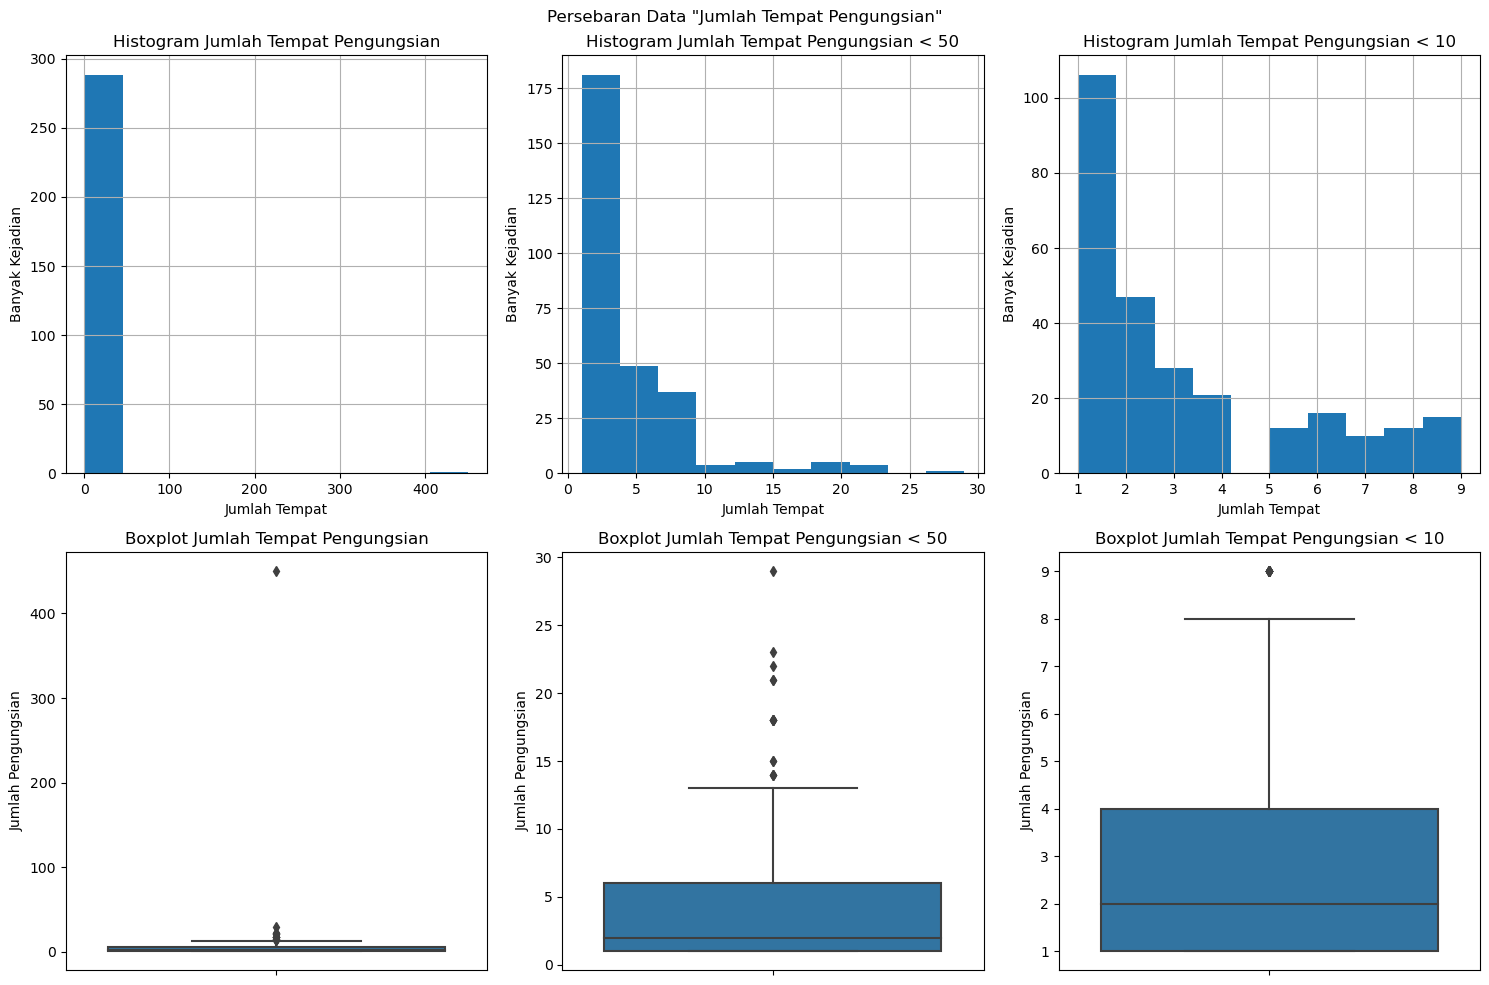

In [6708]:
# Membuat plot dengan ukuran jumlah 2x3 subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# === Histogram ===
    # Plot [0, 0]
# Membuat histogram data 'jumlah_tempat_pengungsian' yang lebih dari 0
df.loc[df['jumlah_tempat_pengungsian'] > 0]['jumlah_tempat_pengungsian'].hist(ax=axes[0, 0])
# Keterangan untuk histogram [0, 0]
axes[0, 0].set_title('Histogram Jumlah Tempat Pengungsian')
axes[0, 0].set_xlabel('Jumlah Tempat')
axes[0, 0].set_ylabel('Banyak Kejadian')

    # Plot [0, 1]
# Membuat histogram data 'jumlah_tempat_pengungsian' yang lebih dari 0 dan kurang dari 50
df.loc[(df['jumlah_tempat_pengungsian'] < 50) & (df['jumlah_tempat_pengungsian'] > 0)]['jumlah_tempat_pengungsian'].hist(ax=axes[0, 1])
# Keterangan untuk histogram [0, 1]
axes[0, 1].set_title('Histogram Jumlah Tempat Pengungsian < 50')
axes[0, 1].set_xlabel('Jumlah Tempat')
axes[0, 1].set_ylabel('Banyak Kejadian')

    # Plot [0, 2]
# Membuat histogram data 'jumlah_tempat_pengungsian' yang lebih dari 0 dan kurang dari 10
df.loc[(df['jumlah_tempat_pengungsian'] < 10) & (df['jumlah_tempat_pengungsian'] > 0)]['jumlah_tempat_pengungsian'].hist(ax=axes[0, 2])
# Keterangan untuk histogram [0, 2]
axes[0, 2].set_title('Histogram Jumlah Tempat Pengungsian < 10')
axes[0, 2].set_xlabel('Jumlah Tempat')
axes[0, 2].set_ylabel('Banyak Kejadian')

# === Boxplot ===
    # Plot [1, 0]
# Membuat boxplot data 'jumlah_tempat_pengungsian' yang lebih dari 0
sns.boxplot(y=df.loc[df['jumlah_tempat_pengungsian'] > 0]['jumlah_tempat_pengungsian'], ax=axes[1, 0])
# Keterangan untuk boxplot [1, 0]
axes[1, 0].set_title('Boxplot Jumlah Tempat Pengungsian')
axes[1, 0].set_ylabel('Jumlah Pengungsian')

    # Plot [1, 1]
# Membuat boxplot data 'jumlah_tempat_pengungsian' yang lebih dari 0 dan kurang dari 50
sns.boxplot(y=df.loc[(df['jumlah_tempat_pengungsian'] < 50) & (df['jumlah_tempat_pengungsian'] > 0)]['jumlah_tempat_pengungsian'], ax=axes[1,1])
# Keterangan untuk boxplot [1, 1]
axes[1, 1].set_title('Boxplot Jumlah Tempat Pengungsian < 50')
axes[1, 1].set_ylabel('Jumlah Pengungsian')

    # Plot [1, 2]
# Membuat boxplot data 'jumlah_tempat_pengungsian' yang lebih dari 0 dan kurang dari 10
sns.boxplot(y=df.loc[(df['jumlah_tempat_pengungsian'] < 10) & (df['jumlah_tempat_pengungsian'] > 0)]['jumlah_tempat_pengungsian'], ax=axes[1,2])
# Keterangan untuk boxplot [1, 2]
axes[1, 2].set_title('Boxplot Jumlah Tempat Pengungsian < 10')
axes[1, 2].set_ylabel('Jumlah Pengungsian')

# Keterangan untuk plot utama
plt.suptitle('Persebaran Data "Jumlah Tempat Pengungsian"')
plt.tight_layout()

# Cetak plot
plt.show()

In [6709]:
# Output summary dari data numerik 'jumlah_pengungsi'
df.loc[(df['jumlah_tempat_pengungsian'] > 0) & (df['jumlah_tempat_pengungsian'] < 15)]['jumlah_tempat_pengungsian'].describe()

count   276.000
mean      3.391
std       2.983
min       1.000
25%       1.000
50%       2.000
75%       5.000
max      14.000
Name: jumlah_tempat_pengungsian, dtype: float64

<p>Dapat dilihat dalam histogram dan boxplot diatas, data jumlah tempat pengungsian memiliki rata-rata 3 pengungsian dalam setiap kejadian banjir. Rentang jumlah pengungsian dalam suatu kejadian banjir berada pada sekitar 1 - 10 tempat. Nilai outlier dalam data diatas terletak pada value > 15</p>

<h3 align='center'><b>Data Visualization</b></h3>

<h3><b>Analisis data banjir (data utama)</b></h3>

<h3>Korelasi antara variable numerik</h3>

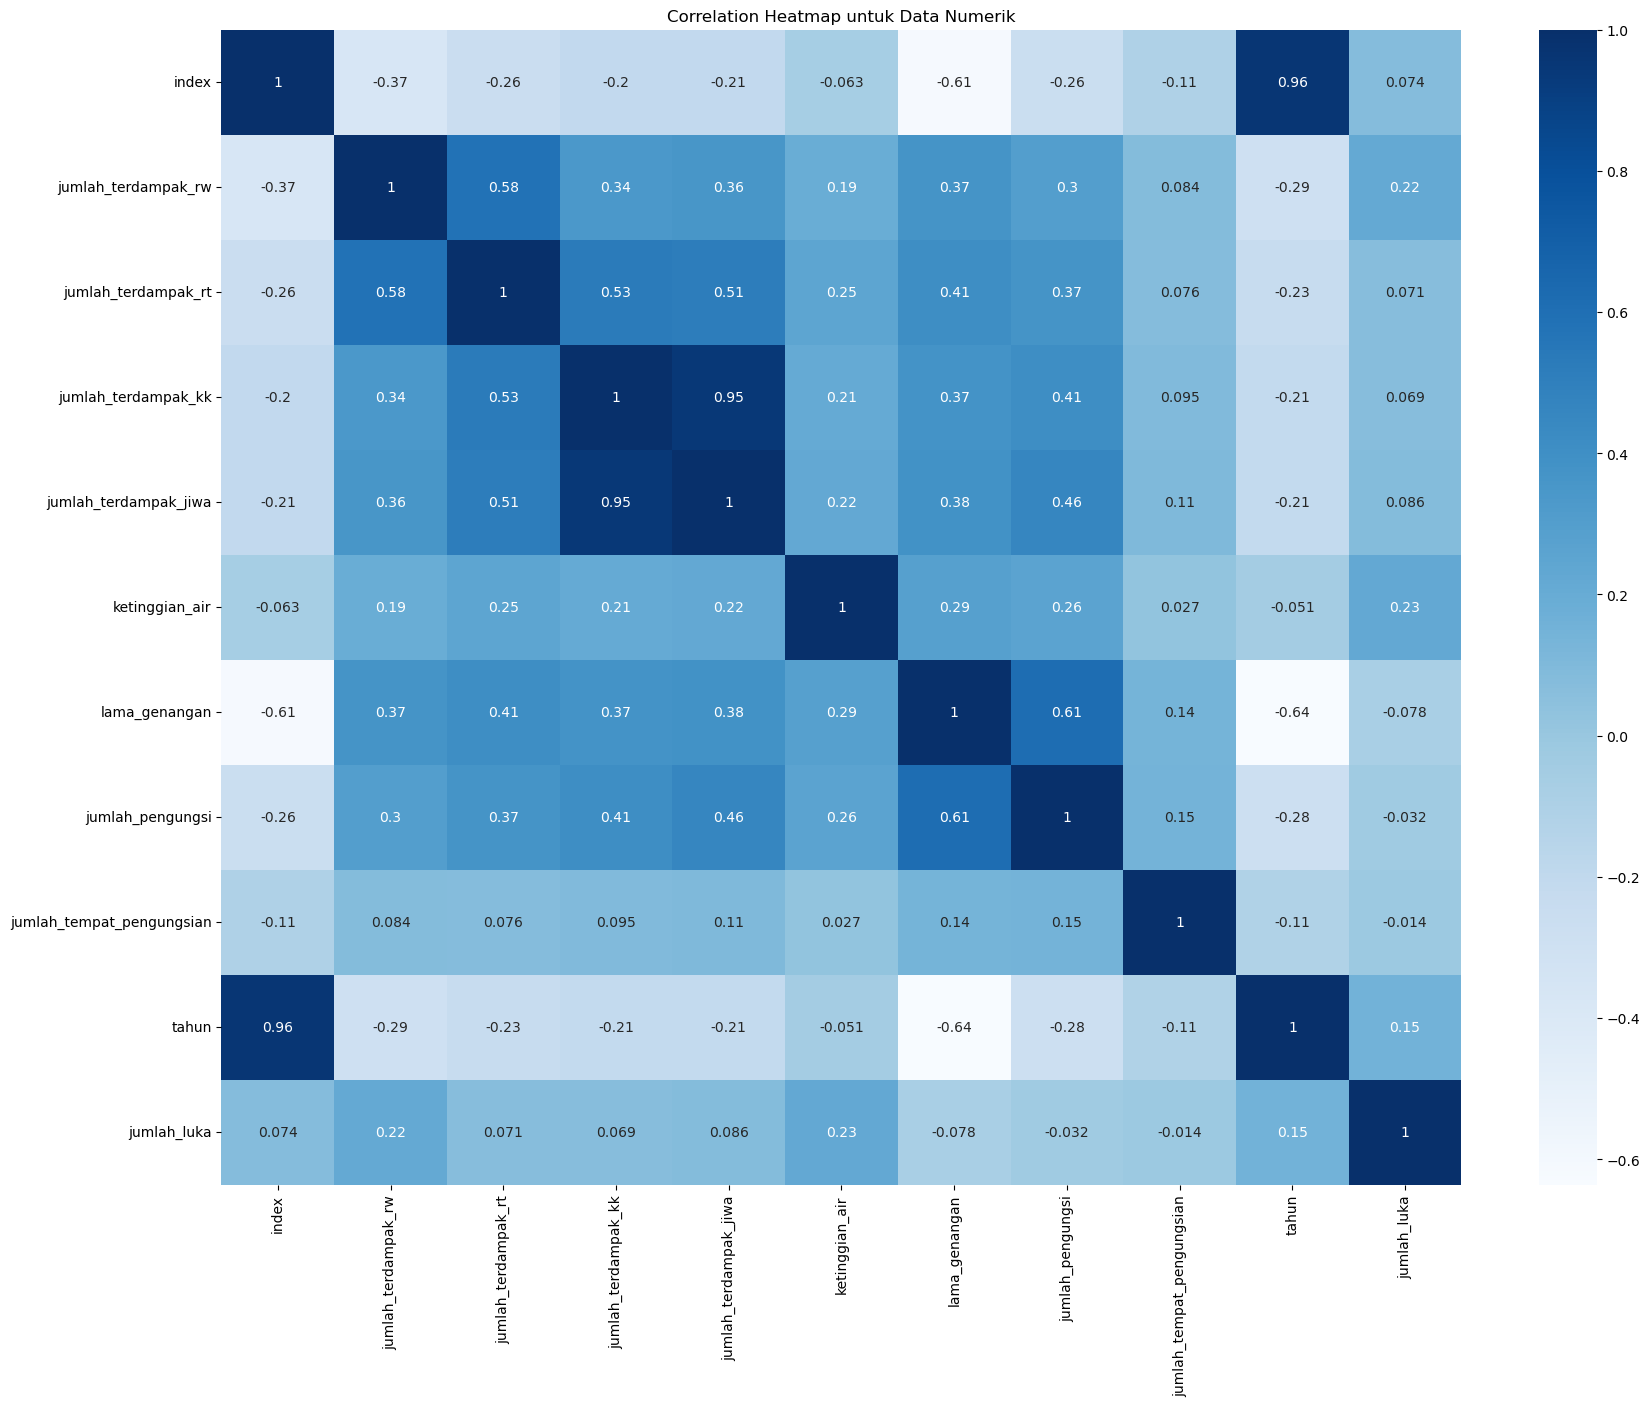

In [6710]:
# Inisialisasi plot dan ukuran plot
plt.figure(figsize=(20,15))

# Membuat Heatmap korelasi antara column numerik
sns.heatmap(df.corr(), annot=True, cmap='Blues')
# Keterangan untuk heatmap
plt.title("Correlation Heatmap untuk Data Numerik")

# Cetak plot
plt.show()

<h5>Dari correlation heatmap diatas, dapat disimpulkan bahwa hubungan fitur ini memiliki :</h5>

<p>
    <b>Korelasi Positif Kuat</b>
    <ul>
        <li>jumlah_terdampak_jiwa ~ jumlah_terdampak_kk : 0.949</li>    
        <li>jumlah_pengungsi ~ lama_genangan : 0.613</li>
        <li>jumlah_terdampak_rw ~ jumlah_terdampak_rt : 0.580</li>    
        <li>jumlah_terdampak_kk ~ jumlah_terdampak_rt : 0.532</li>    
        <li>jumlah_terdampak_jiwa ~ jumlah_terdampak_rt : 0.515</li>    
    </ul>
    <br>
    <b>Korelasi Positif Lemah</b>
    <ul>
        <li>jumlah_pengungsi ~ jumlah_terdampak_jiwa : 0.458</li>
        <li>lama_genangan ~ jumlah_terdampak_rt : 0.411</li>
        <li>jumlah_pengungsi ~ jumlah_terdampak_rt : 0.410</li>
        <li>jumlah_pengungsi ~ jumlah_terdampak_kk : 0.385</li>
        <li>lama_genangan ~ jumlah_terdampak_jiwa : 0.374</li>
        <li>lama_genangan ~ jumlah_terdampak_rw : 0.371</li>
        <li>lama_genangan ~ jumlah_terdampak_kk : 0.371</li>
        <li>jumlah_terdampak_jiwa ~ jumlah_terdampak_rw : 0.356</li>
        <li>jumlah_terdampak_kk ~ jumlah_terdampak_rw : 0.338</li>
    </ul>
</p>


<h3>Rata-rata tinggi banjir per kota administrasi</h3>

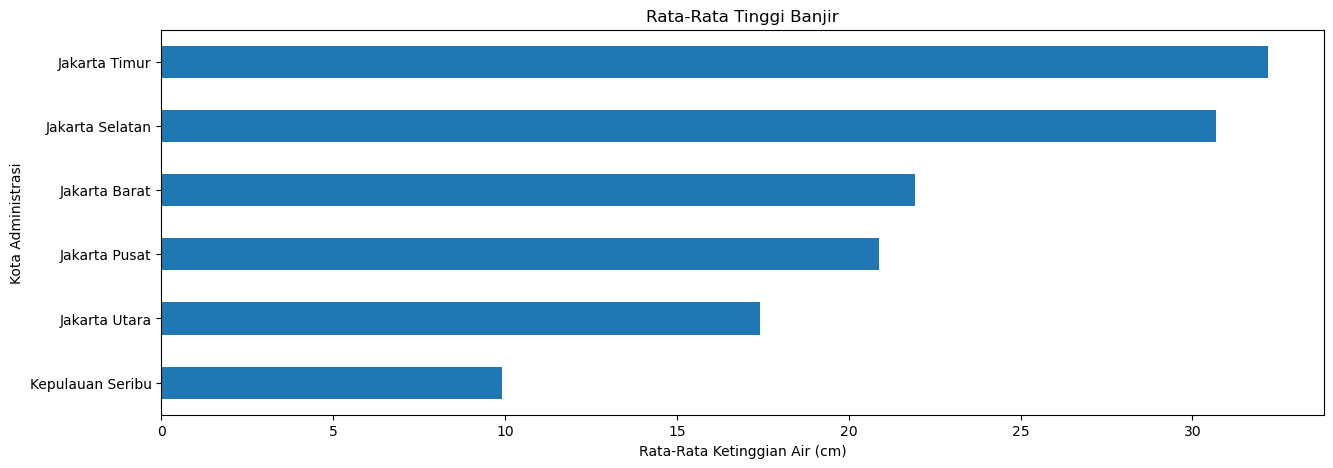

In [6711]:
# Membuat barchart data rata-rata ketinggian banjir per kota administrasi
df.groupby(['kota_administrasi'])['ketinggian_air'].mean().sort_values().plot(kind='barh', figsize=(15,5))

# Keterangan untuk barplot
plt.title('Rata-Rata Tinggi Banjir')
plt.xlabel('Rata-Rata Ketinggian Air (cm)')
plt.ylabel('Kota Administrasi')

# Cetak plot
plt.show()

<p>Berdasarkan barchart diatas, Jakarta Timur memiliki rata-rata tinggi banjir yang paling tinggi disusul oleh Jakarta Selatan</p>

<h3>Jumlah kejadian banjir per tahun berdasarkan kota adminstrasi</h3>

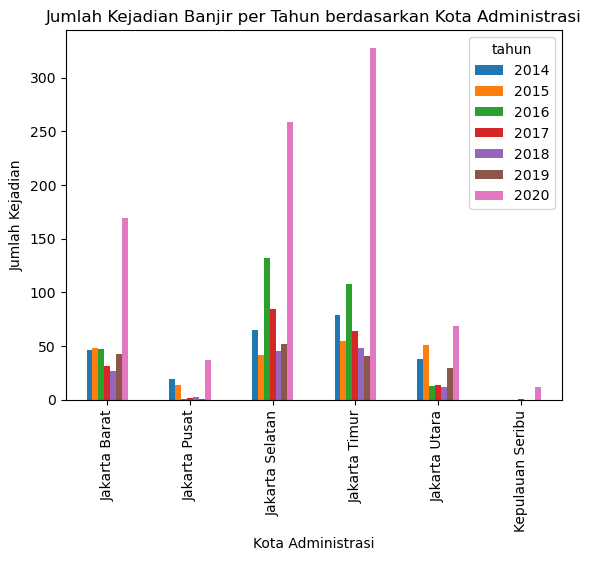

In [6712]:
# Membuat stacked barchart untuk jumlah kejadian banjir per tahun berdasarkan kota administrasi
df.groupby(['kota_administrasi', 'tahun']).size().unstack().plot(kind='bar')

# Memberikan keterangan untuk stacked barchart
plt.title('Jumlah Kejadian Banjir per Tahun berdasarkan Kota Administrasi')
plt.xlabel('Kota Administrasi')
plt.ylabel('Jumlah Kejadian')

# Cetak plot
plt.show()

<p>Dari stacked barchart diatas, 2020 adalah tahun dengan jumlah kejadian banjir paling banyak di seluruh daerah. Jakarta Timur dan Jakarta Selatan adalah dua kota dengan jumlah banjir terbanyak pertama dan kedua. Dua kota ini memiliki frekuensi jumlah kejadian banjir yang cukup tinggi dibandingkan kota lainnya</p>

<h3>Jumlah kejadian banjir berdasarkan bulan dari tahun 2014 - 2020</h3>

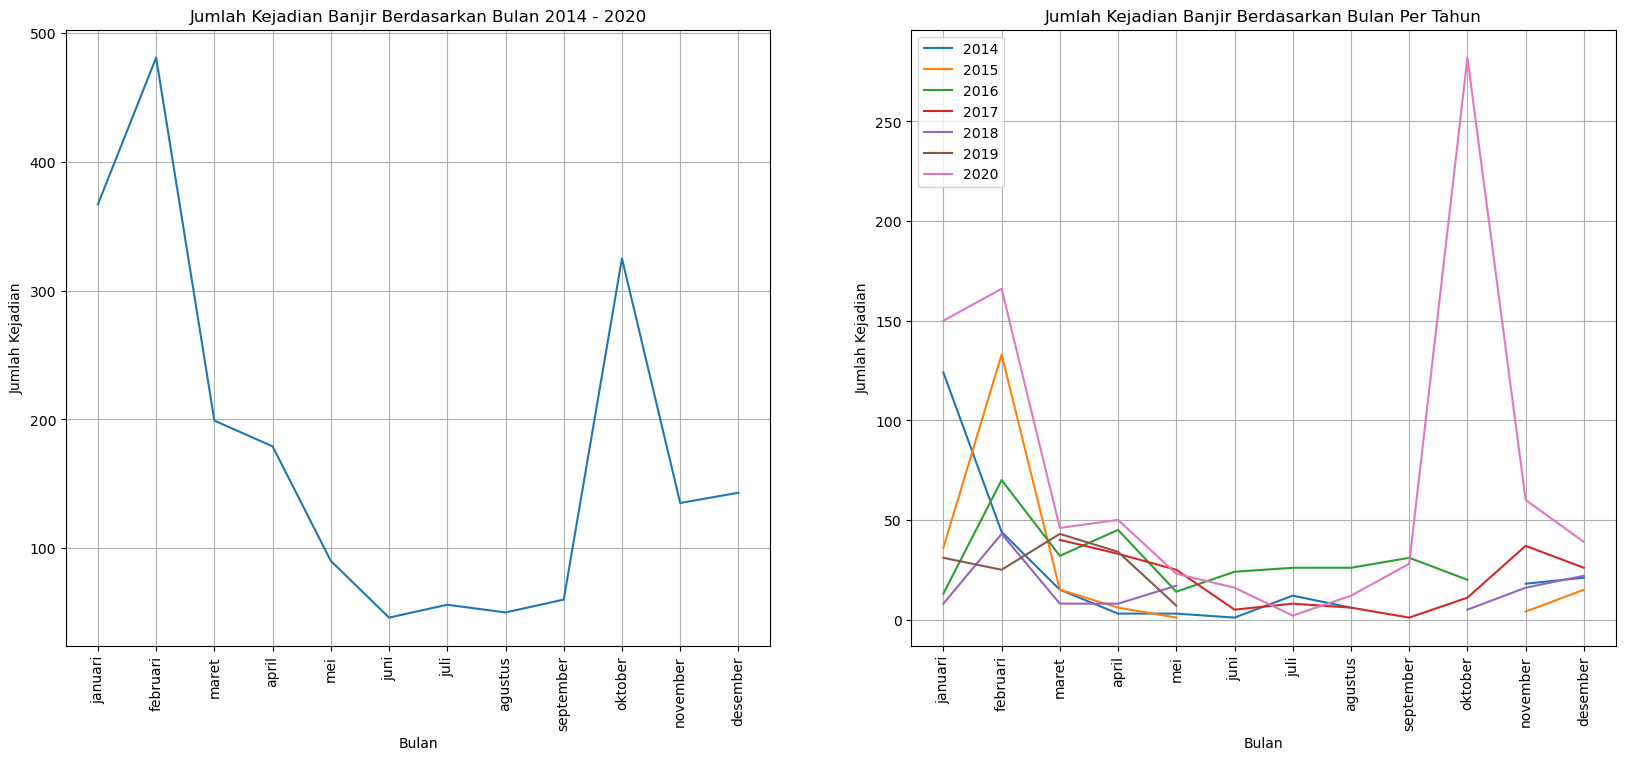

In [6713]:
# Membuat plot dengan ukuran jumlah 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot [0]
# Data jumlah kejadian banjir berdasarkan bulan
dataBulanan = df['bulan'].value_counts().reindex(listBulan)
# Membuat linechart jumlah kejadian banjir berdasarkan bulan
axes[0].plot(dataBulanan.index, dataBulanan.values)
# Memberikan keterangan untuk linechart [0]
axes[0].set_xticks(range(len(dataBulanan.index)), dataBulanan.index, rotation=90)
axes[0].set_title('Jumlah Kejadian Banjir Berdasarkan Bulan 2014 - 2020')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Jumlah Kejadian')
axes[0].grid(True)

    # Plot [1]
# Memecah data menjadi per tahun
for tahun in listTahun :
    # Data jumlah kejadian banjir berdasarkan bulan dalam tahun tertentu
    dataTahunan = df.loc[df['tahun'] == tahun]['bulan'].value_counts().reindex(listBulan)
    # Membuat linechart jumlah kejadian banjir berdasarkan bulan dalam tahun tertentu
    axes[1].plot(dataTahunan.index, dataTahunan.values, label=tahun)
# Memberikan keterangan untuk linechart [0]
axes[1].set_xticks(range(len(dataBulanan.index)), dataBulanan.index, rotation=90)
axes[1].set_title('Jumlah Kejadian Banjir Berdasarkan Bulan Per Tahun')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Jumlah Kejadian')
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Cetak plot
plt.show()

<p>Dapat dilihat dari linechart diatas, bulan Februari adalah bulan dimana frekuensi kejadian banjir paling tinggi, ini disusul oleh bulan Oktober. Pada stacked line chart, terlihat bahwa pada bulan Oktiber 2020, terjadi peningkatan kejadian banjir yang sangat drastis dimana tahun tahun sebelumnya tidak ada peningkatan yang signifikan. 
<br><br>
Dapat disimpulkan bahwa bulan Februari merupakan bulan yang sering terjadi banjir, dan pada bulan Oktober, rata-rata total meningkat karena terdapat peningkatan kejadian banjir yang signifikan pada bulan Oktober tahun 2020</p>

<h3>Persebaran ketinggian air pada setiap kota administrasi</h3>

Text(0, 0.5, 'Ketinggian Air (cm)')

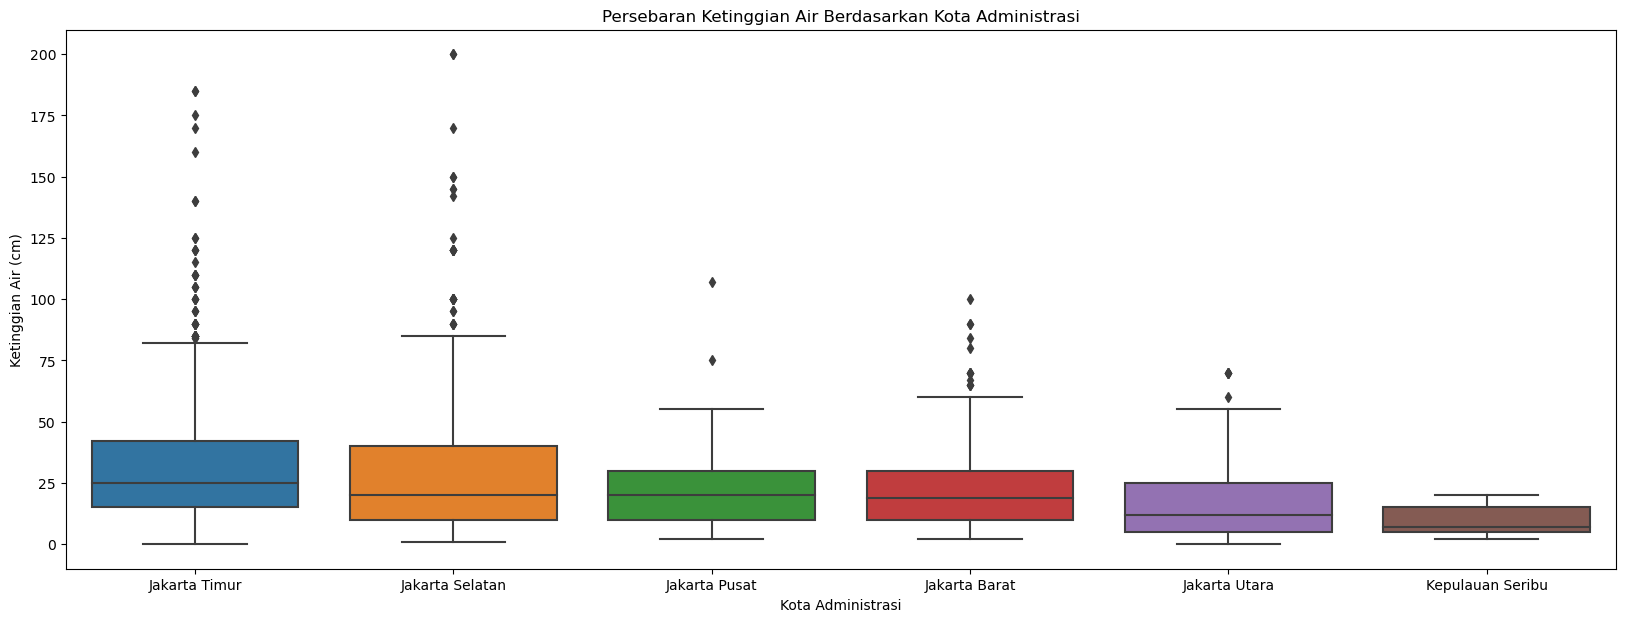

In [6714]:
# Inisialisasi ukuran plot
fig, ax = plt.subplots(figsize=(20,7))
# Membuat boxplot ketinggian air berdasarkan kota administrasi
sns.boxplot(x='kota_administrasi', y='ketinggian_air', data=df, ax=ax)

# Keterangan untuk boxplot
ax.set_title('Persebaran Ketinggian Air Berdasarkan Kota Administrasi')
ax.set_xlabel('Kota Administrasi')
ax.set_ylabel('Ketinggian Air (cm)')

<p>Berdasarkan boxplot diatas, persebaran ketinggian air dalam kejadian banjir paling luas ada pada Jakarta Timur, ini juga beriringan dengan rata-rata ketinggian banjir paling tinggi. Persebaran ketinggian air yang luas juga dialami oleh Jakarta Selatan, namun Jakarta Timur lebih banyak memiliki kejadian banjir yang memiliki tinggi yang dianggap outlier dibandingkan data lainnya</p>

<h3>Persebaran jumlah pengungsi pada setiap kota administrasi</h3>

Text(0, 0.5, 'Jumlah Pengungsi')

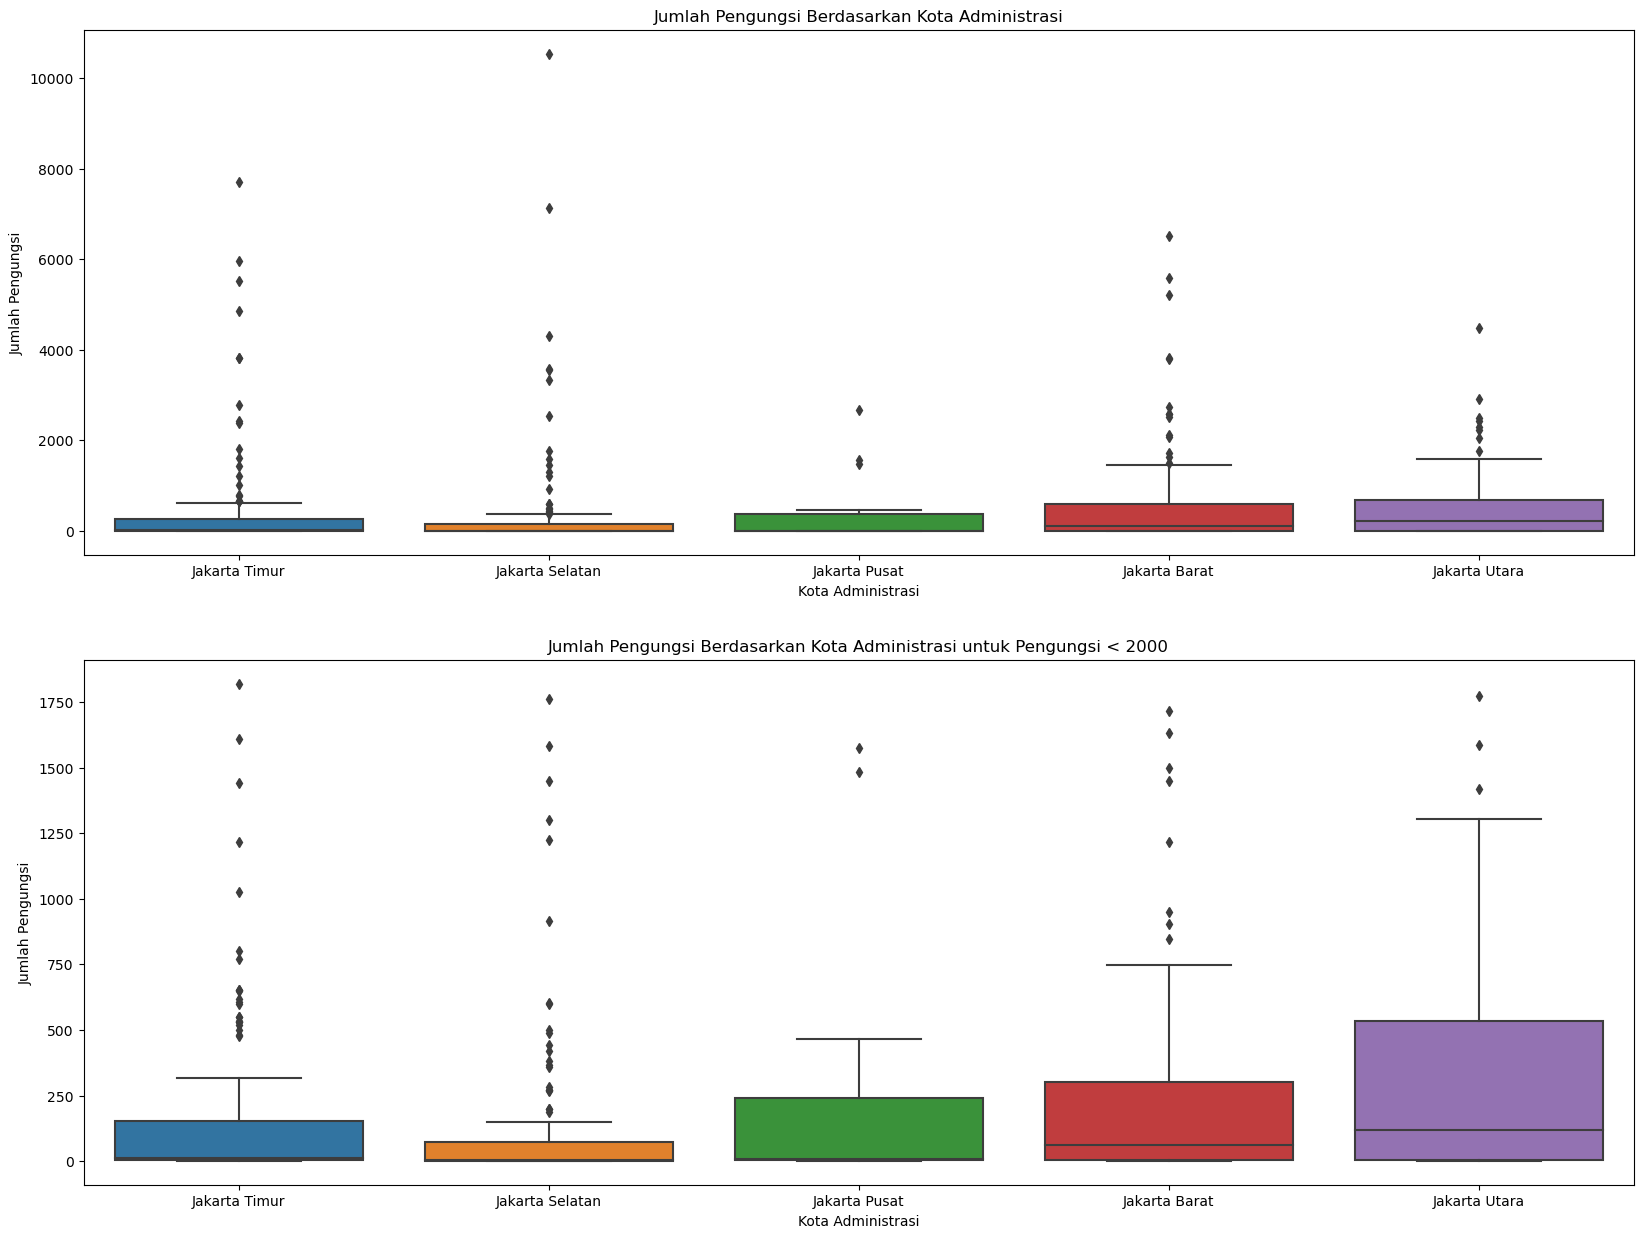

In [6715]:
# Membuat plot dengan ukuran jumlah 1x2 subplot
fig, axes = plt.subplots(2, 1, figsize=(20,15))

    # Plot [0]
# Membuat boxplot jumlah pengungsi berdasarkan kota administrasi
sns.boxplot(x='kota_administrasi', y='jumlah_pengungsi', data=df.loc[df['jumlah_pengungsi'] > 0], ax=axes[0])
# Keterangan untuk boxplot [0]
axes[0].set_title('Jumlah Pengungsi Berdasarkan Kota Administrasi')
axes[0].set_xlabel('Kota Administrasi')
axes[0].set_ylabel('Jumlah Pengungsi')

    # Plot [1]
# Membuat boxplot jumlah pengungsi berdasarkan kota administrasi untuk jumlah pengungsi kurang dari 2000
sns.boxplot(x='kota_administrasi', y='jumlah_pengungsi', data=df.loc[(df['jumlah_pengungsi'] > 0) & (df['jumlah_pengungsi'] < 2000)], ax=axes[1])
# Keterangan untuk boxplot [1]
axes[1].set_title('Jumlah Pengungsi Berdasarkan Kota Administrasi untuk Pengungsi < 2000')
axes[1].set_xlabel('Kota Administrasi')
axes[1].set_ylabel('Jumlah Pengungsi')

<p>Dari boxplot diatas dapat dilihat bahwa Jakarta Utara memiliki rata-rata yang lebih tinggi dan persebaran yang lebih luas, disusul dengan Jakarta Barat. Data tersebut mengindikasikan walaupun Jakarta Timur dan Jakarta Selatan adalah kota yang memiliki kejadian banjir yang tinggi. Pada saat terjadi banjir, Jakarta Utara dan Jakarta Barat lah yang memiliki jumlah pengungsi yang paling besar</p>

<h3>Jumlah kejadian banjir per kecamatan dalam satu kota administrasi</h3>

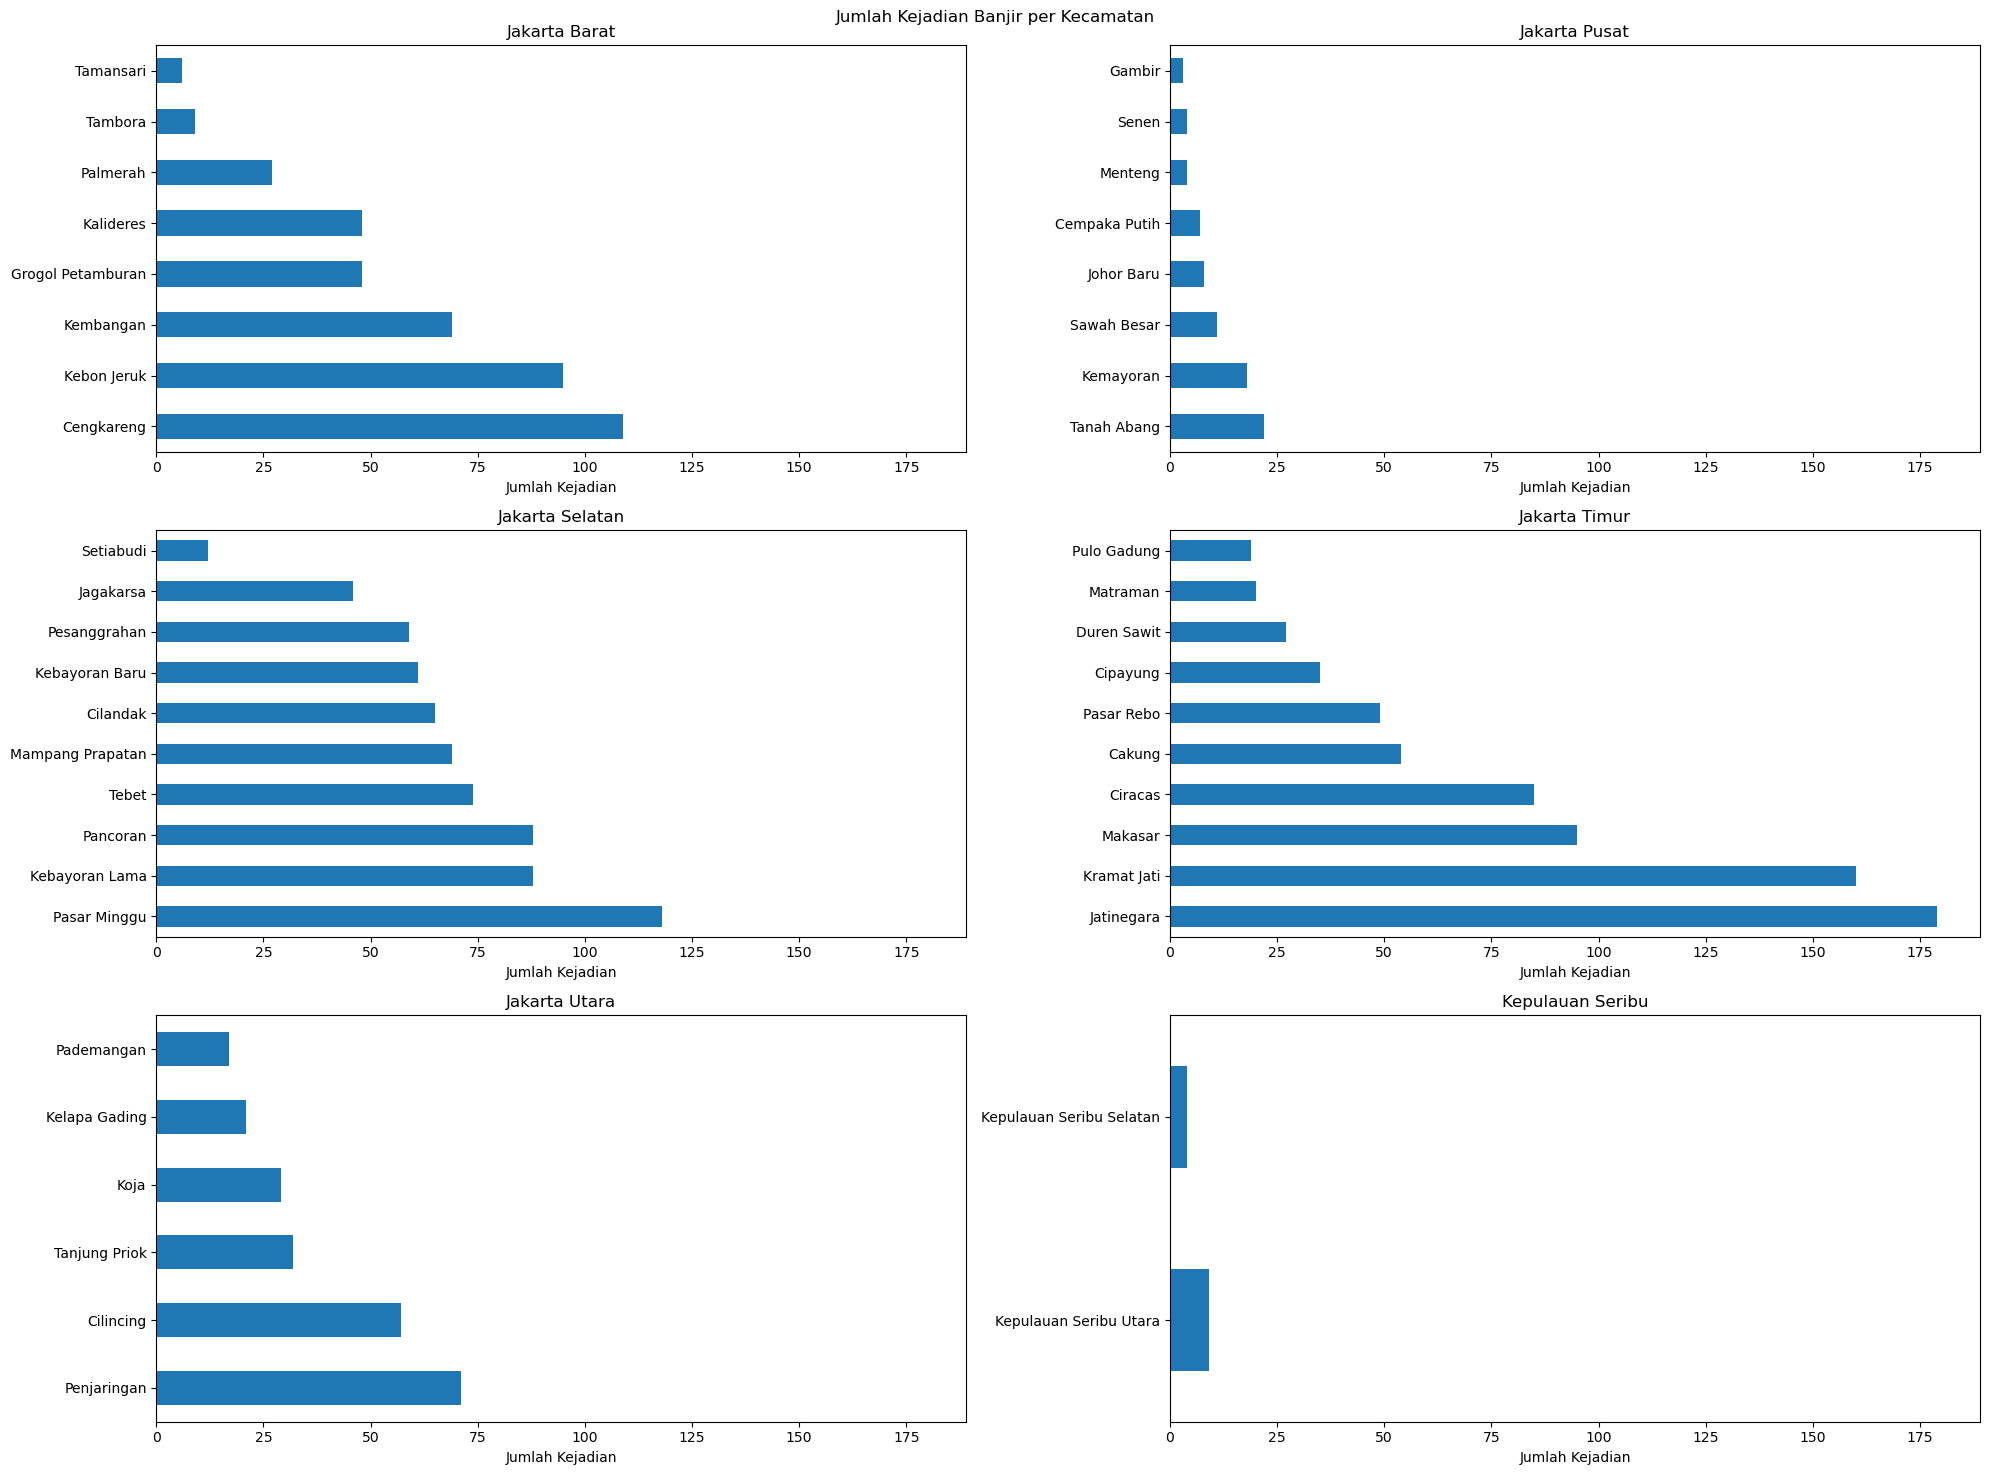

In [6716]:
# Membuat plot dengan ukuran jumlah 3x2 subplot
fig, axes = plt.subplots(3,2, figsize=(20,15))

    # Plot [0, 0]
# Membuat barplot jumlah banjir per kecamatan untuk kota Jakarta Barat
df.loc[df['kota_administrasi'] == 'Jakarta Barat']['kecamatan'].value_counts().plot(kind='barh', ax=axes[0,0])
# Keterangan untuk barchart [0, 0]
axes[0, 0].set_title('Jakarta Barat')
axes[0, 0].set_xlabel('Jumlah Kejadian')

    # Plot [0, 1]
# Membuat barplot jumlah banjir per kecamatan untuk kota Jakarta Pusat
df.loc[df['kota_administrasi'] == 'Jakarta Pusat']['kecamatan'].value_counts().plot(kind='barh', ax=axes[0,1])
# Keterangan untuk barchart [0, 1]
axes[0, 1].set_title('Jakarta Pusat')
axes[0, 1].set_xlabel('Jumlah Kejadian')

    # Plot [1, 0]
# Membuat barplot jumlah banjir per kecamatan untuk kota Jakarta Selatan
df.loc[df['kota_administrasi'] == 'Jakarta Selatan']['kecamatan'].value_counts().plot(kind='barh', ax=axes[1,0])
# Keterangan untuk barchart [1, 0]
axes[1, 0].set_title('Jakarta Selatan')
axes[1, 0].set_xlabel('Jumlah Kejadian')

    # Plot [1, 1]
# Membuat barplot jumlah banjir per kecamatan untuk kota Jakarta Timur
df.loc[df['kota_administrasi'] == 'Jakarta Timur']['kecamatan'].value_counts().plot(kind='barh', ax=axes[1,1])
# Keterangan untuk barchart [1, 1]
axes[1, 1].set_title('Jakarta Timur')
axes[1, 1].set_xlabel('Jumlah Kejadian')

    # Plot [2, 0]
# Membuat barplot jumlah banjir per kecamatan untuk kota Jakarta Utara
df.loc[df['kota_administrasi'] == 'Jakarta Utara']['kecamatan'].value_counts().plot(kind='barh', ax=axes[2,0])
# Keterangan untuk barchart [2, 0]
axes[2, 0].set_title('Jakarta Utara')
axes[2, 0].set_xlabel('Jumlah Kejadian')

    # Plot [2, 1]
# Membuat barplot jumlah banjir per kecamatan untuk kota Kepulauan Seribu
df.loc[df['kota_administrasi'] == 'Kepulauan Seribu']['kecamatan'].value_counts().plot(kind='barh', ax=axes[2,1])
# Keterangan untuk barchart [2, 1]
axes[2, 1].set_title('Kepulauan Seribu')
axes[2, 1].set_xlabel('Jumlah Kejadian')

# Membuat skala tick antar subplot sama berdasarkan data terbesar
for ax in axes.flat:
    ax.set_xlim(0, max(df['kecamatan'].value_counts()) + 10)

# Keterangan untuk plot utama
plt.suptitle('Jumlah Kejadian Banjir per Kecamatan')
plt.tight_layout()

# Cetak plot
plt.show()

<p>Dari barchart ditas, terlihat bahwa Jakarta Timur lah kota yang paling sering mengalami banjir, dengan kecamatan Jatinegara memiliki jumlah kejadian banjir tertinggi dari tahun 2014 - 2020 dengan jumlah diatas 175 kejadian</p>

<h3>Perbandingan Jumlah Pengungsi dan Tempat Pengungsian</h3>

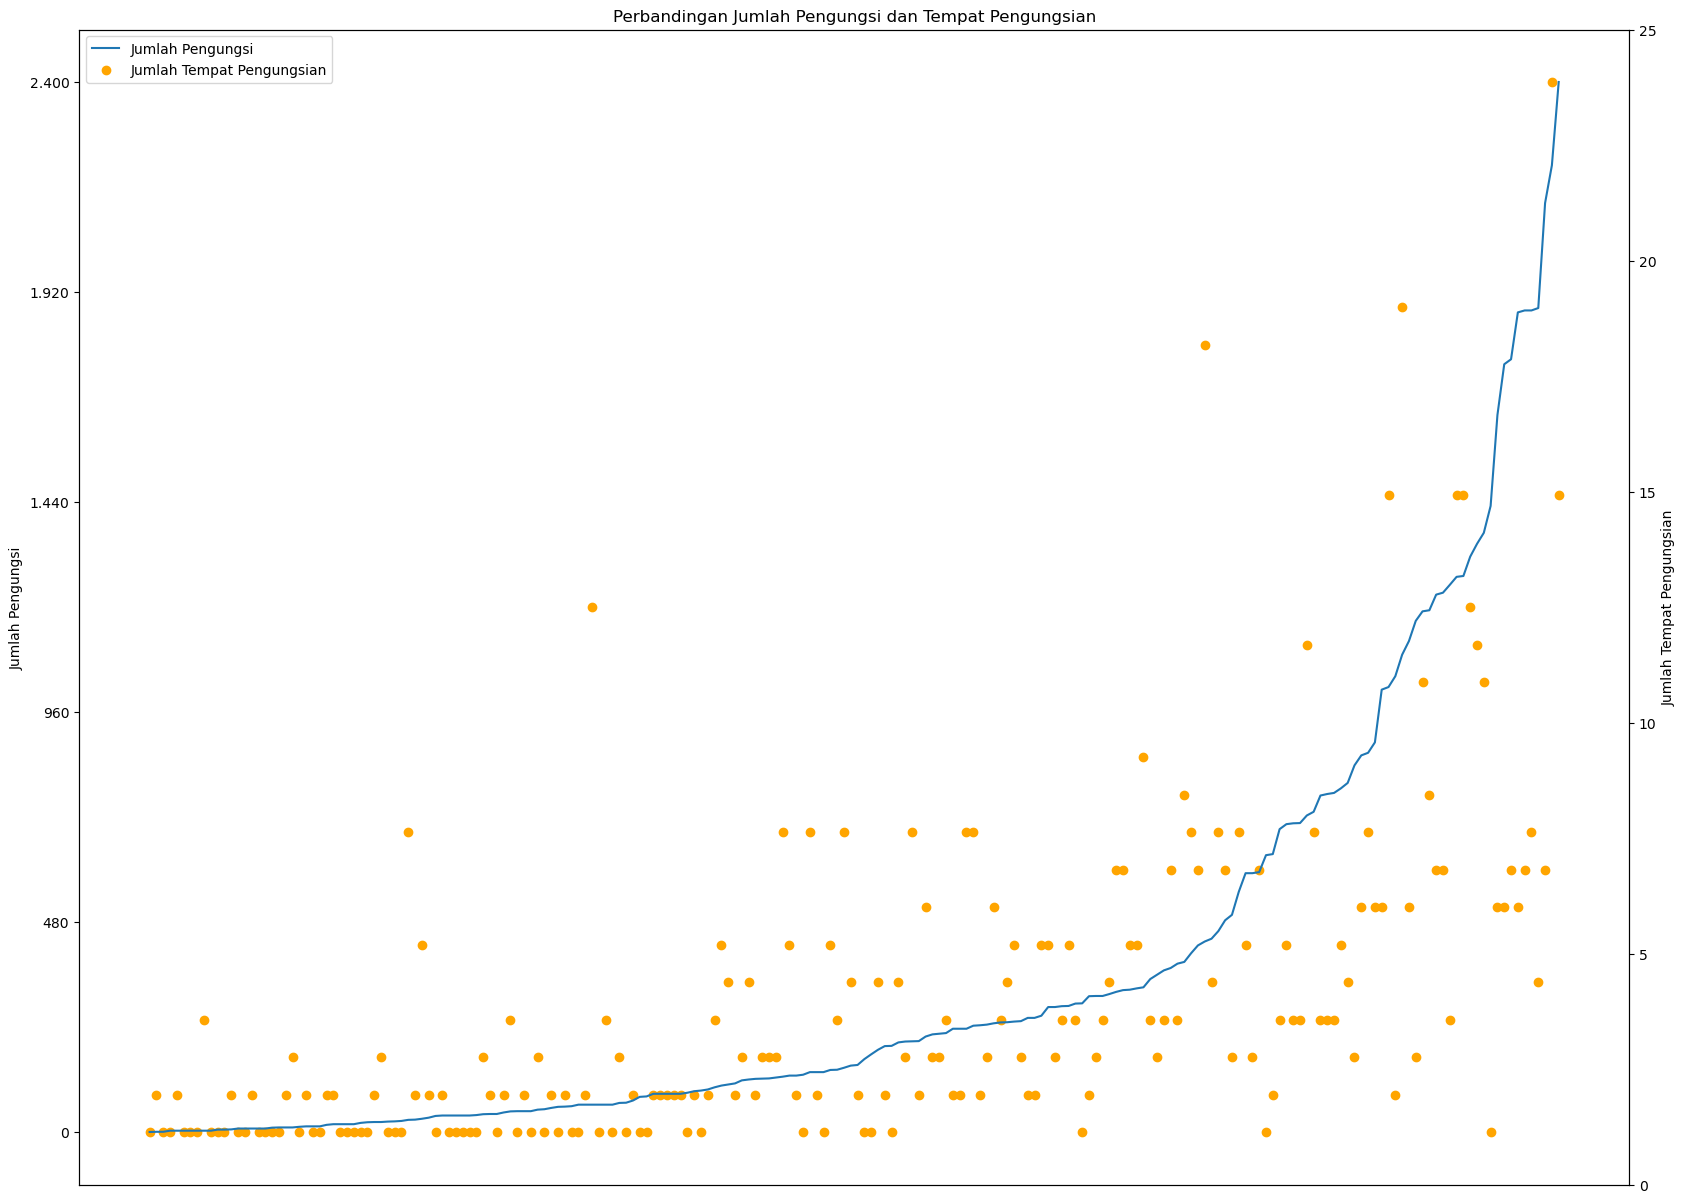

In [6717]:
# Membuat data pengungsi dan jumlah tempat pengungsian terurut berdasarkan jumlah pengungsi
dataPengungsi = df[['jumlah_pengungsi', 'jumlah_tempat_pengungsian']].sort_values(by='jumlah_pengungsi', ascending=True).reset_index()
# Menghapus data outlier
dataPengungsi = dataPengungsi.loc[(dataPengungsi['jumlah_tempat_pengungsian'] > 0) & (dataPengungsi['jumlah_tempat_pengungsian'] < 100)].reset_index()
dataPengungsi = dataPengungsi.loc[(dataPengungsi['jumlah_pengungsi'] > 20) & (dataPengungsi['jumlah_pengungsi'] < 5000)][['jumlah_pengungsi', 'jumlah_tempat_pengungsian']].reset_index()

# Normalisasi data agar memiliki skala yang sama
scaler = MinMaxScaler()
dataPengungsi = scaler.fit_transform(dataPengungsi)
dataPengungsi = pd.DataFrame(dataPengungsi, columns=['index', 'jumlah_pengungsi', 'jumlah_tempat_pengungsian'])

# Inisialisasi plot
fig, ax = plt.subplots(figsize=(20, 15))
# Membuat linechart berdasarkan data jumlah pengungsi yang sudah dinormalisasi
ax.plot(dataPengungsi['index'], dataPengungsi['jumlah_pengungsi'], label='Jumlah Pengungsi')
# Membuat scatterplot berdasarkan data jumlah tempat pengungsian yang sudah dinormalisasi
ax.scatter(dataPengungsi['index'], dataPengungsi['jumlah_tempat_pengungsian'], label='Jumlah Tempat Pengungsian', color='orange')

# Membuat label untuk jumlah pengungsi dengan value awal
ax.set_xticks([])
yticksCustom = [0, 0.2, 0.4, 0.6, 0.8, 1]
yticksLabels = ['0', '480', '960', '1.440', '1.920', '2.400']
# Keterangan untuk label jumlah pengungsi
ax.set_yticks(yticksCustom, yticksLabels)
ax.set_ylabel('Jumlah Pengungsi')

# Membuat label untuk jumlah tempat pengungsian dengan value awal
ax2 = ax.twinx()
yticks2Labels = ['0', '5', '10', '15', '20', '25']
# Keterangan untuk label jumlah tempat pengungsian
ax2.set_yticks(yticksCustom, yticks2Labels)
ax2.set_ylabel('Jumlah Tempat Pengungsian')

# Keterangan untuk plot utama
ax.set_title('Perbandingan Jumlah Pengungsi dan Tempat Pengungsian')
ax.legend(loc='upper left')

# Cetak plot
plt.show()


<p>Terlihat bahwa jumlah pengungsi dan jumlah tempat pengungsian cukup memiliki korelasi, namun jumlah pengungsi tidak selalu berkorelasi dengan jumlah tempat pengungsian. Dilihat dari plot diatas, bahwa jumlah pengungsi yang tinggi memunculkan jumlah tempat pengungsian yang tinggi juga</p>

<h3>Perbandingan antara 'jumlah terdampak' setiap kategori (jiwa, kk, rt, rw)</h3>

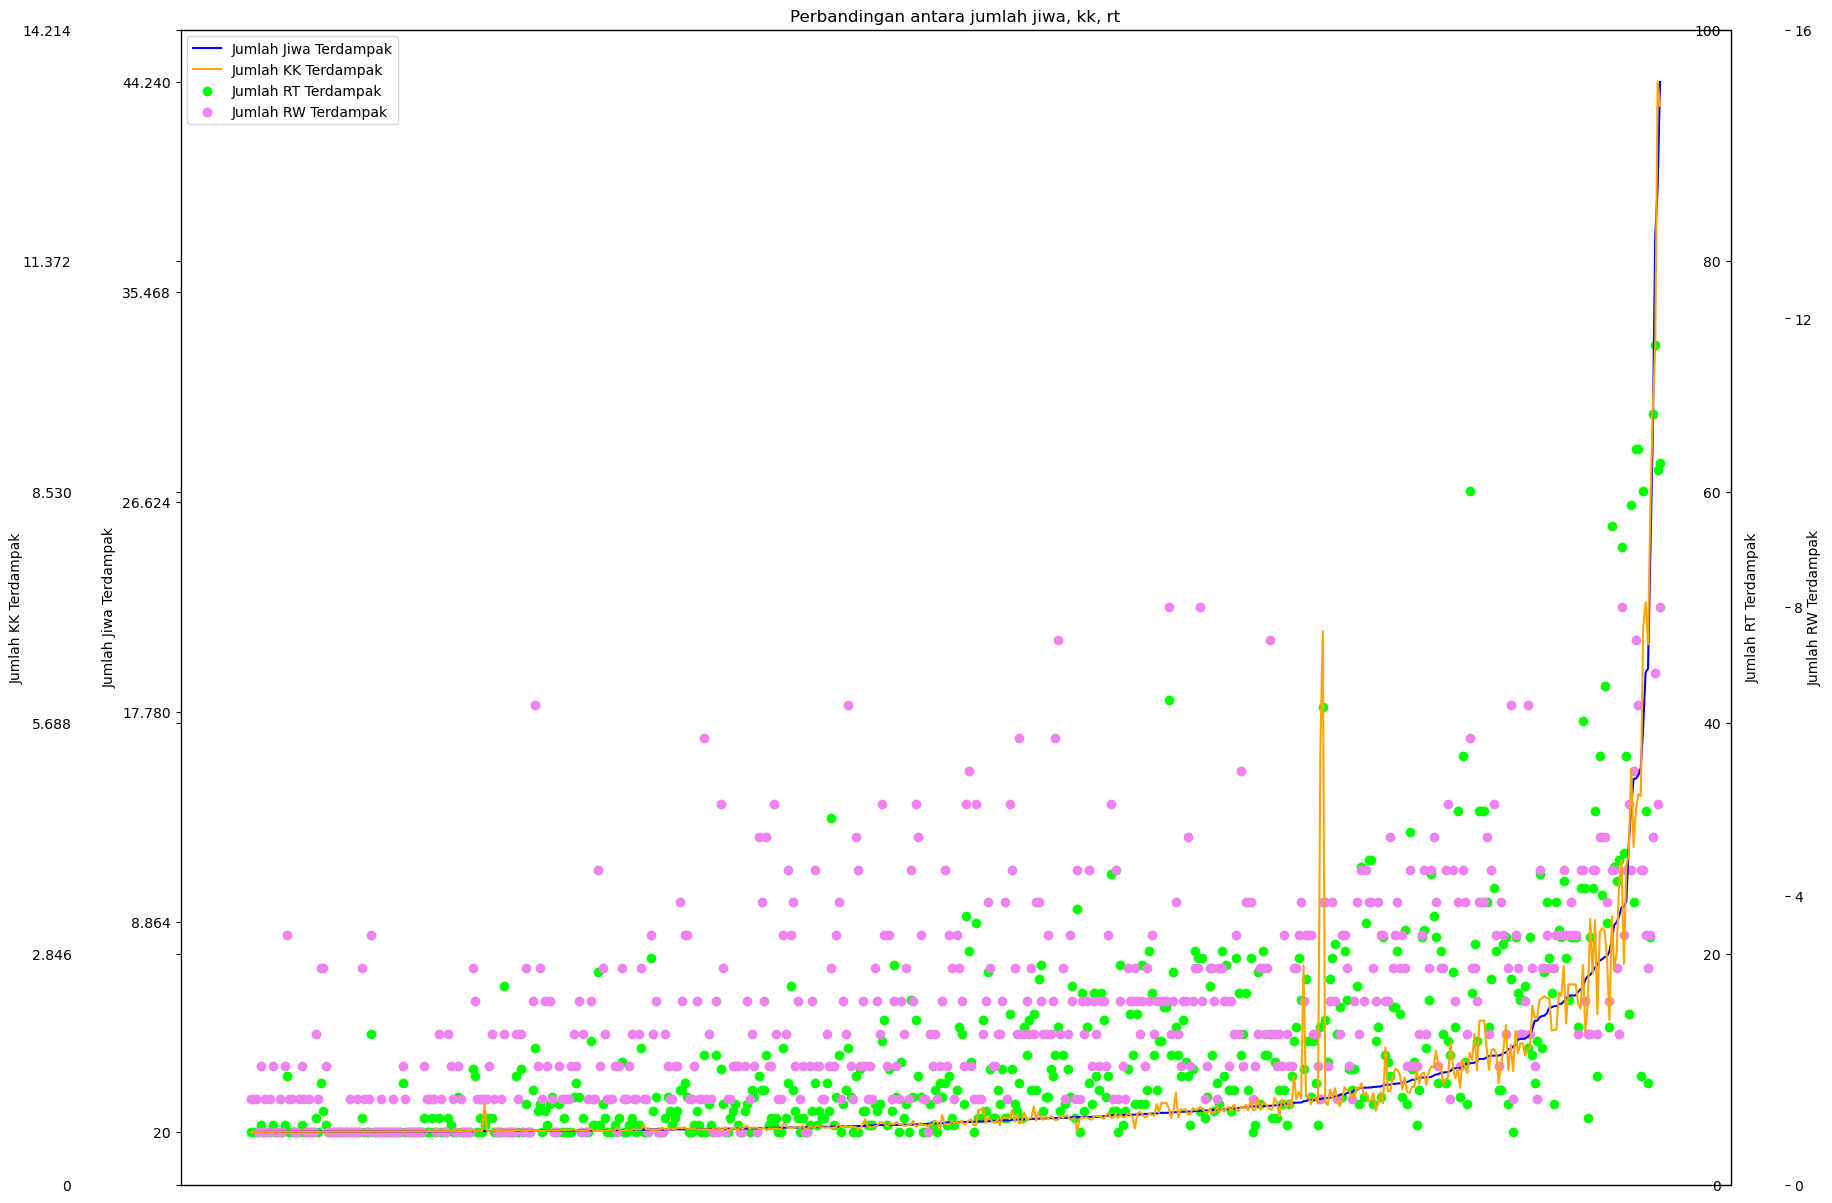

In [6718]:
# Membuat data jumlah terdampak jiwa, kk, rt, dan rw terurut berdasarkan jumlah terdampak jiwa
dataTerdampak = df[['jumlah_terdampak_jiwa', 'jumlah_terdampak_kk', 'jumlah_terdampak_rt', 'jumlah_terdampak_rw']].sort_values(by='jumlah_terdampak_jiwa', ascending=True).reset_index()
# Menghapus data outlier
dataTerdampak = dataTerdampak.loc[dataTerdampak['jumlah_terdampak_jiwa'] > 0]
dataTerdampak = dataTerdampak.loc[dataTerdampak['jumlah_terdampak_kk'] > 0]
dataTerdampak = dataTerdampak.loc[(dataTerdampak['jumlah_terdampak_rt'] > 0) & (dataTerdampak['jumlah_terdampak_rt'] < 150)]

# Normalisasi data agar memiliki skala yang sama
scaler = MinMaxScaler()
dataTerdampak = scaler.fit_transform(dataTerdampak)
dataTerdampak = pd.DataFrame(dataTerdampak, columns=['index', 'jumlah_terdampak_jiwa', 'jumlah_terdampak_kk', 'jumlah_terdampak_rt', 'jumlah_terdampak_rw'])
# Rescale data jumlah terdampak rt dan rw
dataTerdampak['jumlah_terdampak_rt'] = dataTerdampak['jumlah_terdampak_rt']*0.75
dataTerdampak['jumlah_terdampak_rw'] = dataTerdampak['jumlah_terdampak_rw']*0.5

# Menambahkan index baru pada data
dataTerdampak['index'] = dataTerdampak.index
dataTerdampak['index'] = pd.Series([i for i in range(len(dataTerdampak))])

# Inisialisasi plot
fig, ax = plt.subplots(figsize=(20, 15))

# Membuat linechart berdasarkan data jumlah jiwa terdampak
ax.plot(dataTerdampak['index'], dataTerdampak['jumlah_terdampak_jiwa'], label='Jumlah Jiwa Terdampak', color='blue')
# Membuat linechart berdasarkan data jumlah kk terdampak
ax.plot(dataTerdampak['index'], dataTerdampak['jumlah_terdampak_kk'], label='Jumlah KK Terdampak', color='orange')
# Membuat scatterplot berdasarkan data jumlah rt terdampak
ax.scatter(dataTerdampak['index'], dataTerdampak['jumlah_terdampak_rt'], label='Jumlah RT Terdampak', color='lime')
# Membuat scatterplot berdasarkan data jumlah rw terdampak
ax.scatter(dataTerdampak['index'], dataTerdampak['jumlah_terdampak_rw'], label='Jumlah RW Terdampak', color='violet')

# Membuat label untuk jumlah terdampak jiwa dengan value awal
ax.set_xticks([])
yticksCustom = [0, 0.2, 0.4, 0.6, 0.8, 1]
yticksLabel = ['20', '8.864', '17.780', '26.624', '35.468', '44.240']
# Keterangan untuk label jumlah terdampak jiwa
ax.set_yticks(yticksCustom, yticksLabel)
ax.set_ylabel('Jumlah Jiwa Terdampak')

# Membuat label untuk jumlah terdampak kk dengan value awal
ax2 = ax.twinx()
yticks2Label = ['0', '2.846', '5.688', '8.530', '11.372', '14.214']
# Keterangan untuk label jumlah terdampak kk
ax2.tick_params(axis='y', pad=75)
ax2.yaxis.set_label_coords(-0.11, 0.5)
ax2.set_yticks(yticksCustom, yticks2Label)
ax2.set_ylabel('Jumlah KK Terdampak')

# Membuat label untuk jumlah terdampak rt dengan value awal
ax3 = ax2.twinx()
yticks3Label = ['0', '20', '40', '60', '80', '100']
# Keterangan untuk label jumlah terdampak rt
ax3.spines['left'].set_position(('axes', 1))
ax3.spines['left'].set_visible(True)
ax3.yaxis.set_label_coords(1.01, 0.5)
ax3.set_yticks(yticksCustom, yticks3Label)
ax3.set_ylabel('Jumlah RT Terdampak')

# Membuat label untuk jumlah terdampak rw dengan value awal
ax4 = ax3.twinx()
yticksCustom4 = [0, 0.25, 0.5, 0.75, 1]
yticks4Label = ['0', '4', '8', '12', '16']
# Keterangan untuk label jumlah terdampak 
ax4.spines['right'].set_position(('axes', 1.035))
ax4.spines['right'].set_visible(False)
ax4.yaxis.set_label_coords(1.05, 0.5)
ax4.set_yticks(yticksCustom4, yticks4Label)
ax4.set_ylabel('Jumlah RW Terdampak')

# Keterangan untuk plot utama
ax.set_title('Perbandingan antara jumlah jiwa, kk, rt')
ax.legend(loc='upper left')

# Cetak plot
plt.show()


<p>Dapat dilihat dari plot diatas bahwa jumlah jiwa terdampak dan jumlah kk terdampak berkorelasi lurus. Jumlah RT Terdampak pun hampir mengikuti dari jumlah jiwa terdampak dimana saat jumlah jiwa terdampak meningkat, jumlah rt terdampak pun mengikuti naik. Jumlah RW Terdampak tampak tidak terlalu mengikuti terhadap jumlah jiwa terdampak, namun saat jumlah jiwa terdampak tinggi, data jumlah rw terdampak yang tinggi juga ikut muncul</p>

<h3>Perbandingan antara Jumlah Pengungsi terdahap Lama Genangan</h3>

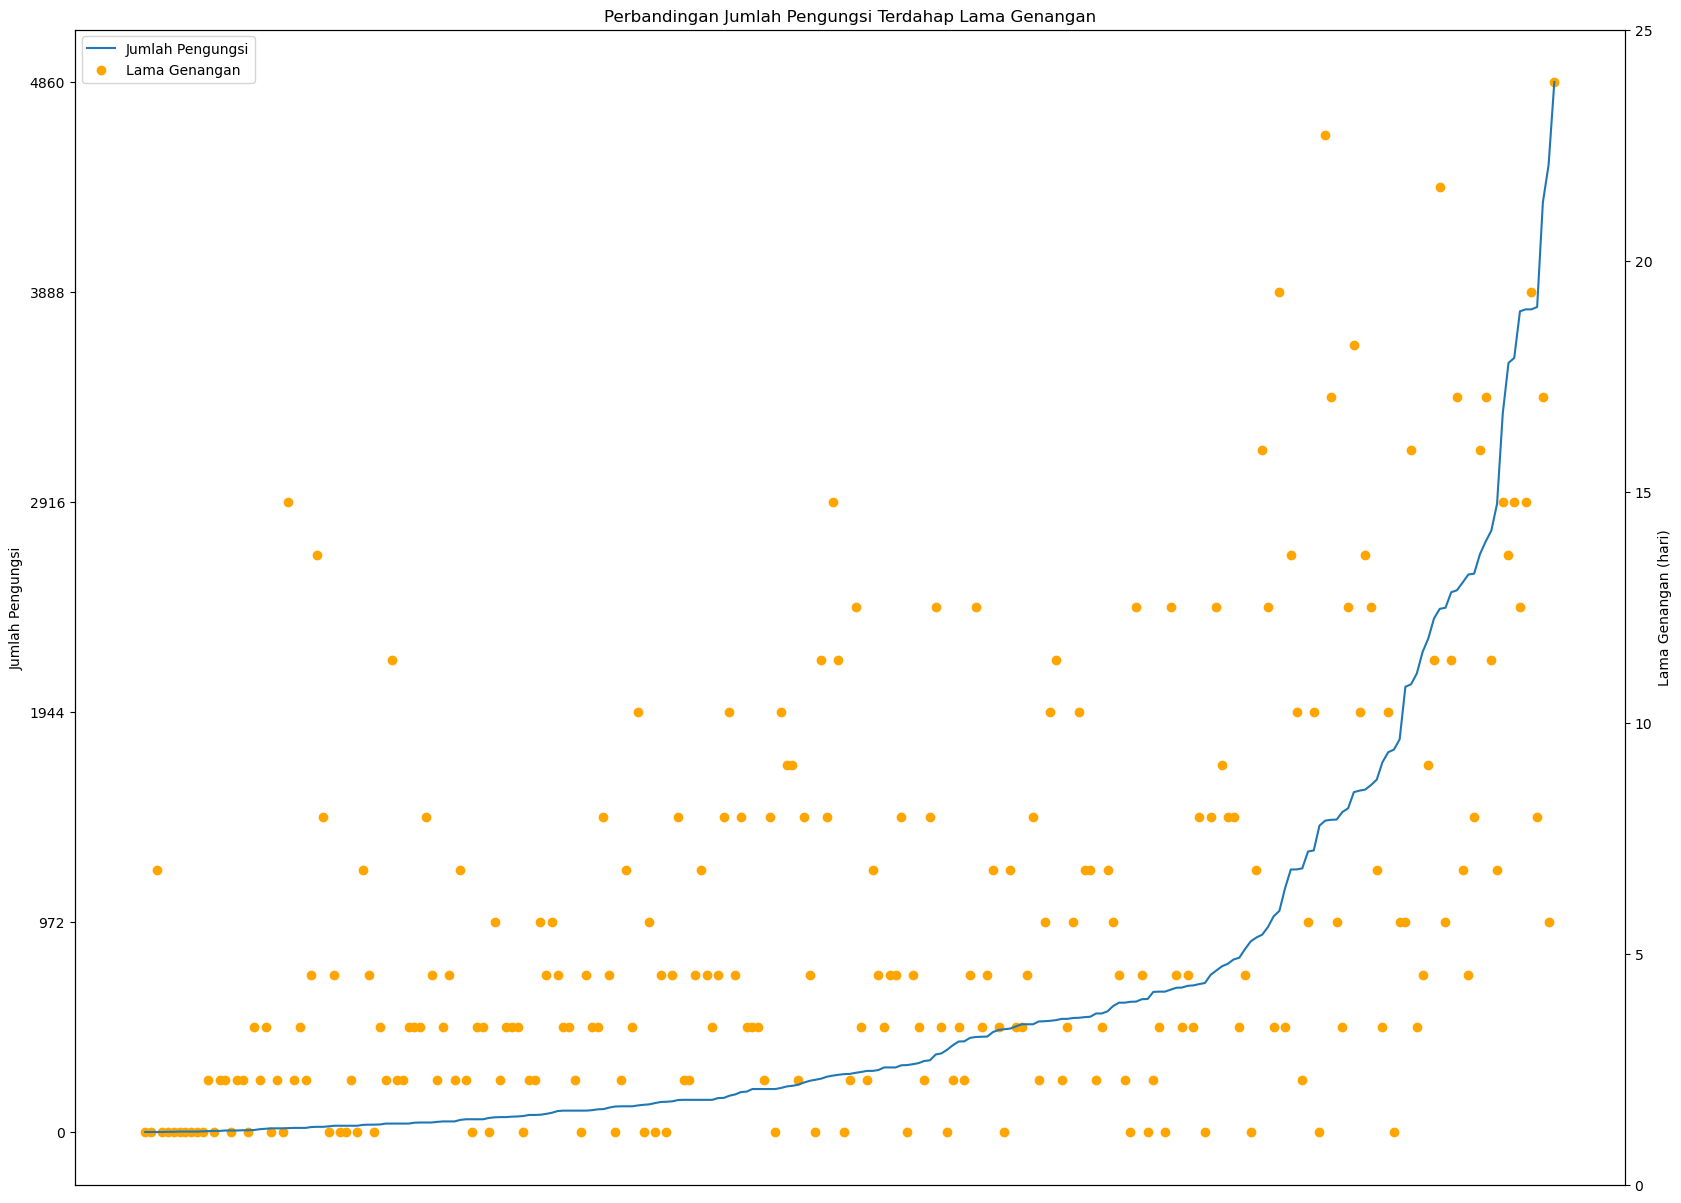

In [6719]:
# Membuat data jumlah pengungsi dan lama genangan terurut berdasarkan jumlah pengungsi
dataKetinggianPengungsi = df[['jumlah_pengungsi', 'lama_genangan']].sort_values(by='jumlah_pengungsi').reset_index()
# Menghapus data outlier
dataKetinggianPengungsi = dataKetinggianPengungsi.loc[(dataKetinggianPengungsi['lama_genangan'] > 0)]
dataKetinggianPengungsi = dataKetinggianPengungsi.loc[(dataKetinggianPengungsi['jumlah_pengungsi'] > 0) & (dataKetinggianPengungsi['jumlah_pengungsi'] < 5000)]

# Normalisasi data agar memiliki skala yang sama
scaler = MinMaxScaler()
dataKetinggianPengungsi = scaler.fit_transform(dataKetinggianPengungsi)
dataKetinggianPengungsi = pd.DataFrame(dataKetinggianPengungsi, columns=['index', 'jumlah_pengungsi', 'lama_genangan'])
# Rescale data jumlah terdampak rt dan rw
# dataKetinggianPengungsi['lama_genangan'] = dataKetinggianPengungsi['lama_genangan'] * 0.75

# Menambahkan index pada dataframe
dataKetinggianPengungsi['index'] = [i for i in range(len(dataKetinggianPengungsi))]

# Inisialisasi plot
fig, ax = plt.subplots(figsize=(20, 15))

# Membuat linechart berdasarkan data jumlah pengungsi
ax.plot(dataKetinggianPengungsi['index'], dataKetinggianPengungsi['jumlah_pengungsi'], label='Jumlah Pengungsi')
# Membuat scatterplot berdasarkan data lama genangan
ax.scatter(dataKetinggianPengungsi['index'], dataKetinggianPengungsi['lama_genangan'], label='Lama Genangan', color='orange')

# Membuat label untuk jumlah pengungsi dengan value awal
ax.set_xticks([])
yticksCustom = [0, 0.2, 0.4, 0.6, 0.8, 1]
yticksLabels = ['0', '972', '1944', '2916', '3888', '4860']
# Keterangan untuk label jumlah pengungsi
ax.set_yticks(yticksCustom, yticksLabels)
ax.set_ylabel('Jumlah Pengungsi')

# Membuat label untuk jumlah lama genangan dengan value awal
ax2 = ax.twinx()
yticks2Labels = ['0', '5', '10', '15', '20', '25']
# Keterangan untuk label jumlah lama genangan
ax2.set_yticks(yticksCustom, yticks2Labels)
ax2.set_ylabel('Lama Genangan (hari)')

# Keterangan plot utama
ax.set_title('Perbandingan Jumlah Pengungsi Terdahap Lama Genangan')
ax.legend(loc='upper left')

# Cetak Plot
plt.show()

<p>Terlihat bahwa jumlah pengungsi dan lama genangan cukup memiliki korelasi, namun jumlah pengungsi tidak selalu berkorelasi dengan lama genangan. Dilihat dari plot diatas, bahwa jumlah pengungsi yang tinggi memunculkan lama genangan yang tinggi juga</p>

<h3><b>Analisis data banjir (data utama) dengan data cuaca (data pendukung)</b></h3>

<h3>Perbandingan frekuensi banjir dan hujan per-bulan pada tahun 2017-2018</h3>

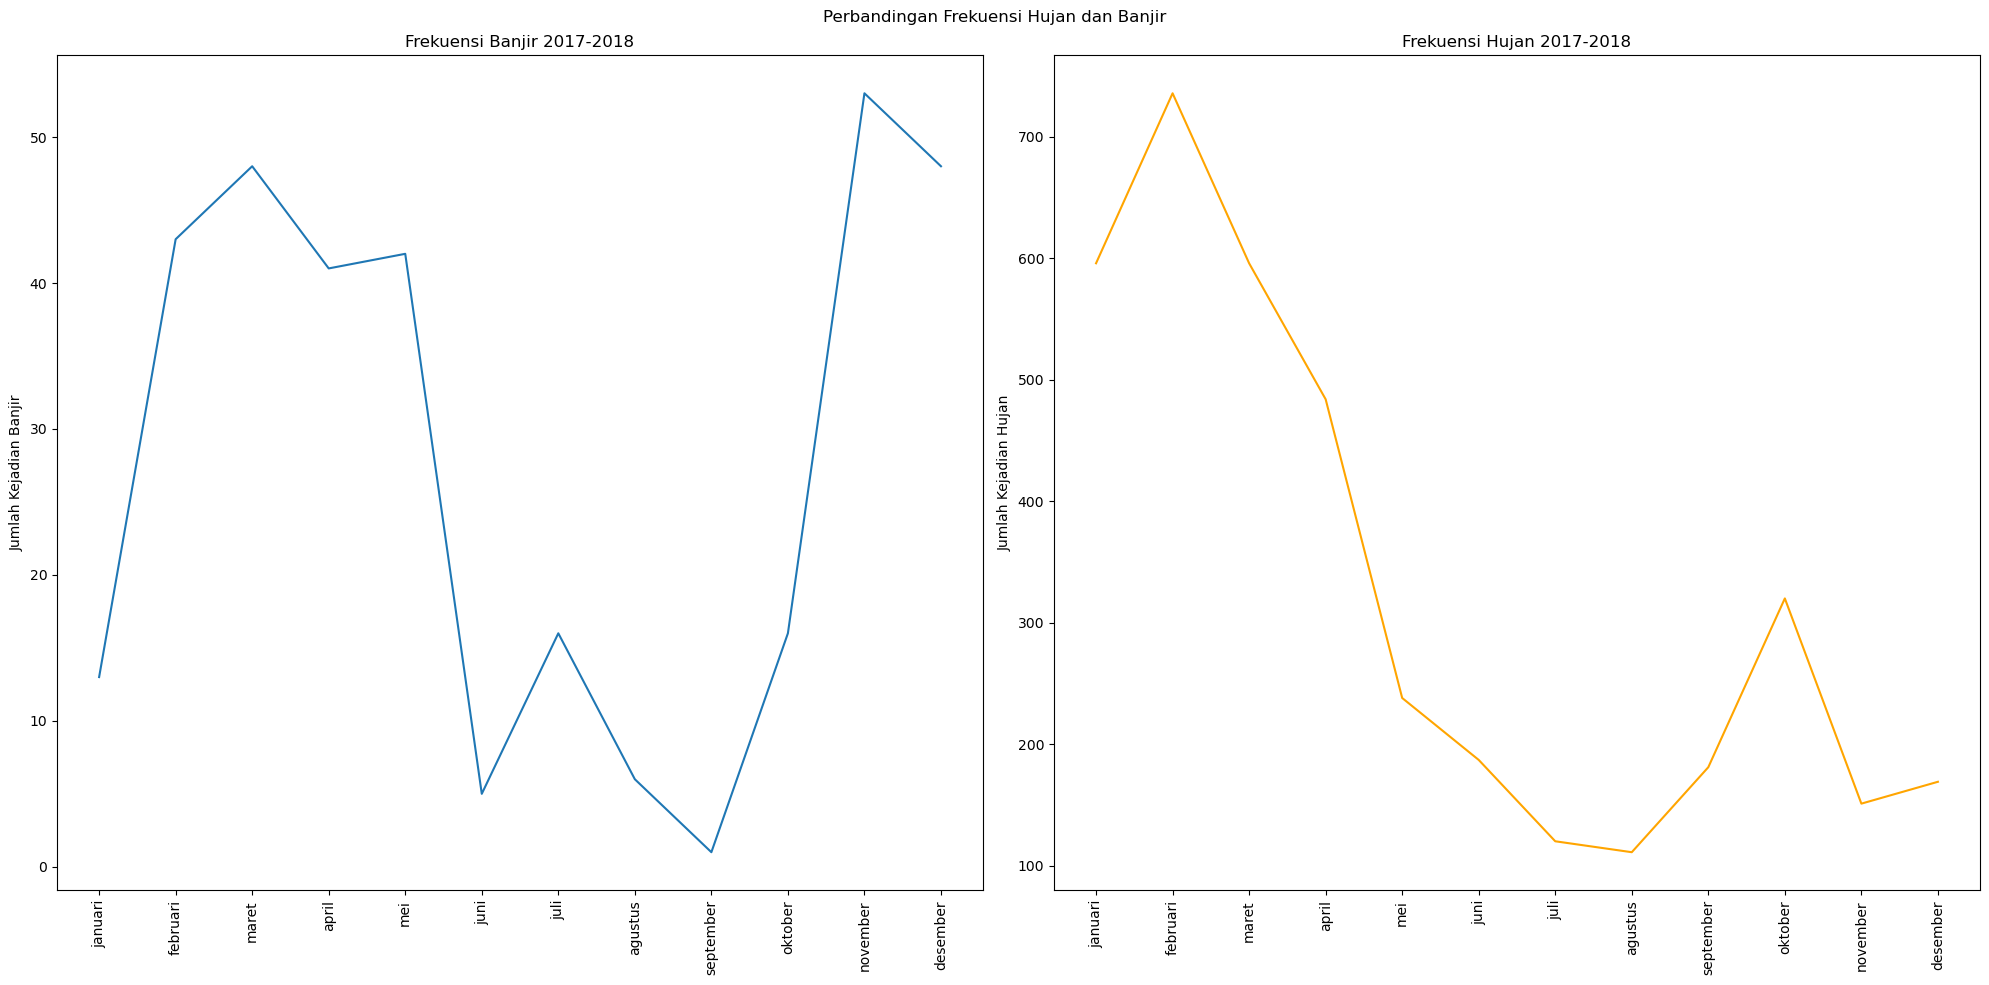

In [6737]:
# Membuat plot dengan ukuran jumlah 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# Membuat data jumlah frekuensi banjir berdasarkan bulan
dataBulananBanjir = dfBanjir['bulan'].value_counts().reindex(listBulan)
# Membuat data jumlah frekuensi hujan berdasarkan bulan
dataBulananHujan = dfCuaca.loc[dfCuaca['cuaca'] == 'Hujan']['bulan'].value_counts().reindex(listBulan)

    # Axes [0]
# Membuat linechart berdasarkan data jumlah frekuensi banjir perbulannya
axes[0].plot(dataBulananBanjir.index, dataBulananBanjir.values)
# Keterangan untuk linechart [0]
axes[0].set_xticks(range(len(dataBulananBanjir.index)), dataBulananBanjir.index, rotation=90)
axes[0].set_ylabel('Jumlah Kejadian Banjir')
axes[0].set_title('Frekuensi Banjir 2017-2018')

    # Axes [1]
# Membuat linechart berdasarkan data jumlah frekuensi hujan perbulannya
axes[1].plot(dataBulananHujan.index, dataBulananHujan.values, color='orange')
# Keterangan untuk linechart [1]
axes[1].set_xticks(range(len(dataBulananHujan.index)), dataBulananHujan.index, rotation=90)
axes[1].set_ylabel('Jumlah Kejadian Hujan')
axes[1].set_title('Frekuensi Hujan 2017-2018')

# Membuat keterangan untuk plot utama
plt.suptitle('Perbandingan Frekuensi Hujan dan Banjir')
plt.tight_layout()

# Cetak Plot
plt.show()

<p>Berdasarkan linechart diatas, terlihat bahwa frekuensi banjir memiliki tren mengikuti frekuensi hujan, dimana saat intensitas hujan tinggi dalam suatu bulan tertentu, frekuensi terjadinya banjir pun mengikuti. Ini menunjukkan bahwa intensitas hujan memiliki korelasi dengan peristiwa terjadinya banjir</p

<h3>Perbandingan frekuensi banjir dan hujan per kota administrasi pada tahun 2017-2018</h3>

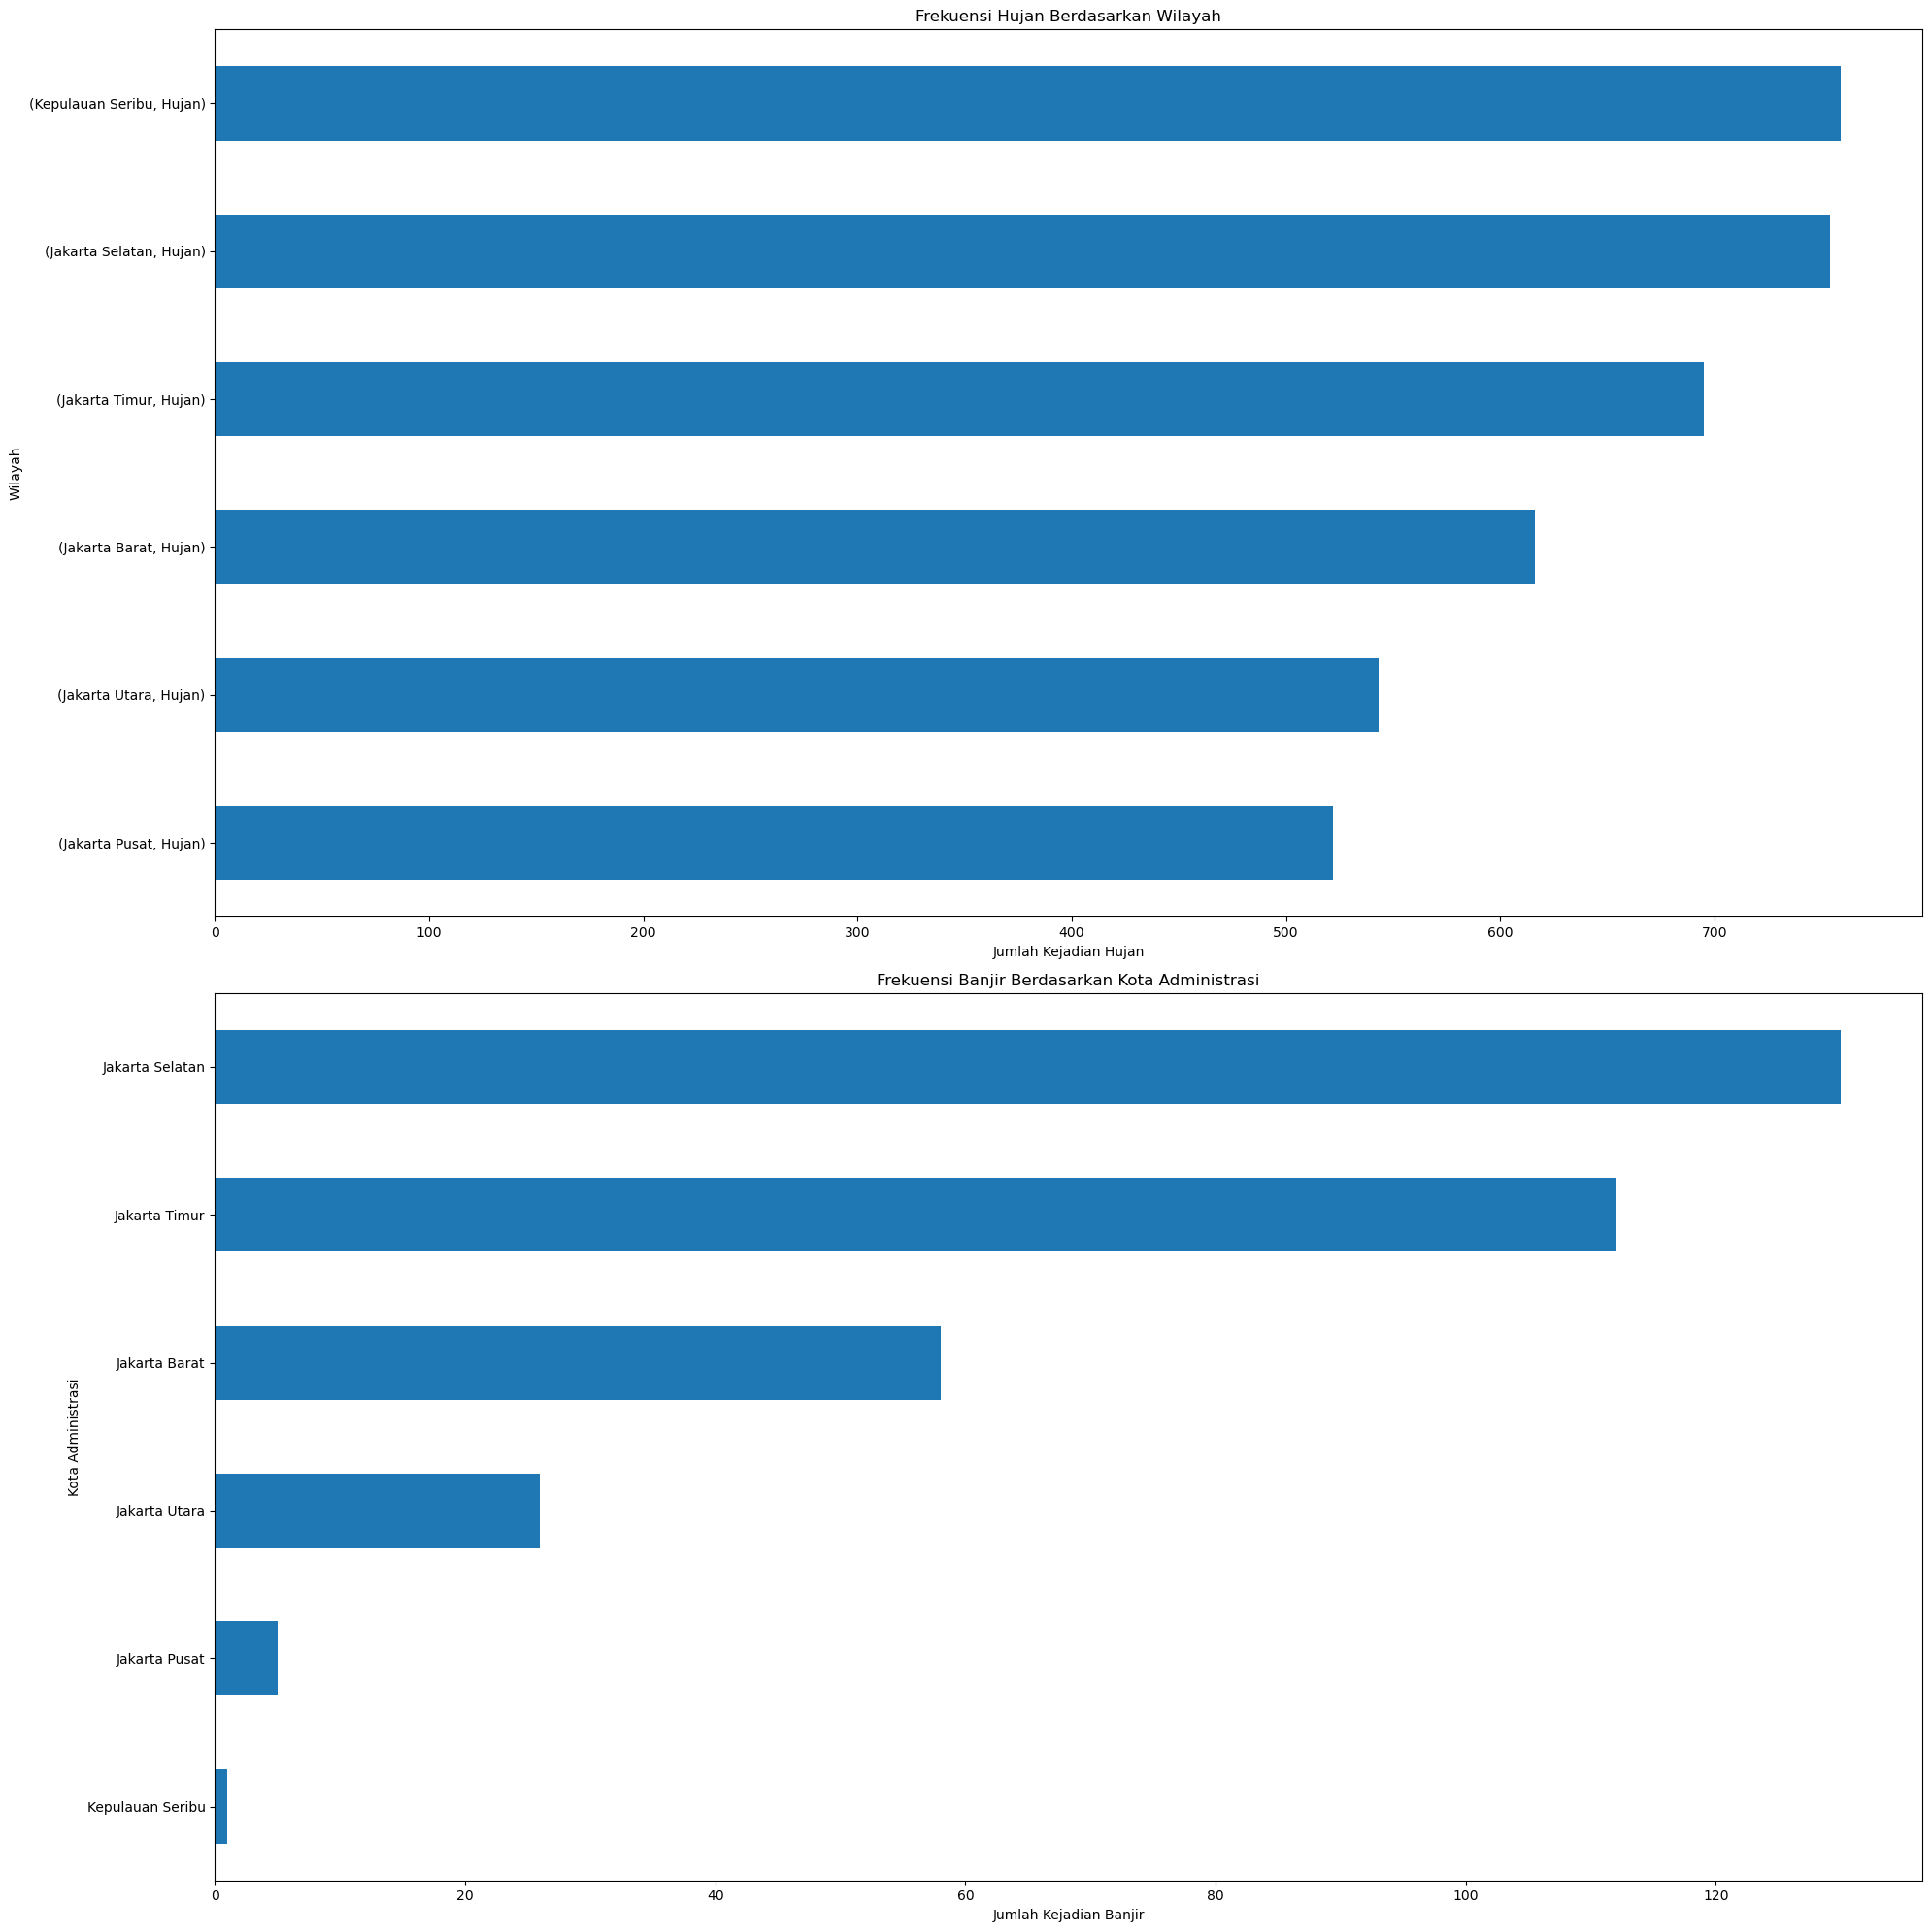

In [6721]:
# Membuat plot dengan ukuran jumlah 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

    # Plot [0]
# Membuat horizontal barchart frekuensi hujan berdasarkan kota administrasi
dfCuaca.loc[dfCuaca['cuaca'] == 'Hujan'].groupby(['wilayah'])['cuaca'].value_counts().sort_values().plot(kind='barh', ax=axes[0])
# Keterangan untuk horizontal barchart [0]
axes[0].set_xlabel('Jumlah Kejadian Hujan')
axes[0].set_ylabel('Wilayah')
axes[0].set_title('Frekuensi Hujan Berdasarkan Wilayah')

    # Plot[1]
# Membuat horizontal barchart frekuensi banjir berdasarkan kota administrasi
dfBanjir['kota_administrasi'].value_counts().sort_values().plot(kind='barh', ax=axes[1])
# Keterangan untuk horizontal barchart [1]
axes[1].set_xlabel('Jumlah Kejadian Banjir')
axes[1].set_ylabel('Kota Administrasi')
axes[1].set_title('Frekuensi Banjir Berdasarkan Kota Administrasi')

# Cetak Plot
plt.tight_layout()
plt.show()

<p>Frekuensi hujan di suatu wilayah pun berbanding lurus dengan frekuensi banjir di suatu wilayah kecuali di Kepulauan Seribu, karena Kepulauan Seribu ini merupakan mayoritas daerah perairan laut. Ini menunjukkan bahwa intensitas hujan memiliki dampak dalam frekuensi terjadinya banjir di suatu wilayah</p>

<h3 align='center'><b>Data Pre-processing</b></h3>
<p align='center'>for modeling</p>

<h3>Membuat data untuk modeling</h3>

In [6722]:
# Membuat data untuk modeling yang diambil dari dataframe utama
dataModeling = df[['jumlah_terdampak_jiwa', 'jumlah_terdampak_kk', 'lama_genangan', 'ketinggian_air', 'jumlah_terdampak_rw', 'jumlah_tempat_pengungsian',
       'jumlah_pengungsi']]

<h3>Hapus data outlier dan data yang tidak valid untuk modeling</h3>

In [6723]:
# Menghapus data jumlah pengungsi yang tidak valid dan outlier
dataModeling = dataModeling.loc[(dataModeling['jumlah_pengungsi'] > 0) & (dataModeling['jumlah_pengungsi'] < 3000)]

# Menghapus data yang memiliki value tidak valid
dataModeling = dataModeling.loc[dataModeling['jumlah_terdampak_kk'] > 0]
dataModeling = dataModeling.loc[dataModeling['jumlah_terdampak_jiwa'] > 0]
dataModeling = dataModeling.loc[dataModeling['jumlah_terdampak_rw'] > 0]
dataModeling = dataModeling.loc[dataModeling['ketinggian_air'] > 0]
dataModeling = dataModeling.loc[dataModeling['lama_genangan'] > 0]

<p>data yang tidak valid dimana terdapat beberapa column yang memiliki value '0' dihapus. Dan juga data outlier dalam column jumlah pengungsi dihapus karena agar tidak terjadi overfitting dalam model yang dibuat</p>

<h3>Split data feature dan data terget</h3>

In [6724]:
# Variable x menyimpan dataframe dari feature
x = dataModeling[['jumlah_terdampak_rw', 'jumlah_terdampak_jiwa', 'jumlah_terdampak_kk',
       'ketinggian_air', 'lama_genangan',
       'jumlah_tempat_pengungsian']]

# Variable y menyimpan dataframe dari target
y = dataModeling['jumlah_pengungsi']

# Output ukuran dari dataframe feature dan target
print(x.shape, y.shape)

(138, 6) (138,)


<p>Feature diatas diambil dikarenakan terdapat korelasi antara feature tersebut dengan jumlah pengungsi. Feature juga diambil karena feature tidak mengandung data yang tidak valid</p>
<p>Koefisien korelasi dengan jumlah pengungsi
    <ul>
        <li>Jumlah Terdampak RW -> 0.3 </li>
        <li>Jumlah Terdampak Jiwa -> 0.46</li>
        <li>Ketinggian Air -> 0.26</li>
        <li>Lama Genangan -> 0.61</li>
        <li>Jumlah Tempat Pengungsian -> 0.15</li>
    </ul>
</p>

<h3>Split data training dan data testing</h3>

In [6725]:
# Rasio data testing dan training
rasioDataTesting = 0.2

# Menggunakan function train_test_split dari SKLearn untuk memecah data training dan data testing
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=rasioDataTesting, random_state=5)
# Ouput ukuran dari data training dan data testing
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(110, 6) (110,) (28, 6) (28,)


<h3>Normalisasi data</h3>

In [6726]:
# Inisialisasi function min-max dari SKLearn
normFunction = MinMaxScaler()

# Normalisasi data training dan testing menggunakan metode min-max
xTrain = normFunction.fit_transform(xTrain)
xTest = normFunction.transform(xTest)

<p>
    Min-max ini digunakan untuk rescale feature yang diberikan dalam range 0-1 dimana 0 sebagai nilai terkecil dan nilai 1 sebagai nilai terbesar dari suatu column tertentu.
    <br><br>
    Ini dilakukan agar setiap column dalam data yang memiliki skala nilai yang berbeda dapat ditreat sama oleh model tetapi tetap memiliki distribusi yang sama dengan data yang tidak dinormalisasi.
</p>

<h3 align='center'><b>Modeling</b></h3>

<h3>Function Pendukung</h3>

In [6727]:
# Function untuk output skor evaluasi
def showScore(result, name) :
    print(f'=== {name} ===')
    print("R^2:", result['R^2'])
    print("MAE:", result['MAE'])
    print("MSE:", result['MSE'])
    print("RMSE:", result['RMSE'])
    print("AVG CV Score:", round(result['CVScore'].mean(), 3))

In [6728]:
# Function untuk plot scatterplot antara nilai yang diprediksi terhadap nilai asli
def plotActualvsPredicted(yPred, yTest, name) :
    # Membuat ukuran plot
    f, ax = plt.subplots(figsize=(10, 10))
    # Memplotting scatterplot berdasarkan data prediksi dan data asli
    plt.scatter(yPred, yTest)

    # Pembatas ujung plot
    minVal = min(min(yPred), min(yTest))
    maxVal = max(max(yPred), max(yTest))
    plt.xlim(minVal, maxVal)
    plt.ylim(minVal, maxVal)

    # Plotting garis x = y sebagai acuan
    plt.plot([i for i in range(1,5000)], [i for i in range(1,5000)], color='red', linestyle='--')

    # Judul dan indeks dalam plot
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(name + " - Actual vs Predicted")

    # Menampilkan plot
    plt.show()

<h3>Function untuk membuat model yang berbeda</h3>

In [6729]:
def linRegModel(xTrain, xTest) :
    # Inisialisasi 'Linear Regression Model' dari SKLearn
    linearModel = LinearRegression()

    # Train model dengan data training
    linearModel.fit(xTrain, yTrain)

    # Test model yang sudah ditraining dengan data testing
    yPred = linearModel.predict(xTest)

    # K - Cross Validation dengan 5 fold
    cvScore = cross_val_score(LinearRegression(), x, y, cv=5, scoring='neg_mean_squared_error')

    # Dictionary untuk menyimpan nilai evaluasi dari model
    result = {
        "Model" : linearModel,
        "Model Name" : 'Linear Regression',
        "Predicted" : yPred,
        "R^2" : r2_score(yPred, yTest),
        "MAE" : mean_absolute_error(yPred, yTest),
        "MSE" : mean_squared_error(yPred, yTest),
        "RMSE" : np.sqrt(mean_squared_error(yPred, yTest)),
        'CVScore' : -cvScore
    }

    # Output nilai evaluasi dan plot data prediksi berdasarkan data asli
    showScore(result, 'Linear')
    plotActualvsPredicted(yPred, yTest, 'Linear')

    return result

In [6730]:
def ridgeRegModel(xTrain, xTest):
    # Inisialisasi list untuk menampung data model
    modelResult = []
    # Data hyperparameter 'solver' yang akan diuji
    listSolver = ['svd', 'cholesky', 'lsqr', 'sag']

    # Loop untuk menguji setiap solver dengan alpha mulai dari 0.1 - 1 dengan incerement 0.1
    for solver in listSolver :
        a = 0.1
        while a < 1.0 :

            # Inisialisasi 'Ridge Model' dari SKLearn
            ridgeModel = Ridge(alpha=a, solver=solver, max_iter=10000)

            # Train model dengan data training
            ridgeModel.fit(xTrain, yTrain)

            # Test model yang sudah ditraining dengan data testing
            yPred = ridgeModel.predict(xTest)

            # K - Cross Validation dengan 5 fold
            cvScore = cross_val_score(Ridge(alpha=a, solver=solver, max_iter=10000), x, y, cv=5, scoring='neg_mean_squared_error')

            # Dictionary untuk menyimpan model nilai evaluasi dari model
            result = {
                "Model" : ridgeModel,
                "Model Name" : 'Ridge alpha-'+str(a),
                "Predicted" : yPred,
                "R^2": ridgeModel.score(xTest, yTest),
                "MAE": mean_absolute_error(yPred, yTest),
                "MSE": mean_squared_error(yPred, yTest),
                "RMSE": np.sqrt(mean_squared_error(yPred, yTest)),
                'CVScore' : -cvScore
            }

            # Memasukan data model ke list 'modelResult'
            modelResult.append(result)
            # Increment nilai alpha
            a += 0.1

    # Mencari nilai MSE terkecil dari model yang sudah ditinjau
    bestResult = [i for i in modelResult if i['MSE'] == min([j['MSE'] for j in modelResult])][0]

    # Output nilai evaluasi dan plot data prediksi berdasarkan data asli untuk model terbaik
    showScore(bestResult, bestResult['Model Name'])
    plotActualvsPredicted(bestResult['Predicted'], yTest, bestResult['Model Name'])

    return bestResult

In [6731]:
def lassoRegModel(xTrain, xTest):
    modelResult = []

    # Loop untuk menguji alpha mulai dari 0.1 - 1 dengan increment 0.1
    a = 0.1
    while a < 1.0 :
        a = round(a, 3)
        # Inisialisasi 'Lasso Model' dari SKLearn
        lassoModel = Lasso(alpha=a, max_iter=10000)

        # Train model dengan data training
        lassoModel.fit(xTrain, yTrain)

        # Test model yang sudah ditraining dengan data testing
        yPred = lassoModel.predict(xTest)

        # K - Cross Validation dengan 5 fold
        cvScore = cross_val_score(Lasso(alpha=a, max_iter=10000), x, y, cv=5, scoring='neg_mean_squared_error')

        # Dictionary untuk menyimpan model nilai evaluasi dari model
        result = {
            "Model" : lassoModel,
            "Model Name" : 'Lasso alpha-'+str(a),
            "Predicted" : yPred,
            "R^2": lassoModel.score(xTest, yTest),
            "MAE": mean_absolute_error(yPred, yTest),
            "MSE": mean_squared_error(yPred, yTest),
            "RMSE": np.sqrt(mean_squared_error(yPred, yTest)),
            'CVScore' : -cvScore
        }

        # Memasukan data model ke list 'modelResult'
        modelResult.append(result)
        # Increment nilai alpha
        a += 0.100

    # Mencari nilai MSE terkecil dari model yang sudah ditinjau
    bestResult = [i for i in modelResult if i['MSE'] == min([j['MSE'] for j in modelResult])][0]

    # Output nilai evaluasi dan plot data prediksi berdasarkan data asli untuk model terbaik
    showScore(bestResult, bestResult['Model Name'])
    plotActualvsPredicted(bestResult['Predicted'], yTest, bestResult['Model Name'])

    return bestResult

In [6732]:
def decisionTreeRegModel(xTrain, xTest):
    # Inisialisasi 'DT Regressor Model' dari SKLearn dengan evaluasi nilai berdasarkan MSE
    dtModel = DecisionTreeRegressor(criterion='squared_error')

    # Train model dengan data training
    dtModel.fit(xTrain, yTrain)

    # Test model yang sudah ditraining dengan data testing
    yPred = dtModel.predict(xTest)

    # K - Cross Validation dengan 5 fold
    cvScore = cross_val_score(DecisionTreeRegressor(criterion='squared_error'), x, y, cv=5, scoring='neg_mean_squared_error')

    # Dictionary untuk menyimpan model dan nilai evaluasi dari model
    result = {
        "Model" : dtModel,
        "Model Name" : 'Decision Tree',
        "Predicted" : yPred,
        "R^2": dtModel.score(xTest, yTest),
        "MAE": mean_absolute_error(yPred, yTest),
        "MSE": mean_squared_error(yPred, yTest),
        "RMSE": np.sqrt(mean_squared_error(yPred, yTest)),
        'CVScore' : -cvScore
    }

    # Output nilai evaluasi dan plot data prediksi berdasarkan data asli
    showScore(result, 'Decision Tree')
    plotActualvsPredicted(yPred, yTest, 'Decision Tree')

    return result

In [6733]:
def randomForestRegModel(xTrain, xTest):
    # Inisialisasi list untuk menampung data model
    modelResult = []

    # Looping untuk menguji model dengan hyperparameter nilai n-estimator mulai dari 10 sampai 100 dan evaluasi nilai berdasarkan MSE
    for ne in range(10,101,10) :
        # Inisialisasi 'Random Forest Model' dari SKLearn
        rfModel = RandomForestRegressor(n_estimators=ne, criterion='squared_error')

        # Train model dengan data training
        rfModel.fit(xTrain, yTrain)

        # Test model yang sudah ditraining dengan data testing
        yPred = rfModel.predict(xTest)

        # K - Cross Validation dengan 5 fold
        cvScore = cross_val_score(RandomForestRegressor(n_estimators=ne, criterion='squared_error'), x, y, cv=5, scoring='neg_mean_squared_error')

        # Dictionary untuk menyimpan model dan nilai evaluasi dari model
        result = {
            "Model" : rfModel,
            "Model Name" : 'Random Forest Regression N-'+str(ne),
            "Predicted" : yPred,
            "R^2": rfModel.score(xTest, yTest),
            "MAE": mean_absolute_error(yPred, yTest),
            "MSE": mean_squared_error(yPred, yTest),
            "RMSE": np.sqrt(mean_squared_error(yPred, yTest)),
            'CVScore' : -cvScore
        }

        # Memasukkan data model ke list 'modelResult'
        modelResult.append(result)

    # Mencari nilai MSE terkecil dari model yang sudah ditinjau
    bestResult = [i for i in modelResult if i['MSE'] == min([j['MSE'] for j in modelResult])][0]

    # Output nilai evaluasi dan plot data prediksi berdasarkan data asli untuk model terbaik
    showScore(bestResult, bestResult['Model Name'])
    plotActualvsPredicted(bestResult['Predicted'], yTest, bestResult['Model Name'])

    return bestResult


<h3>Pembuatan dan overview dari hasil prediksi</h3>

In [6734]:
# Inisialisasi list untuk menampung data model
models = []

=== Linear ===
R^2: 0.7907968455191159
MAE: 232.40937104435463
MSE: 87616.59770075306
RMSE: 296.00100962792857
AVG CV Score: 288311.825


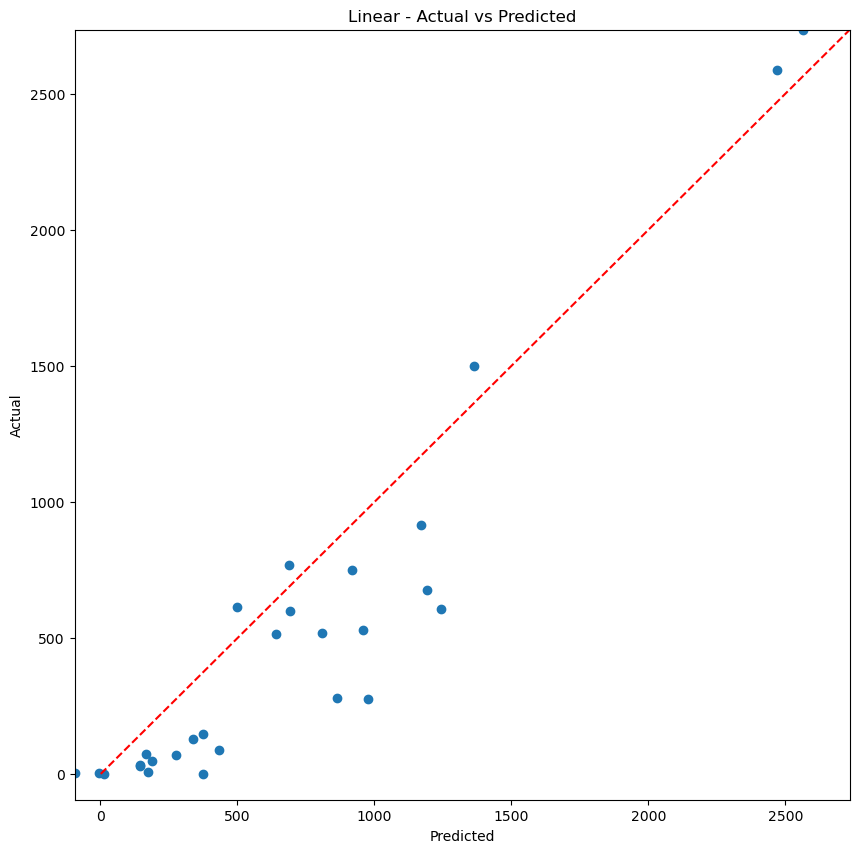

=== Ridge alpha-0.1 ===
R^2: 0.8175620201085365
MAE: 238.54825074344004
MSE: 87852.01209078544
RMSE: 296.3984009585501
AVG CV Score: 288311.763


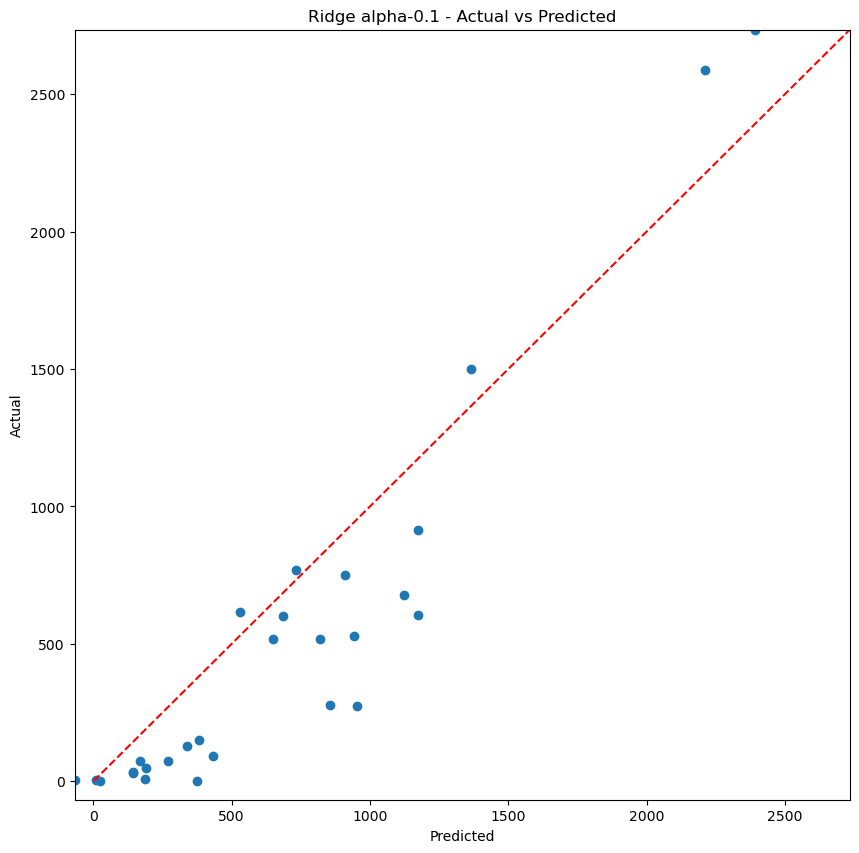

=== Lasso alpha-0.5 ===
R^2: 0.820593359705153
MAE: 234.0094960571474
MSE: 86392.28707600696
RMSE: 293.92564889101965
AVG CV Score: 288305.034


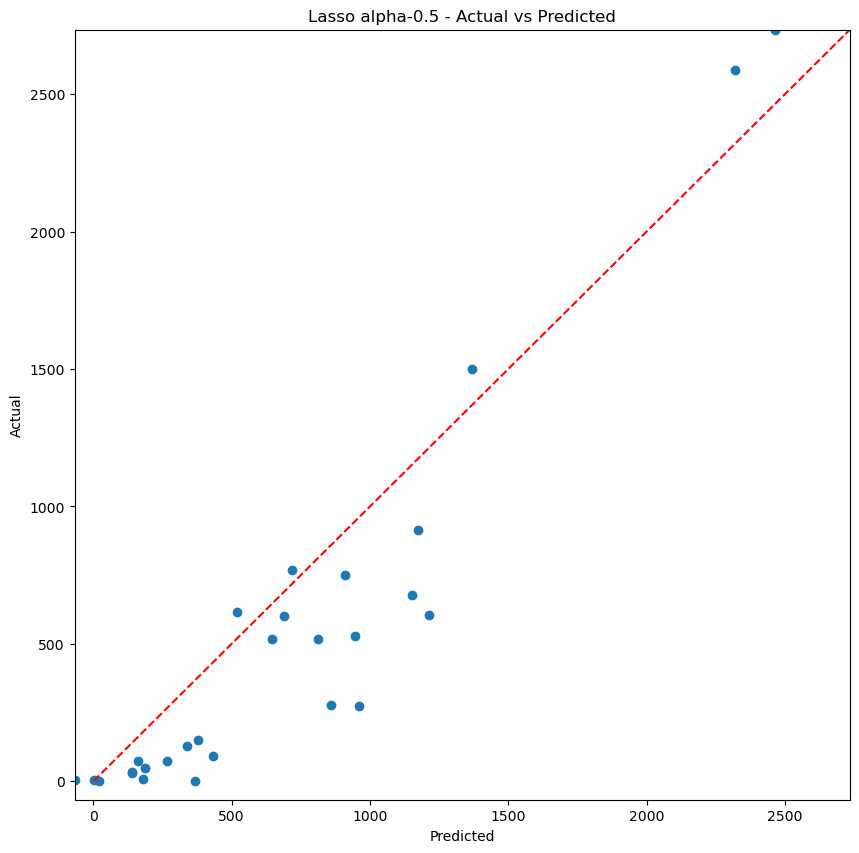

=== Decision Tree ===
R^2: 0.7597973241476131
MAE: 206.71428571428572
MSE: 115668.28571428571
RMSE: 340.1004053427248
AVG CV Score: 619809.051


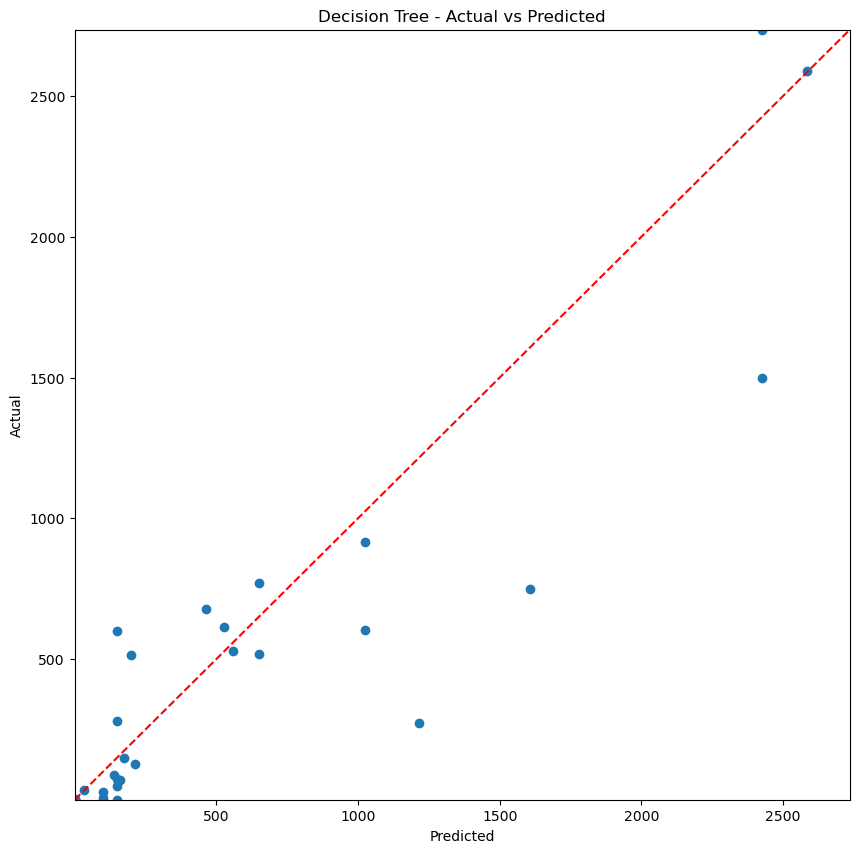

=== Random Forest Regression N-40 ===
R^2: 0.7592089384256121
MAE: 261.91964285714283
MSE: 115951.61964285714
RMSE: 340.51669510151356
AVG CV Score: 381957.754


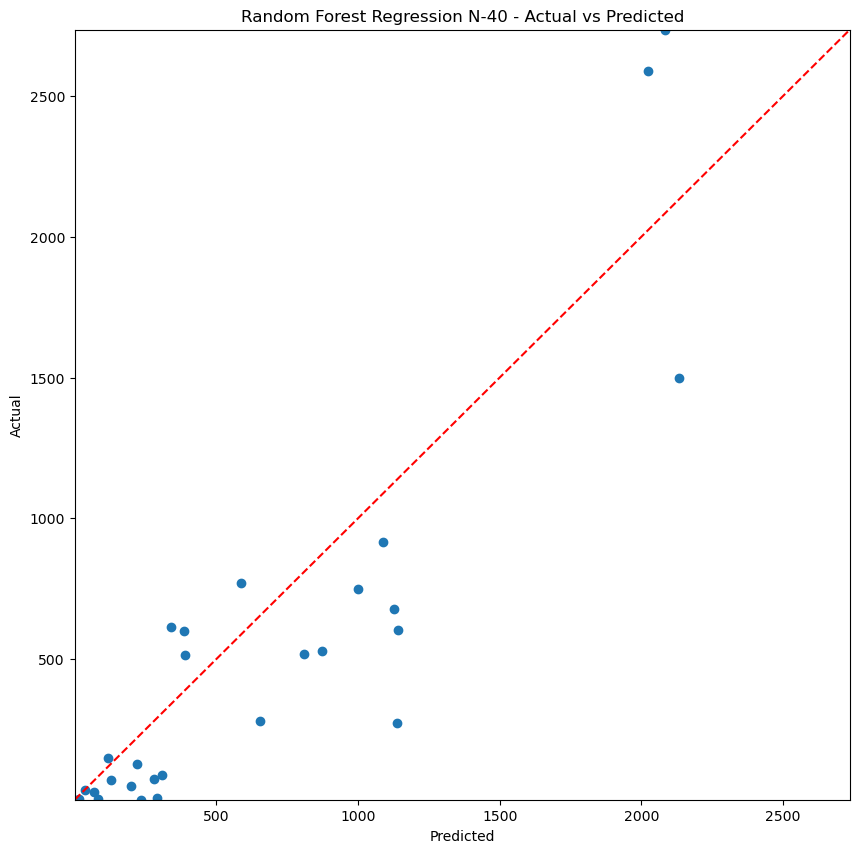

In [6735]:
# Training model regresi dengan data training dan testing model yang sudah di training dengan data testing
linearModelResult = linRegModel(xTrain, xTest)
ridgeResult = ridgeRegModel(xTrain, xTest)
lassoResult = lassoRegModel(xTrain, xTest)
decisionTreeResult = decisionTreeRegModel(xTrain, xTest)
randomForestResult = randomForestRegModel(xTrain, xTest)

# Masukkan data model ke list models
models.append(linearModelResult)
models.append(ridgeResult)
models.append(lassoResult)
models.append(decisionTreeResult)
models.append(randomForestResult)

<h3 align='center'><b>Kesimpulan Model yang Dibuat</b></h3>

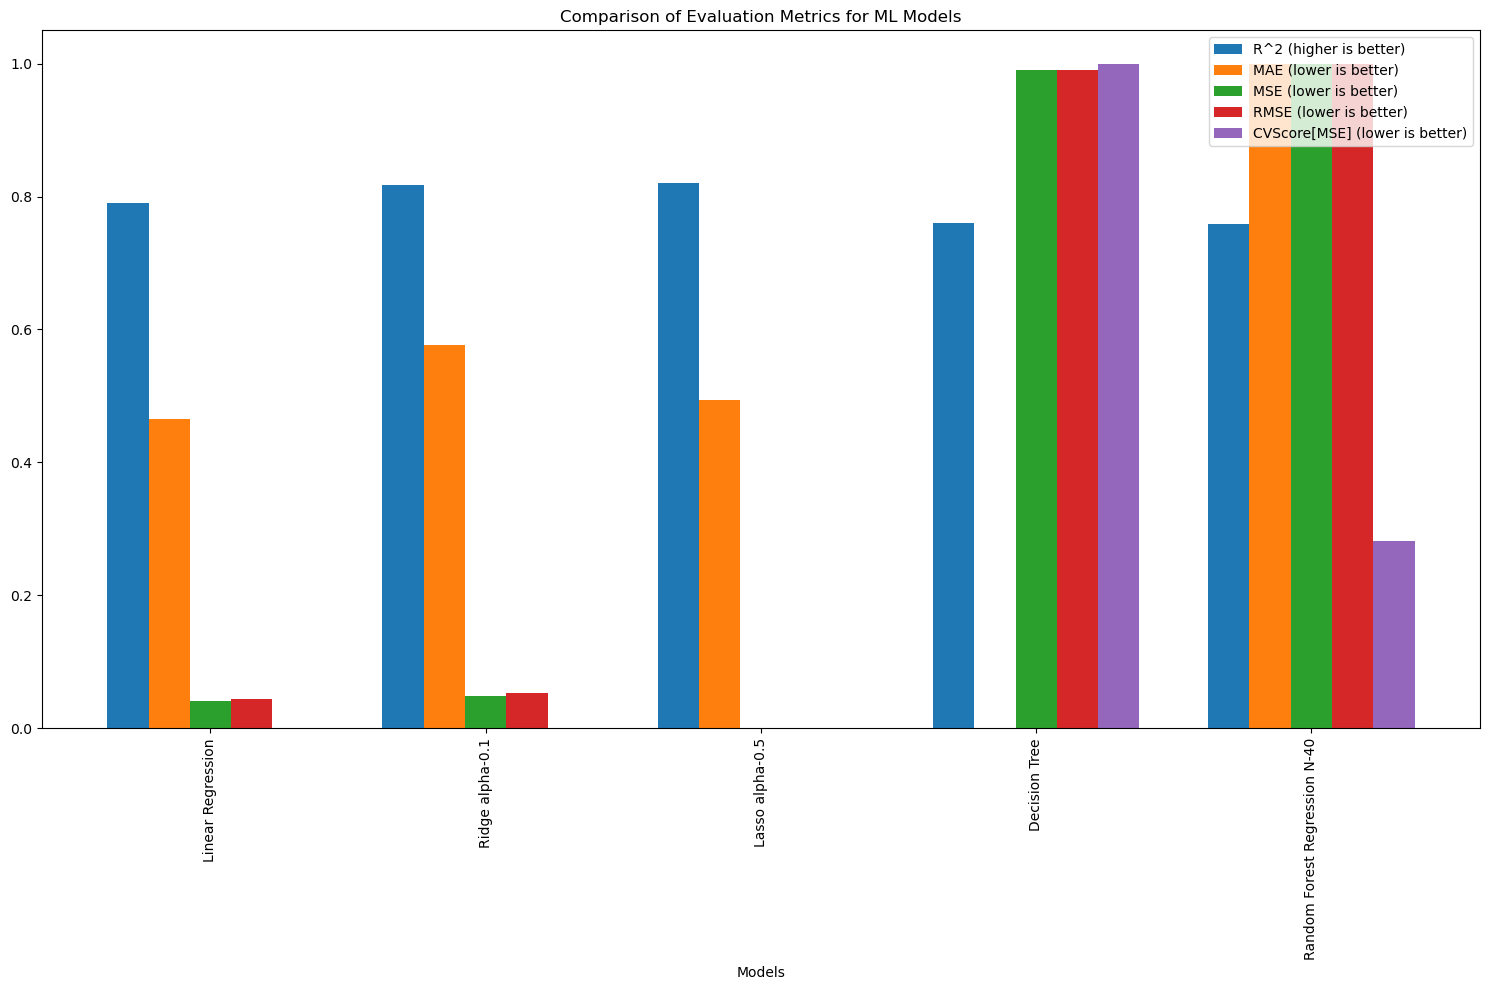

In [6736]:
# Membuat data setiap evaluation metric dari model yang sudah dibuat
r2Score = [modelData['R^2'] for modelData in models]
mae = [modelData['MAE'] for modelData in models]
mse = [modelData['MSE'] for modelData in models]
rmse = [modelData['RMSE'] for modelData in models]
cvScore = [modelData['CVScore'].mean() for modelData in models]

# Membuat array dari data evaluation metric
columnName = ['MAE', 'MSE', 'RMSE', 'CVScore']
scoreData = np.array([mae, mse, rmse, cvScore])
scoreData = np.transpose(scoreData)

# Inisialisasi Dataframe untuk normalisasi
resultData = pd.DataFrame(scoreData, columns=columnName)
scaler = MinMaxScaler(feature_range=(0, 1))
resultData = scaler.fit_transform(resultData)

# Membuat Dataframe dari nilai yang sudah dinormalisasi
resultData = pd.DataFrame(resultData, columns=columnName)
# Menambahkan data r^2 ke dalam dataframe
resultData['R^2'] = r2Score
# Nama model yang sudah ditinjau
resultData['index'] = [modelData['Model Name'] for modelData in models]

# Inisialisasi plot dengan ukuran 15x10
fig, ax = plt.subplots(figsize=(15, 10))
# Menyesuaikan skala ukuran dalam x-axis
x_pos = np.arange(len(resultData))
bar_width = 0.15

# Plot barchart dari masing masing evaluation metric
ax.bar(x_pos - 2 * bar_width, resultData['R^2'], width=bar_width, label='R^2 (higher is better)')
ax.bar(x_pos - bar_width, resultData['MAE'], width=bar_width, label='MAE (lower is better)')
ax.bar(x_pos, resultData['MSE'], width=bar_width, label='MSE (lower is better)')
ax.bar(x_pos + bar_width, resultData['RMSE'], width=bar_width, label='RMSE (lower is better)')
ax.bar(x_pos + 2 * bar_width, resultData['CVScore'], width=bar_width, label='CVScore[MSE] (lower is better)')


# Keterangan dari plot
ax.set_xticks(x_pos)
ax.set_xticklabels(resultData['index'], rotation=90)
ax.set_xlabel('Models')
ax.set_title('Comparison of Evaluation Metrics for ML Models')
ax.legend(loc='upper right')

# Cetak Plot
plt.tight_layout()
plt.show()


<p>Dapat dilihat perbandingan evaluation metric dari beberapa model yang sudah diuji bahwa model Random Forest Regression dengan memiliki nilai r^2 paling tinggi dan MAE dan MSE paling rendah. Maka model ini adalah model yang paling akurat dibanding model lainnya untuk memprediksi jumlah pengungsi berdasarkan feature yang sudah diberikan</p>